In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling                   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline                             #plot the graph just below the line of code
plt.rcParams['figure.figsize'] = 10, 7.5  #size of graph
plt.rcParams['axes.grid'] = True          #sets grids in graph
plt.gray()                                #color scheme

UsageError: unrecognized arguments: #plot the graph just below the line of code


In [6]:
credit_spend = pd.read_excel("E:\data_science_classes\Data Set_p1.xlsx")

In [7]:
credit_spend.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

In [8]:
credit_spend.describe()

region     townsize       gender          age       agecat  \
count  5000.00000  4998.000000  5000.000000  5000.000000  5000.000000   
mean      3.00140     2.687275     0.503600    47.025600     4.238800   
std       1.42176     1.425925     0.500037    17.770338     1.308785   
min       1.00000     1.000000     0.000000    18.000000     2.000000   
25%       2.00000     1.000000     0.000000    31.000000     3.000000   
50%       3.00000     3.000000     1.000000    47.000000     4.000000   
75%       4.00000     4.000000     1.000000    62.000000     5.000000   
max       5.00000     5.000000     1.000000    79.000000     6.000000   

                ed        edcat     jobcat       union       employ  \
count  5000.000000  5000.000000  5000.0000  5000.00000  5000.000000   
mean     14.543000     2.672000     2.7528     0.15120     9.730400   
std       3.281083     1.211738     1.7379     0.35828     9.690929   
min       6.000000     1.000000     1.0000     0.00000     0.000000   
25%      12.000000     2.000000     1.0000     0.00000     2.000000   
50%      14.000000     2.000000     2.0000     0.00000     7.000000   
75%      17.000000     4.000000     4.0000     0.00000    15.000000   
max      23.000000     5.000000     6.0000     1.00000    52.000000   

          ...             owncd       ownpda       ownpc      ownipod  \
count     ...       5000.000000  5000.000000  5000.00000  5000.000000   
mean      ...          0.932800     0.201000     0.63280     0.479200   
std       ...          0.250393     0.400788     0.48209     0.499617   
min       ...          0.000000     0.000000     0.00000     0.000000   
25%       ...          1.000000     0.000000     0.00000     0.000000   
50%       ...          1.000000     0.000000     1.00000     0.000000   
75%       ...          1.000000     0.000000     1.00000     1.000000   
max       ...          1.000000     1.000000     1.00000     1.000000   

           owngame       ownfax         news  response_01  response_02  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      0.474800     0.178800     0.472600     0.083600     0.129800   
std       0.499415     0.383223     0.499299     0.276815     0.336117   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       response_03  
count  5000.000000  
mean      0.102600  
std       0.303466  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 128 columns]

In [9]:
#dropping variables with missing values > 10%

In [10]:
var_drop= []
for i in credit_spend.columns:
    sum_null =  sum(credit_spend[i].isnull())
    if sum_null > 500:
        var_drop.append(i) 
for i in var_drop:
    credit_spend.drop(i, axis = 1, inplace = True)

In [11]:
credit_spend.drop(["custid","birthmonth"], axis = 1, inplace = True) 

In [12]:
pandas_profiling.ProfileReport(credit_spend)

In [13]:
#removing highly correlated variables

In [14]:
corr_var = ["address","agecat","card2tenurecat","card2tenure","cardtenure",
            "commute","edcat","empcat","equipmon","inccat","lnlongmon","longmon","longten","lnlongten",
            "pets_birds","pets_reptiles","pets_saltfish",
            "pets_small","spoused","spousedcat","wireten","wiremon"]
for i in corr_var:
    credit_spend.drop(i, axis = 1, inplace = True)

In [15]:
#differentiating between categorical and numerical data

In [16]:
for var in ['region','gender','jobcat','union','employ','retire',
          'default','jobsat','marital','homeown','hometype','addresscat','cars','carown',
          'cartype','carcatvalue','carbought','carbuy','commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenurecat','card2','card2type','card2benefit','card2fee',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
        'news','response_01','response_02','response_03']:
    credit_spend[var]=credit_spend[var].astype("object")

In [17]:
num_var = [key for key in dict(credit_spend.dtypes) if dict(credit_spend.dtypes)[key] in ["float64","int64", "float32", "int32"]]
cat_var=[]
for i in credit_spend.columns:
    if i not in num_var: 
        cat_var.append(i) 

In [18]:
#credit_spend._get_numeric_data().head()
#works same as manually separating numerical data
#in our case we have all the variables numerical only  

In [19]:
#treating missing values

In [20]:
for i in num_var:
    credit_spend[i] = credit_spend[i].fillna(credit_spend[i].mean())

In [21]:
for i in cat_var:
    credit_spend[i] = credit_spend[i].fillna(credit_spend[i].mode())

In [22]:
#checking for missing values

In [23]:
var_drop_= []
for i in credit_spend.columns:
    sum_null =  sum(credit_spend[i].isnull())
    if sum_null > 0:
        var_drop_.append(i) 
var_drop_


[]

In [24]:
#treating the outliers

In [25]:
for x in credit_spend.columns:
    credit_spend[x]= credit_spend[x].clip_upper(credit_spend[x].quantile(0.99)) 
    credit_spend[x]= credit_spend[x].clip_lower(credit_spend[x].quantile(0.01)) 


In [26]:
#we can also create function to do it
#Handling Outliers - Method2
#def outlier_capping(x):
#    x = x.clip_upper(x.quantile(0.99))
#    x = x.clip_lower(x.quantile(0.01))
#    return x
#
#credit_spend=credit_spend.apply(lambda x: outlier_capping(x))

In [27]:
#creating data audit report
# Use a general function that returns multiple values

In [28]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [29]:
credit_spend.apply(lambda x: var_summary(x)).T .sample(20)

N  NMISS           SUM        MEAN      MEDIAN  \
cardten        5000.0    0.0  3.536182e+06  707.236391  425.000000   
lnothdebt      5000.0    0.0  3.491926e+03    0.698385    0.741242   
creddebt       5000.0    0.0  8.791845e+03    1.758369    0.926437   
callwait       5000.0    0.0  2.395000e+03    0.479000    0.000000   
owngame        5000.0    0.0  2.374000e+03    0.474800    0.000000   
carcatvalue    5000.0    0.0  6.947000e+03    1.389400    1.000000   
ownpc          5000.0    0.0  3.164000e+03    0.632800    1.000000   
commutepublic  5000.0    0.0  4.770000e+02    0.095400    0.000000   
jobsat         5000.0    0.0  1.482100e+04    2.964200    3.000000   
cardmon        5000.0    0.0  7.633475e+04   15.266950   13.750000   
tollten        5000.0    0.0  2.850651e+06  570.130195    0.000000   
region         5000.0    0.0  1.500700e+04    3.001400    3.000000   
card2          5000.0    0.0  1.387200e+04    2.774400    3.000000   
tollfree       5000.0    0.0  2.378000e+03    0.475600    0.000000   
owndvd         5000.0    0.0  4.568000e+03    0.913600    1.000000   
polparty       5000.0    0.0  1.907000e+03    0.381400    0.000000   
carbought      5000.0    0.0  1.105000e+03    0.221000    0.000000   
active         5000.0    0.0  2.330000e+03    0.466000    0.000000   
wireless       5000.0    0.0  1.344000e+03    0.268800    0.000000   
reside         5000.0    0.0  1.097100e+04    2.194200    2.000000   

                      STD            VAR       MIN        P1        P5  \
cardten        848.139057  719339.860708  0.000000  0.000000  0.000000   
lnothdebt        1.104418       1.219739 -2.168235 -2.168229 -1.243358   
creddebt         2.380681       5.667644  0.033160  0.033166  0.101088   
callwait         0.499609       0.249609  0.000000  0.000000  0.000000   
owngame          0.499415       0.249415  0.000000  0.000000  0.000000   
carcatvalue      1.081296       1.169201 -1.000000 -1.000000 -1.000000   
ownpc            0.482090       0.232411  0.000000  0.000000  0.000000   
commutepublic    0.293796       0.086316  0.000000  0.000000  0.000000   
jobsat           1.379456       1.902899  1.000000  1.000000  1.000000   
cardmon         14.156339     200.401931  0.000000  0.000000  0.000000   
tollten        914.744043  836756.664877  0.000000  0.000000  0.000000   
region           1.421760       2.021402  1.000000  1.000000  1.000000   
card2            1.173448       1.376980  1.000000  1.000000  1.000000   
tollfree         0.499454       0.249455  0.000000  0.000000  0.000000   
owndvd           0.280982       0.078951  0.000000  0.000000  0.000000   
polparty         0.485779       0.235981  0.000000  0.000000  0.000000   
carbought        0.609125       0.371033 -1.000000 -1.000000 -1.000000   
active           0.498893       0.248894  0.000000  0.000000  0.000000   
wireless         0.443380       0.196586  0.000000  0.000000  0.000000   
reside           1.361491       1.853657  1.000000  1.000000  1.000000   

                    P10       P25         P50          P75          P90  \
cardten        0.000000  0.000000  425.000000  1080.000000  1870.500000   
lnothdebt     -0.780244 -0.018535    0.741242     1.462046     2.087167   
creddebt       0.175682  0.385520    0.926437     2.063820     4.299470   
callwait       0.000000  0.000000    0.000000     1.000000     1.000000   
owngame        0.000000  0.000000    0.000000     1.000000     1.000000   
carcatvalue    1.000000  1.000000    1.000000     2.000000     3.000000   
ownpc          0.000000  0.000000    1.000000     1.000000     1.000000   
commutepublic  0.000000  0.000000    0.000000     0.000000     0.000000   
jobsat         1.000000  2.000000    3.000000     4.000000     5.000000   
cardmon        0.000000  0.000000   13.750000    22.750000    34.000000   
tollten        0.000000  0.000000    0.000000   885.450000  1918.955000   
region         1.000000  2.000000    3.000000     4.000000     5.000000   
card2          1.00

In [30]:
credit_spend.shape

(5000, 98)

In [31]:
#separating out y variable

In [32]:
credit_spend["total_card_spent"]= credit_spend["cardspent"]+credit_spend["card2spent"]

In [33]:
credit_spend.drop(["cardspent","card2spent"], axis = 1, inplace = True)

In [34]:
#creating dummies for cat_var

In [35]:
def dummies(k,j):
    x= []
    for i in k:
        x.append(pd.get_dummies(j[i], prefix =i))
    return(x)
cat_dum = dummies(cat_var,credit_spend)

In [36]:
cat_dum_df = pd.DataFrame(pd.concat(cat_dum, axis=1))

In [37]:
cat_dum_df.sample(7)

region_1.0  region_2.0  region_3.0  region_4.0  region_5.0  gender_0.0  \
1289           0           0           0           0           1           1   
3793           0           0           0           1           0           0   
1172           0           0           0           0           1           0   
1409           1           0           0           0           0           1   
4966           0           1           0           0           0           0   
4218           0           0           1           0           0           1   
1204           1           0           0           0           0           0   

      gender_1.0  jobcat_1.0  jobcat_2.0  jobcat_3.0       ...         \
1289           0           1           0           0       ...          
3793           1           0           0           0       ...          
1172           1           0           0           0       ...          
1409           0           1           0           0       ...          
4966           1           0           1           0       ...          
4218           0           1           0           0       ...          
1204           1           0           0           1       ...          

      ownfax_0.0  ownfax_1.0  news_0.0  news_1.0  response_01_0.0  \
1289           1           0         1         0                0   
3793           1           0         0         1                1   
1172           1           0         1         0                1   
1409           1           0         1         0                1   
4966           1           0         1         0                1   
4218           1           0         1         0                0   
1204           1           0         1         0                0   

      response_01_1.0  response_02_0.0  response_02_1.0  response_03_0.0  \
1289                1                1                0                0   
3793                0                1                0                1   
1172                0                1                0                0   
1409                0                1                0                1   
4966                0                1                0                1   
4218                1                0                1                1   
1204                1                1                0                1   

      response_03_1.0  
1289                1  
3793                0  
1172                1  
1409                0  
4966                0  
4218                0  
1204                0  

[7 rows x 239 columns]

In [38]:
num_var = [key for key in dict(credit_spend.dtypes) if dict(credit_spend.dtypes)[key] in ["float64","int64", "float32", "int32"]]
cat_var=[]
for i in credit_spend.columns:
    if i not in num_var: 
        cat_var.append(i) 

In [39]:
#creating dataframe with only numerical values

In [40]:
num_df = credit_spend[num_var]
num_df.shape

(5000, 97)

In [41]:
#creating new dataframe with numerical variables and dummies of categorica vars 

In [42]:
credit_spend_new = pd.DataFrame(pd.concat([cat_dum_df,num_df], axis=1))

In [43]:
credit_spend_new.sample(7)

region_1.0  region_2.0  region_3.0  region_4.0  region_5.0  gender_0.0  \
2986           1           0           0           0           0           0   
4399           0           0           0           0           1           1   
3461           0           0           1           0           0           0   
3385           0           0           0           0           1           1   
3582           0           0           1           0           0           0   
867            0           0           0           0           1           1   
4416           0           0           0           0           1           0   

      gender_1.0  jobcat_1.0  jobcat_2.0  jobcat_3.0        ...         \
2986           1           0           1           0        ...          
4399           0           0           0           0        ...          
3461           1           0           1           0        ...          
3385           0           1           0           0        ...          
3582           1           1           0           0        ...          
867            0           0           0           0        ...          
4416           1           0           1           0        ...          

      ownpda  ownpc  ownipod  owngame  ownfax  news  response_01  response_02  \
2986     0.0    1.0      1.0      0.0     0.0   0.0          0.0          0.0   
4399     0.0    1.0      0.0      0.0     0.0   0.0          0.0          0.0   
3461     1.0    0.0      0.0      0.0     0.0   0.0          0.0          0.0   
3385     0.0    0.0      0.0      0.0     0.0   0.0          0.0          0.0   
3582     1.0    1.0      1.0      1.0     0.0   0.0          0.0          0.0   
867      0.0    1.0      1.0      1.0     0.0   1.0          0.0          0.0   
4416     1.0    1.0      1.0      1.0     0.0   0.0          0.0          0.0   

      response_03  total_card_spent  
2986          0.0            221.71  
4399          0.0            329.92  
3461          0.0            490.55  
3385          0.0            535.55  
3582          0.0            452.38  
867           0.0             53.84  
4416          0.0            111.38  

[7 rows x 336 columns]

In [44]:
#assumptions check
#checking if y/residual follows the normal distribution

In [45]:
import seaborn as sns #using to check if y follows normal distribution

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


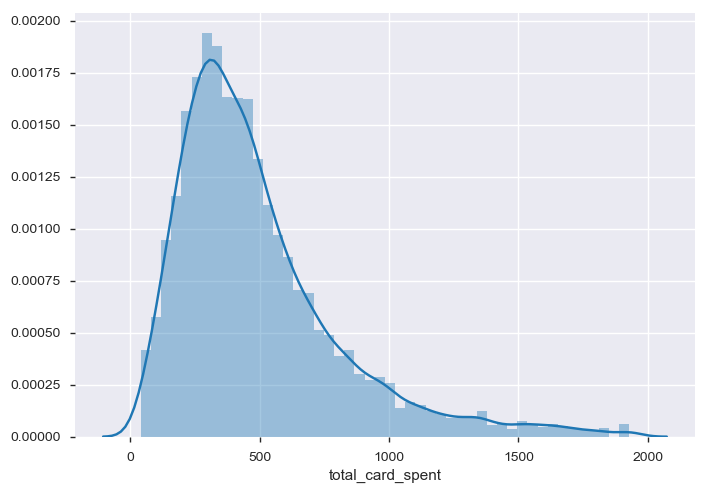

In [46]:
sns.distplot(credit_spend_new.total_card_spent)

In [47]:
#this y variable is right skewed , so will will try taking log of y var to find out
#weather it follows the normal distribution with more precision

In [48]:
credit_spend_new["ln_total_card_spent"] = np.log(credit_spend_new["total_card_spent"]+1)

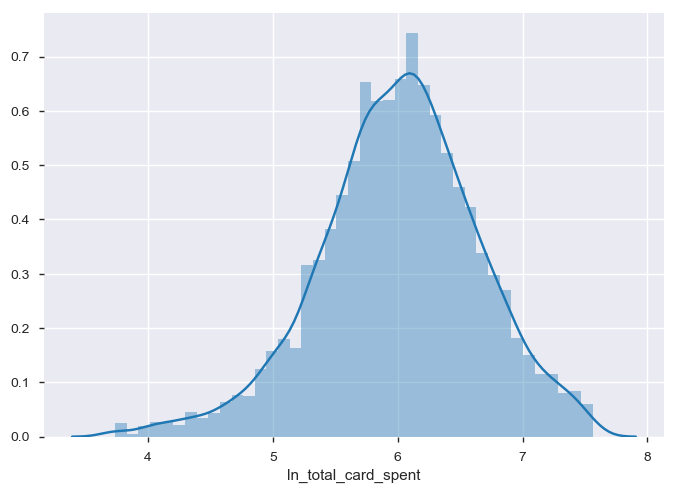

In [49]:
sns.distplot(credit_spend_new.ln_total_card_spent)

In [50]:
#we will use our log(y) variable and drop the orignal y

In [51]:
credit_spend_new.drop("total_card_spent", axis = 1, inplace = True)

In [52]:
# assumption 2 : checking the correaltion between y and every x var
# check all the x variable's linearity with y

In [53]:
corr_all = credit_spend_new.corr()

In [54]:
corr_y = corr_all["ln_total_card_spent"] 
corr_y.head()

region_1.0   -0.033753
region_2.0   -0.003297
region_3.0   -0.002395
region_4.0    0.010029
region_5.0    0.029362
Name: ln_total_card_spent, dtype: float64

In [55]:
#using the head map to visualize the correlation

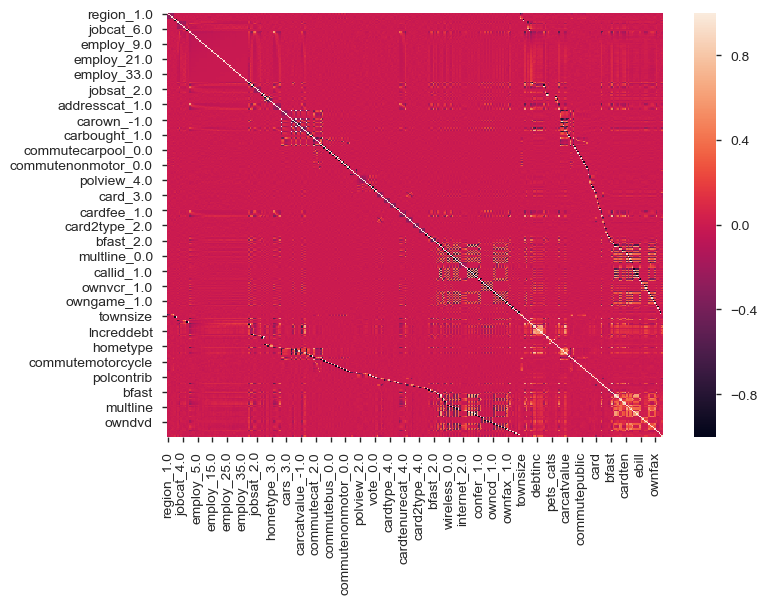

In [56]:
sns.heatmap(corr_all)

In [57]:
#because of high number of variables, we couldn't simply interpret the correlation values just by looking at the heatmap 

In [58]:
feature_red_1 = pd.DataFrame(corr_y)

In [59]:
feature_red_1["ln_total_card_spent"] = np.abs(feature_red_1["ln_total_card_spent"] )
feature_red_1.head()

ln_total_card_spent
region_1.0             0.033753
region_2.0             0.003297
region_3.0             0.002395
region_4.0             0.010029
region_5.0             0.029362

In [60]:
feature_red_1 = feature_red_1.sort_values(by= "ln_total_card_spent", ascending= True)

In [61]:
feature_red_1.head(100)

ln_total_card_spent
cardtype                        0.000015
cardtype_3.0                    0.000329
cardtype_4.0                    0.000619
employ_38.0                     0.000690
cardtype_1.0                    0.000951
employ_29.0                     0.001125
jobcat_6.0                      0.001163
cardtype_2.0                    0.001242
card2type_3.0                   0.001282
employ_9.0                      0.001411
pets_cats                       0.001778
card2benefit                    0.001844
polview_1.0                     0.002080
cars_3.0                        0.002197
card2benefit_1.0                0.002234
region_3.0                      0.002395
commutewalk_0.0                 0.002535
commutewalk                     0.002535
commutewalk_1.0                 0.002535
cars_6.0                        0.002718
cartype                         0.002747
telecommute_0.0                 0.002791
telecommute_1.0                 0.002791
telecommute                     0.002791
carbought_1.0                   0.003038
employ_7.0                      0.003243
region_2.0                      0.003297
jobsat_2.0                      0.003401
cardbenefit_2.0                 0.003525
reside                          0.003622
...                                  ...
cars_5.0                        0.008562
response_01_0.0                 0.008874
response_01                     0.008874
response_01_1.0                 0.008874
card2type_2.0                   0.008978
employ_37.0                     0.009812
region_4.0                      0.010029
employ_5.0                      0.010301
hometype_4.0                    0.010540
cars_2.0                        0.010710
commutenonmotor_1.0             0.010716
commutenonmotor                 0.010716
commutenonmotor_0.0             0.010716
internet_1.0                    0.010909
commuterail                     0.010939
commuterail_1.0                 0.010939
commuterail_0.0                 0.010939
jobcat                          0.011672
commutecat_1.0                  0.011919
card2type_1.0                   0.012417
commutebus                      0.012589
commutebus_1.0                  0.012589
commutebus_0.0                  0.012589
polview_2.0                     0.013132
employ_12.0                     0.013247
employ_34.0                     0.013277
carbought_0.0                   0.013697
polview_7.0                     0.013834
employ_31.0                     0.014044
cars                            0.014058

[100 rows x 1 columns]

In [62]:
f_r_list = list(feature_red_1.ln_total_card_spent)

In [63]:
feature_red_corr=[]
for i in range(len(f_r_list)):
    if f_r_list[i] < 0.015:
        feature_red_corr.append(list((pd.DataFrame(feature_red_1.iloc[i,:0])).columns))
feat_red_corr_list = []
for i in feature_red_corr:
    feat_red_corr_list.append(i[0])
    
len(feat_red_corr_list)

110

In [64]:
#dropping x variables which has absolute(correlation) with y < 0.02

In [65]:
for i in feat_red_corr_list:
    credit_spend_new.drop(i, axis = 1, inplace = True)

In [66]:
credit_spend_new.shape

(5000, 226)

In [67]:
#splitting the data into train and test 

In [68]:
from sklearn.model_selection import train_test_split
feature_columns = credit_spend_new.columns.difference(["ln_total_card_spent"])
train_X,test_X,train_y,test_y=train_test_split(credit_spend_new[feature_columns],credit_spend_new["ln_total_card_spent"],test_size=0.3,random_state=23)

In [69]:
#using random forest for further feature selection

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid={'n_estimators':np.arange(6,20)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_X,train_y) 

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
tree.best_params_

{'n_estimators': 19}

In [73]:
randm_for_ = RandomForestRegressor(oob_score=True,n_estimators=18)
randm_for_.fit( train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [74]:
randm_for_.feature_importances_

array([6.85395463e-03, 1.24160352e-03, 1.86125401e-03, 2.27259609e-03,
       2.79302522e-03, 3.90818749e-03, 2.63682325e-03, 2.06612101e-03,
       3.55578694e-04, 4.59386015e-04, 3.83392593e-04, 1.01536336e-03,
       1.24869621e-03, 9.90341858e-04, 1.30267420e-03, 1.32517943e-03,
       5.39400667e-04, 1.06578407e-04, 1.57210760e-03, 1.84608844e-03,
       8.49261783e-04, 1.22527629e-03, 4.04707508e-04, 8.24218932e-04,
       8.70478140e-04, 1.39384716e-04, 6.25849205e-02, 2.53193209e-02,
       2.04762765e-02, 1.85841165e-03, 2.59974839e-03, 2.16583601e-03,
       9.49731002e-04, 3.39377277e-03, 4.50620603e-03, 1.22383401e-03,
       1.49717293e-03, 1.35564947e-03, 6.59908778e-02, 1.57497585e-03,
       2.61257361e-03, 4.02738833e-03, 8.14334540e-04, 8.60102056e-03,
       1.70067023e-03, 3.06153132e-03, 2.22081797e-02, 2.29793988e-02,
       4.35142256e-03, 8.75829754e-04, 1.41479054e-03, 4.01533125e-03,
       1.79693624e-03, 1.03915840e-03, 1.64360627e-03, 9.72190553e-05,
      

In [75]:
indices = np.argsort(randm_for_.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         randm_for_.feature_importances_[indices[f]]]

feature_rank.head(15)

rank    feature  importance
0     1      lninc    0.096436
1     2     income    0.071152
2     3   card_1.0    0.065991
3     4       card    0.062585
4     5   carvalue    0.034336
5     6     tenure    0.029142
6     7    debtinc    0.028963
7     8    hourstv    0.026486
8     9      card2    0.025319
9    10    cardten    0.022979
10   11         ed    0.022460
11   12    cardmon    0.022208
12   13     employ    0.020626
13   14  card2_1.0    0.020476
14   15   creddebt    0.020426

In [76]:
#taking out the features required to build the model based on the ranking of importance(with max gain)

In [77]:
rf_var = feature_rank.loc[0:50,["feature"]]
rf_var = rf_var["feature"].tolist()
rf_var.append("ln_total_card_spent")
print(rf_var)

['lninc', 'income', 'card_1.0', 'card', 'carvalue', 'tenure', 'debtinc', 'hourstv', 'card2', 'cardten', 'ed', 'cardmon', 'employ', 'card2_1.0', 'creddebt', 'lncreddebt', 'lnothdebt', 'othdebt', 'tollmon', 'polview', 'tollten', 'equipten', 'region', 'cardbenefit', 'reason_2.0', 'jobsat', 'addresscat', 'hometype', 'internet', 'card2benefit_3.0', 'cardtenurecat', 'cars_1.0', 'card_4.0', 'cardtenurecat_3.0', 'bfast', 'polview_3.0', 'jobcat_3.0', 'polview_4.0', 'jobsat_3.0', 'card2benefit_2.0', 'hometype_2.0', 'jobsat_4.0', 'cardbenefit_3.0', 'cartype_0.0', 'jobcat_1.0', 'jobcat_2.0', 'hometype_3.0', 'addresscat_4.0', 'reason', 'bfast_2.0', 'card_3.0', 'ln_total_card_spent']


In [78]:
credit_spend_new_1 = credit_spend_new[rf_var]

In [79]:
credit_spend_new_1=credit_spend_new_1.rename(columns={'card_1.0':'card_1', 'card2_1.0':'card2_1','reason_2.0':'reason_2','card2benefit_3.0':'card2benefit_3',
                                                      'internet_0.0':'internet_0','polview_4.0':'polview_4','addresscat_4.0':'addresscat_4','jobcat_1.0':'jobcat_1',
                                                      'cardbenefit_1.0':'cardbenefit_1','cars_1.0':'cars_1','jobcat_3.0':'jobcat_3','card2benefit_2.0':'card2benefit_2',
                                                     'hometype_3.0':'hometype_3','polview_6.0':'polview_6','cartype_0.0':'cartype_0','card_4.0':'card_4',
                                                      'jobcat_2.0':'jobcat_2','cardtenurecat_3.0':'cardtenurecat_3','region_1.0':'region_1','jobsat_4.0':'jobsat_4',
                                                      'card2_3.0':'card2_3','hometype_1.0':'hometype_1','jobsat_3.0':'jobsat_3','hometype_2.0':'hometype_2','bfast_3.0':'bfast_3','polview_3.0':'polview_3',
                                                      'card_3.0':'card_3','gender_1.0':'gender_1','region_5.0':'region_5','vote_0.0':'vote_0','gender_0.0':'gender_0',
                                                     'card_2.0':'card_2','card2fee_1.0':'card2fee_1','reason_1.0':'reason_1','commutecat_3.0':'commutecat_3'})

In [80]:
credit_spend_new_1.shape

(5000, 52)

In [81]:
credit_spend_new_1.rename(columns = {"carown_0.0" :"carown_0","cardbenefit_3.0":"cardbenefit_3","bfast_2.0":"bfast_2","cardtenurecat_4.0":"cardtenurecat_4"}, inplace = True)

In [82]:
#new assumption check
#checking for multicolinearity
all_columns = "+".join(credit_spend_new_1.columns.difference(["ln_total_card_spent"]))
my_formula = "ln_total_card_spent~" + all_columns
my_formula

'ln_total_card_spent~addresscat+addresscat_4+bfast+bfast_2+card+card2+card2_1+card2benefit_2+card2benefit_3+card_1+card_3+card_4+cardbenefit+cardbenefit_3+cardmon+cardten+cardtenurecat+cardtenurecat_3+cars_1+cartype_0+carvalue+creddebt+debtinc+ed+employ+equipten+hometype+hometype_2+hometype_3+hourstv+income+internet+jobcat_1+jobcat_2+jobcat_3+jobsat+jobsat_3+jobsat_4+lncreddebt+lninc+lnothdebt+othdebt+polview+polview_3+polview_4+reason+reason_2+region+tenure+tollmon+tollten'

In [83]:
#dmatrices is used to convert data into matrices format
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices(my_formula, credit_spend_new_1, return_type='dataframe')

In [84]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.round(0)
vif

VIF Factor         features
0        380.0        Intercept
1          3.0       addresscat
2          1.0     addresscat_4
3          1.0            bfast
4          1.0          bfast_2
5          4.0             card
6          2.0            card2
7          2.0          card2_1
8          1.0   card2benefit_2
9          1.0   card2benefit_3
10         2.0           card_1
11         2.0           card_3
12         3.0           card_4
13         1.0      cardbenefit
14         1.0    cardbenefit_3
15         6.0          cardmon
16        10.0          cardten
17         5.0    cardtenurecat
18         1.0  cardtenurecat_3
19         1.0           cars_1
20         1.0        cartype_0
21         4.0         carvalue
22         4.0         creddebt
23         6.0          debtinc
24         2.0               ed
25         3.0           employ
26         2.0         equipten
27         2.0         hometype
28         1.0       hometype_2
29         2.0       hometype_3
30         1.0          hourstv
31        10.0           income
32         2.0         internet
33         2.0         jobcat_1
34         2.0         jobcat_2
35         1.0         jobcat_3
36         2.0           jobsat
37         1.0         jobsat_3
38         1.0         jobsat_4
39         4.0       lncreddebt
40        10.0            lninc
41         8.0        lnothdebt
42         5.0          othdebt
43         1.0          polview
44         1.0        polview_3
45         1.0        polview_4
46         1.0           reason
47         1.0         reason_2
48         1.0           region
49         7.0           tenure
50         9.0          tollmon
51        10.0          tollten

In [85]:
credit_spend_new_1.drop(["tollten", "lninc"], axis = 1, inplace=True)

In [86]:
#new assumption check
#checking for multicolinearity
all_columns = "+".join(credit_spend_new_1.columns.difference(["ln_total_card_spent"]))
my_formula = "ln_total_card_spent~" + all_columns
my_formula

'ln_total_card_spent~addresscat+addresscat_4+bfast+bfast_2+card+card2+card2_1+card2benefit_2+card2benefit_3+card_1+card_3+card_4+cardbenefit+cardbenefit_3+cardmon+cardten+cardtenurecat+cardtenurecat_3+cars_1+cartype_0+carvalue+creddebt+debtinc+ed+employ+equipten+hometype+hometype_2+hometype_3+hourstv+income+internet+jobcat_1+jobcat_2+jobcat_3+jobsat+jobsat_3+jobsat_4+lncreddebt+lnothdebt+othdebt+polview+polview_3+polview_4+reason+reason_2+region+tenure+tollmon'

In [87]:
#dmatrices is used to convert data into matrices format
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices(my_formula, credit_spend_new_1, return_type='dataframe')


In [88]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.round(0)
vif

VIF Factor         features
0        179.0        Intercept
1          3.0       addresscat
2          1.0     addresscat_4
3          1.0            bfast
4          1.0          bfast_2
5          4.0             card
6          2.0            card2
7          2.0          card2_1
8          1.0   card2benefit_2
9          1.0   card2benefit_3
10         2.0           card_1
11         2.0           card_3
12         3.0           card_4
13         1.0      cardbenefit
14         1.0    cardbenefit_3
15         5.0          cardmon
16         8.0          cardten
17         5.0    cardtenurecat
18         1.0  cardtenurecat_3
19         1.0           cars_1
20         1.0        cartype_0
21         4.0         carvalue
22         4.0         creddebt
23         5.0          debtinc
24         2.0               ed
25         3.0           employ
26         2.0         equipten
27         2.0         hometype
28         1.0       hometype_2
29         2.0       hometype_3
30         1.0          hourstv
31         8.0           income
32         2.0         internet
33         2.0         jobcat_1
34         2.0         jobcat_2
35         1.0         jobcat_3
36         2.0           jobsat
37         1.0         jobsat_3
38         1.0         jobsat_4
39         4.0       lncreddebt
40         6.0        lnothdebt
41         5.0          othdebt
42         1.0          polview
43         1.0        polview_3
44         1.0        polview_4
45         1.0           reason
46         1.0         reason_2
47         1.0           region
48         7.0           tenure
49         1.0          tollmon

In [89]:
# new assumption :  x and y should be linearly related

In [90]:
#scatter plot using pandas

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


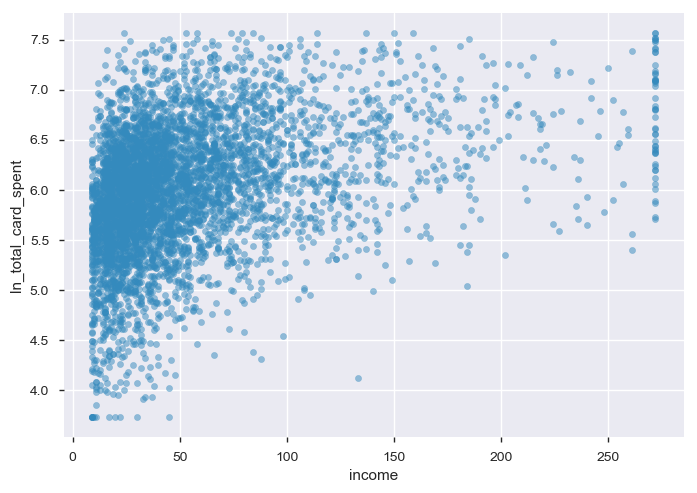

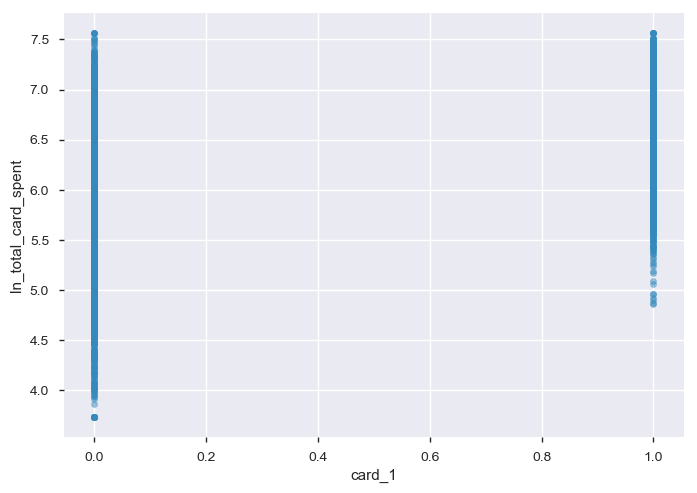

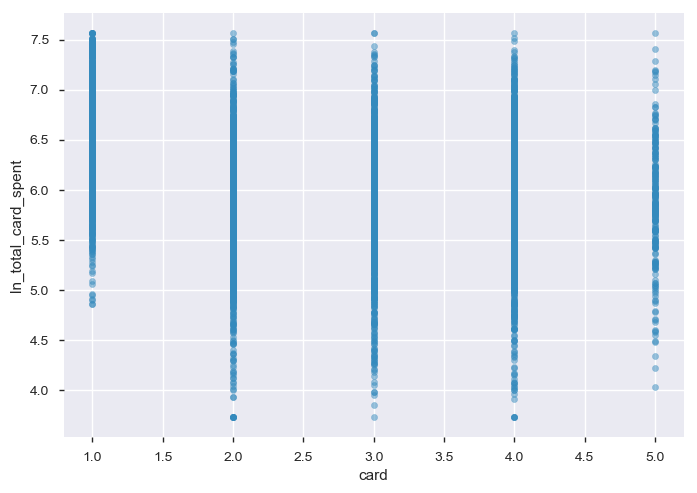

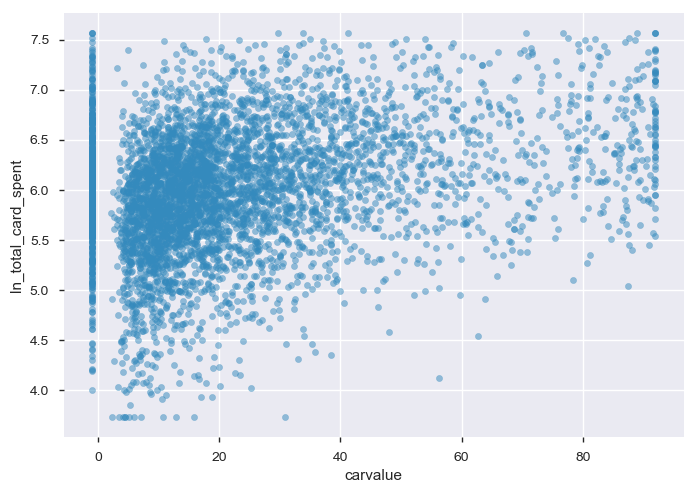

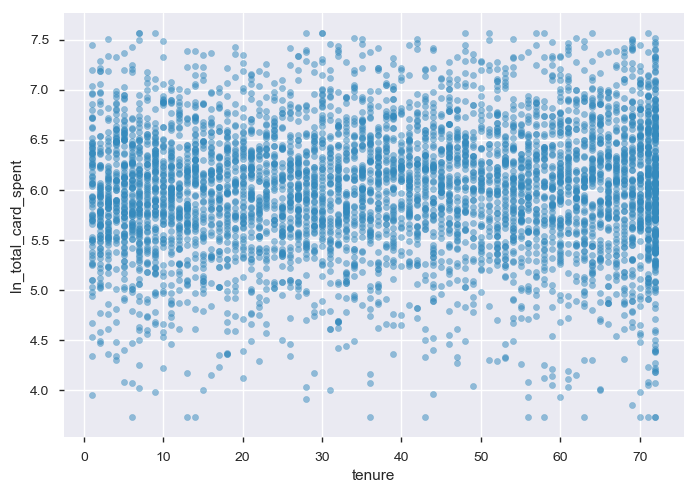

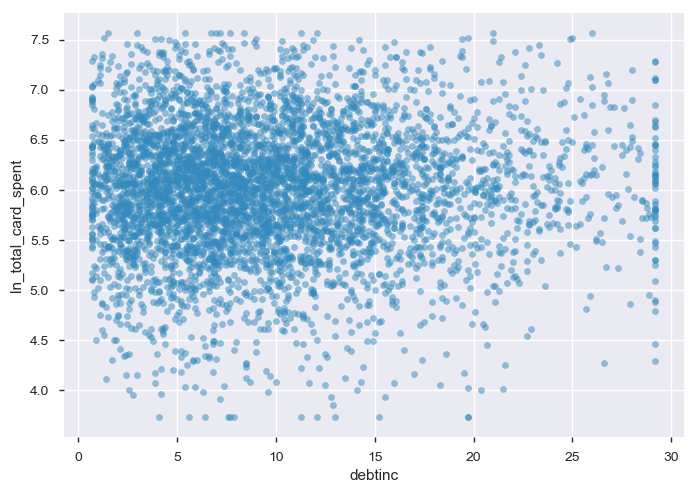

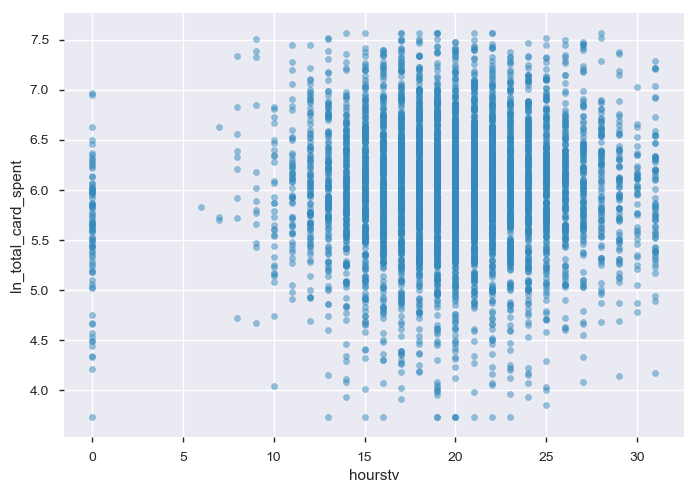

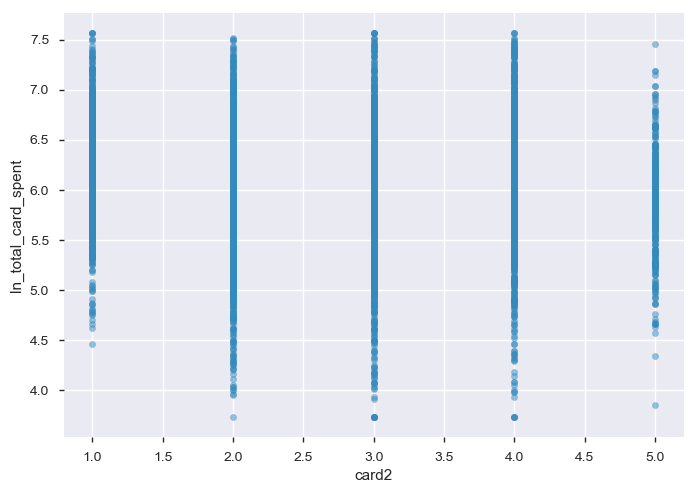

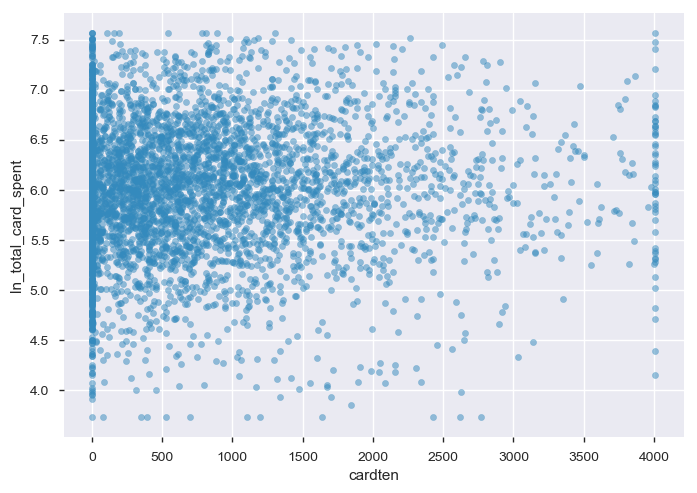

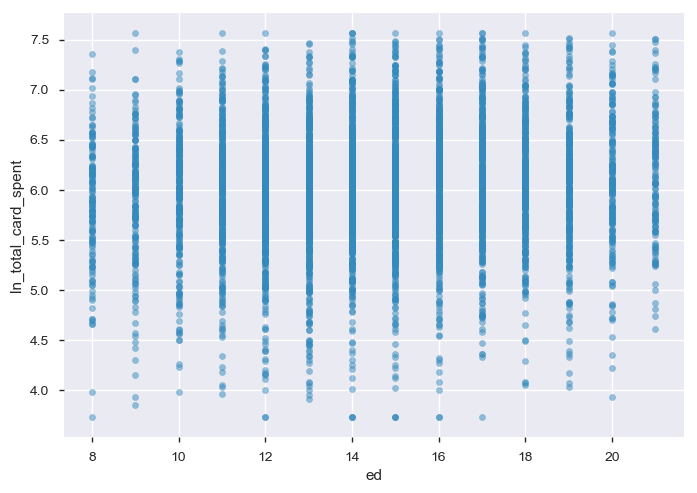

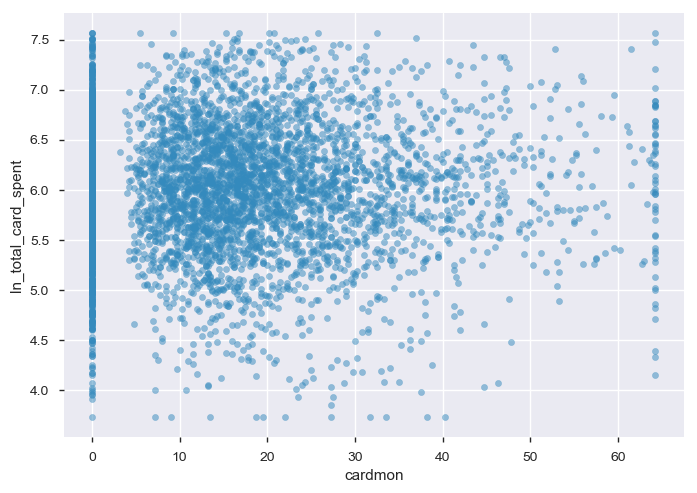

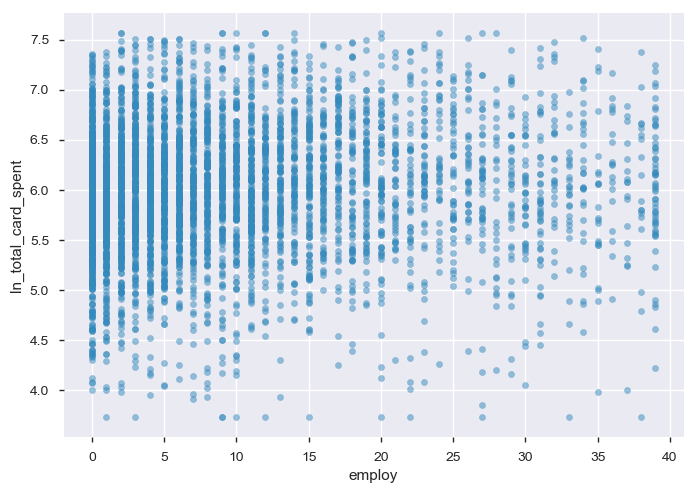

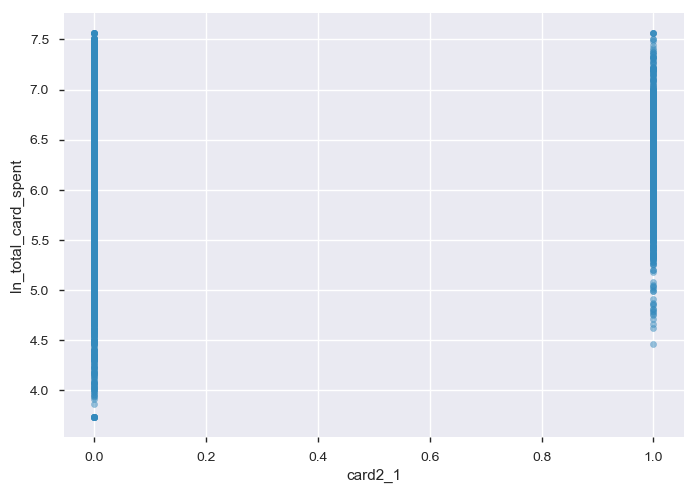

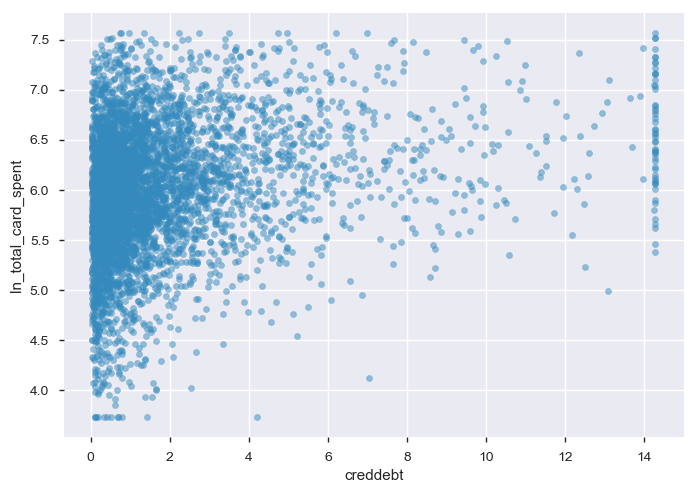

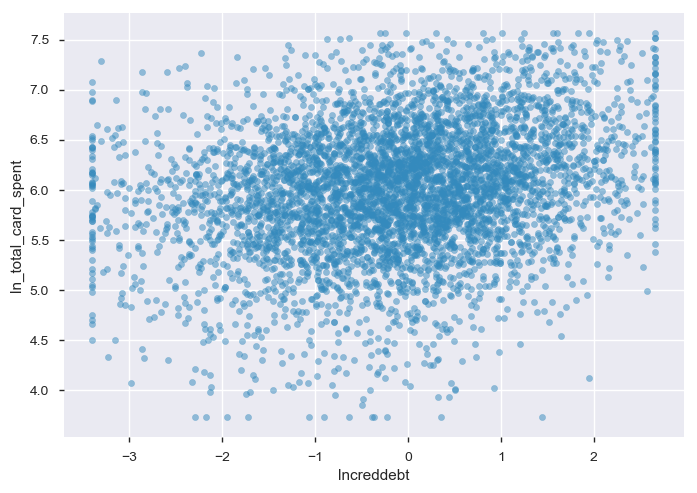

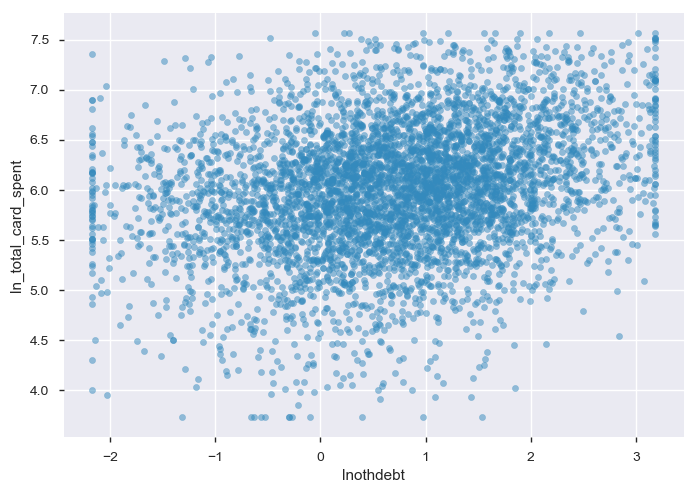

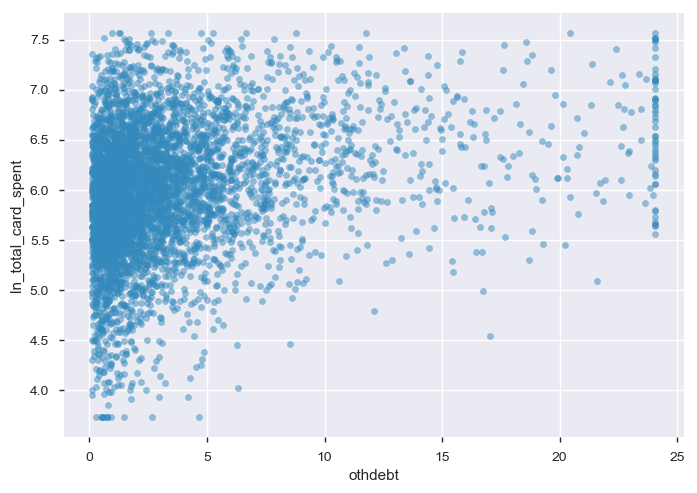

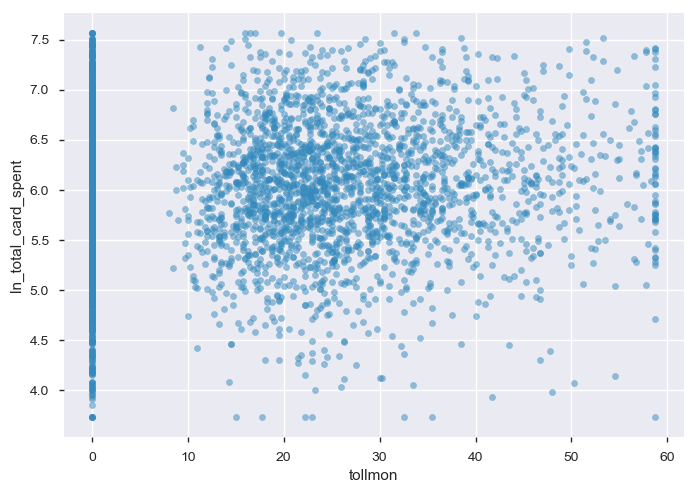

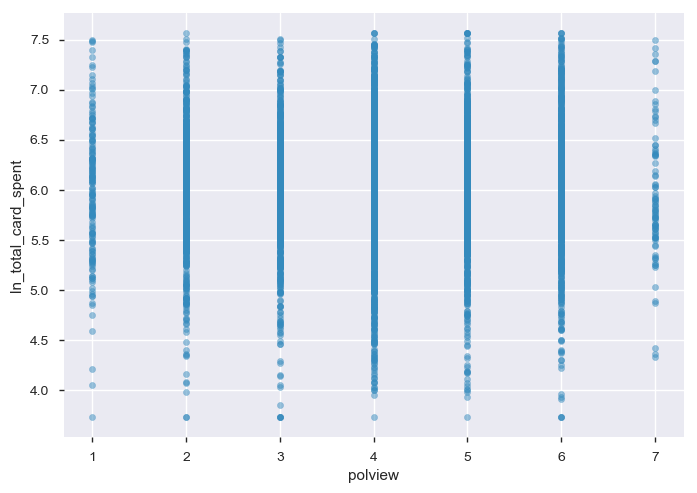

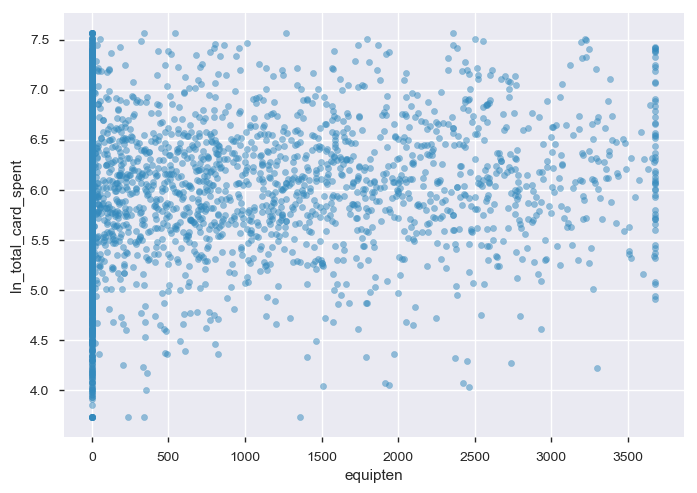

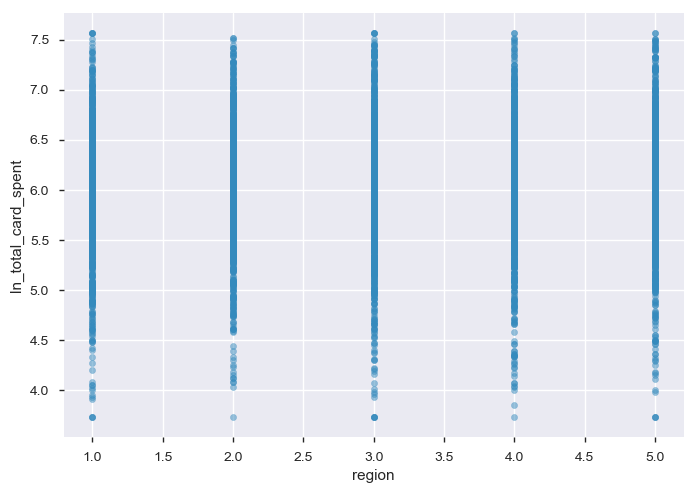

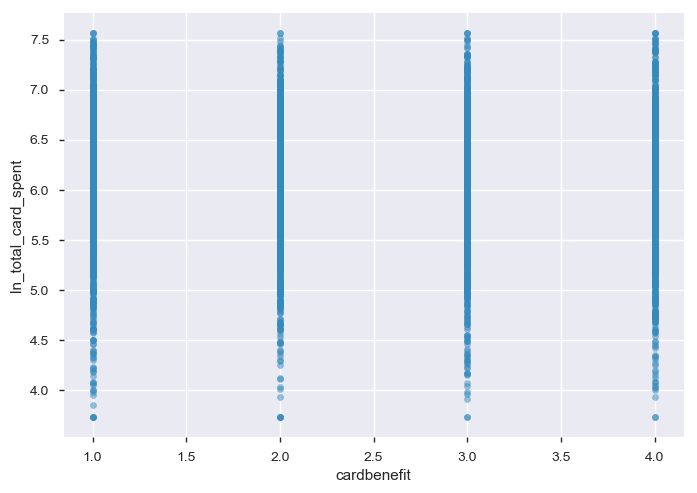

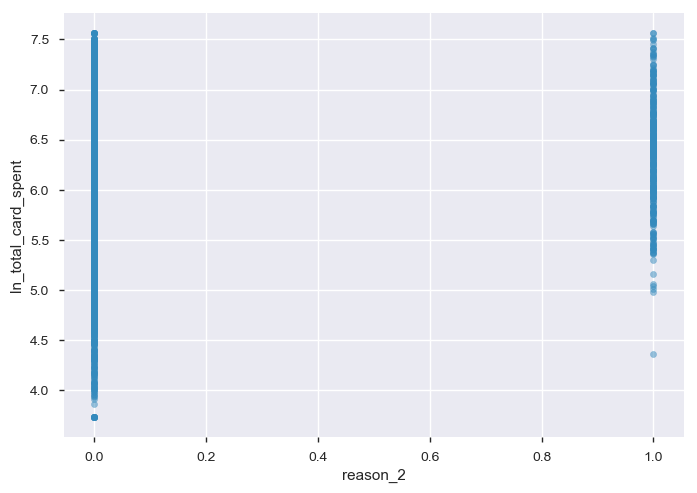

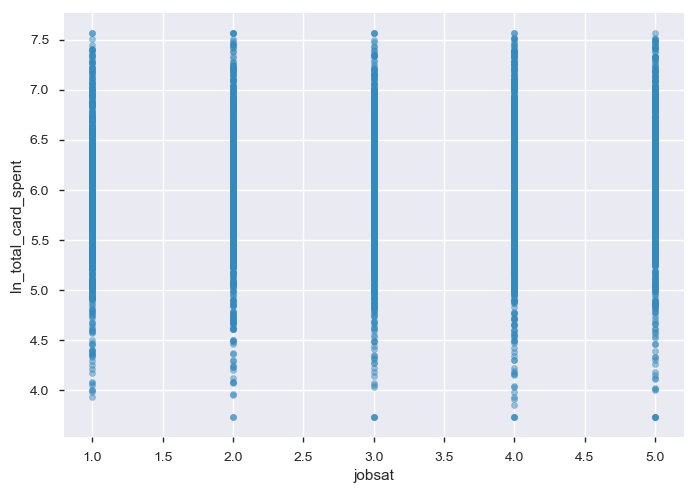

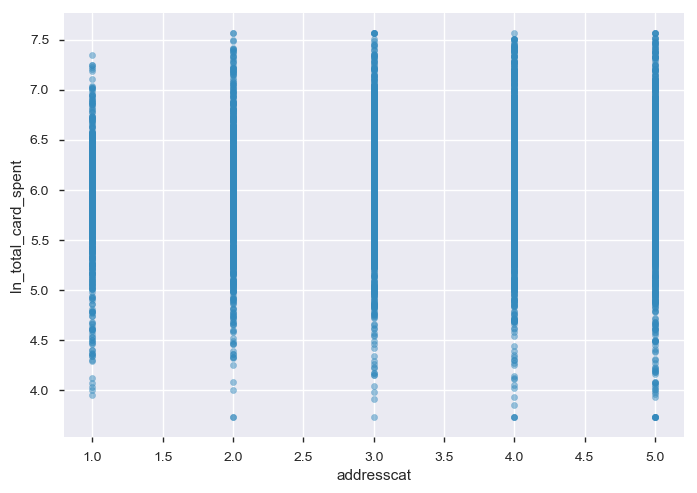

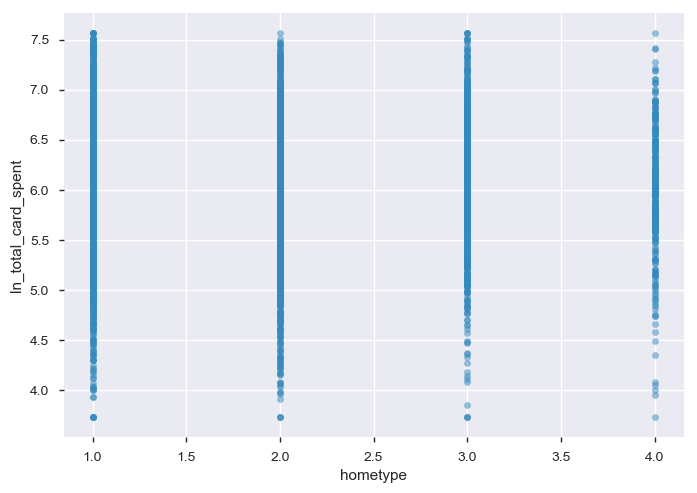

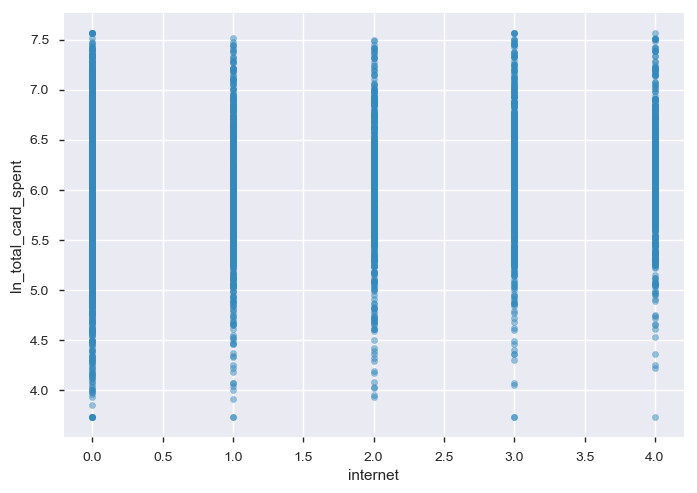

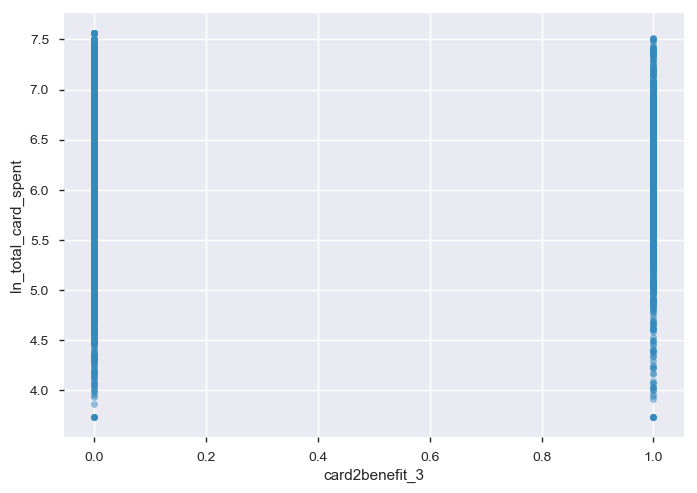

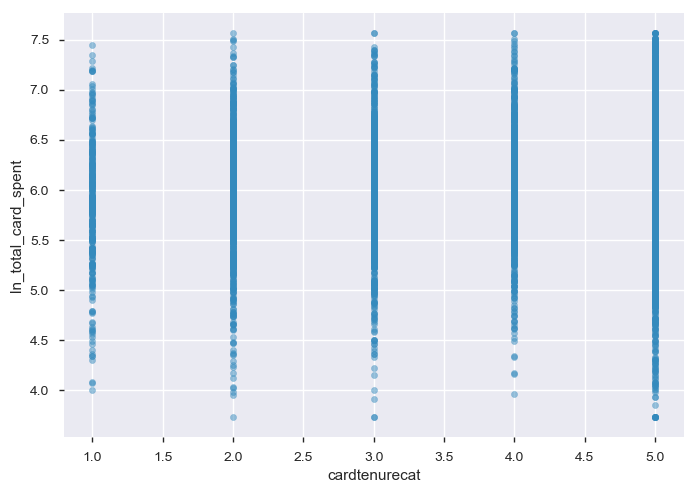

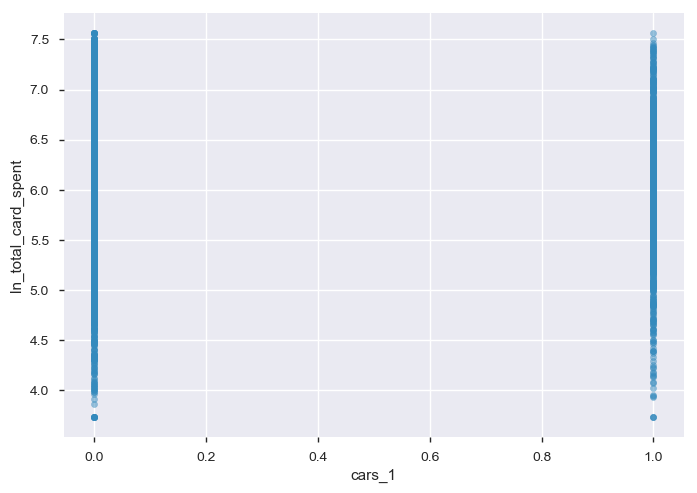

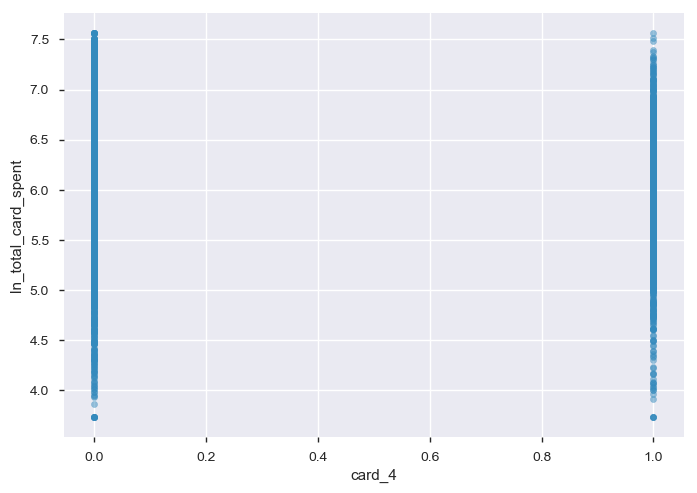

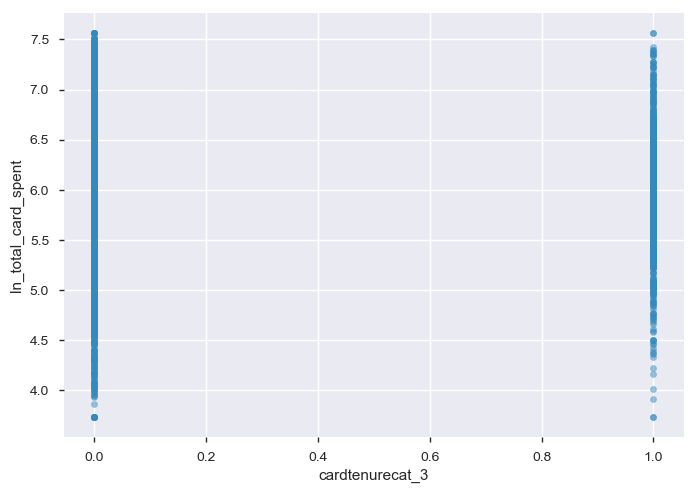

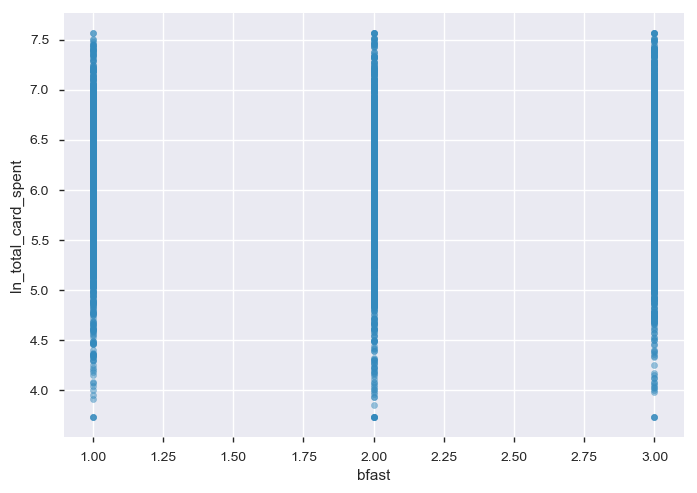

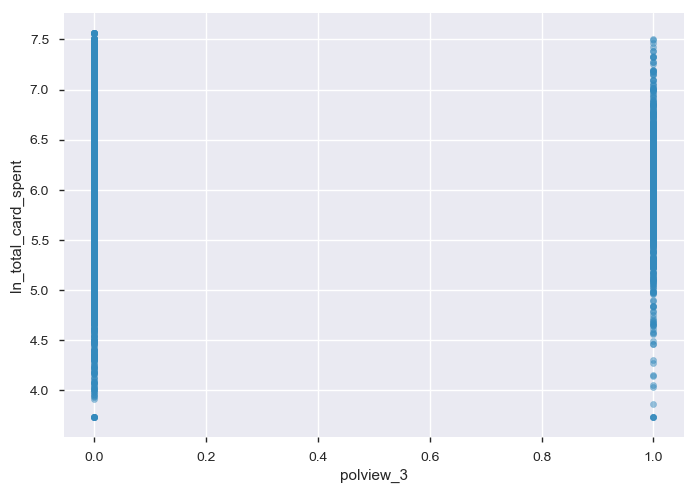

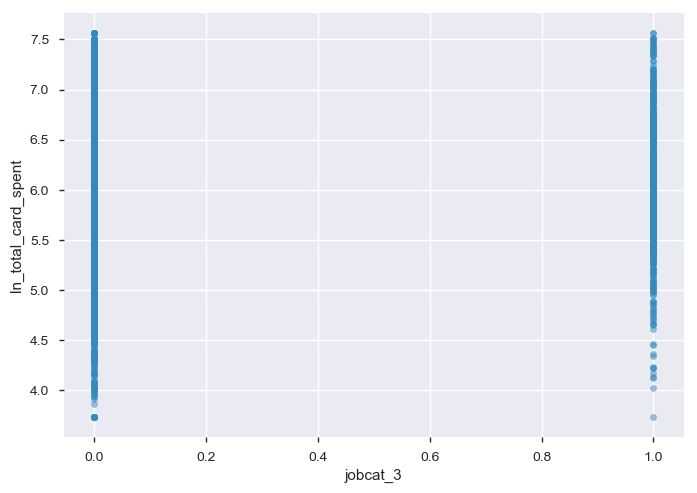

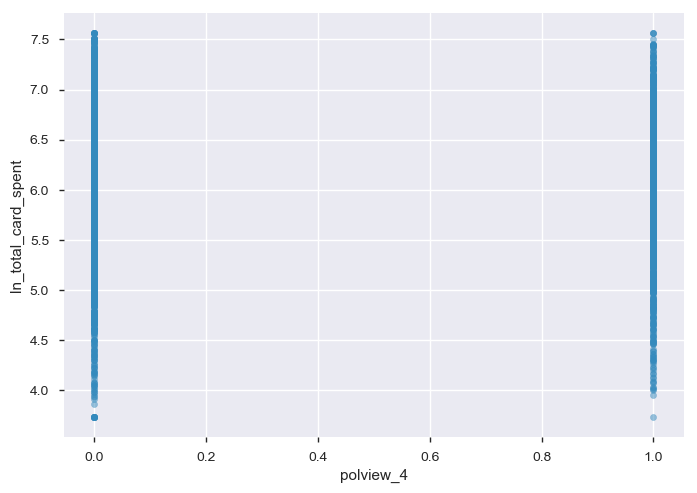

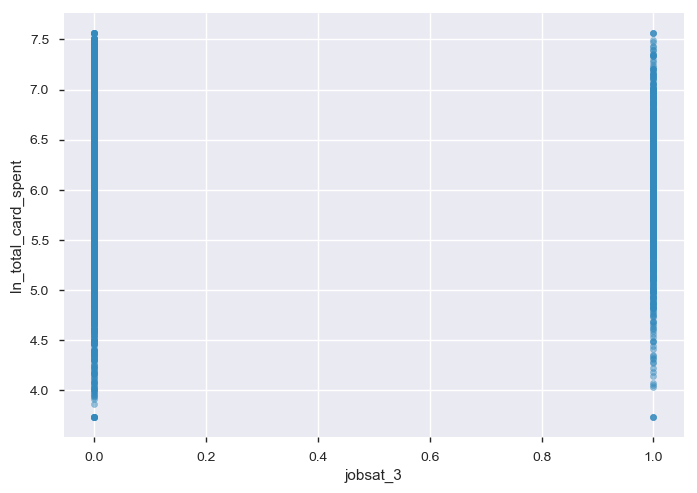

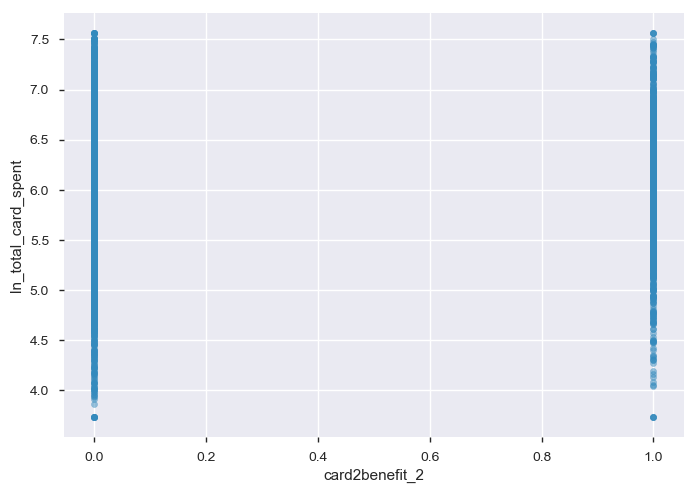

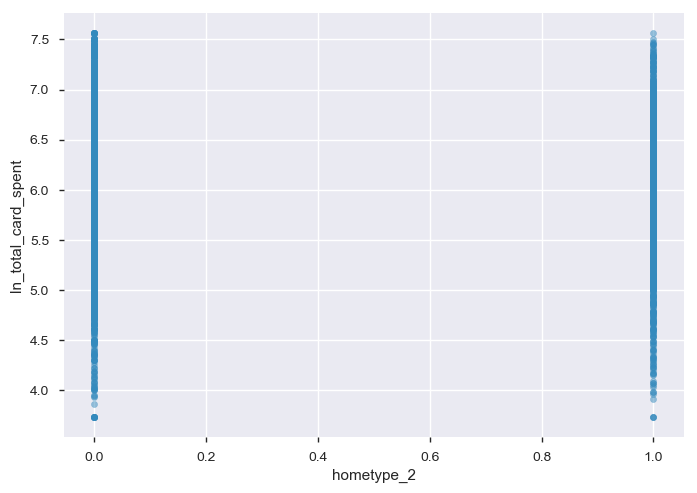

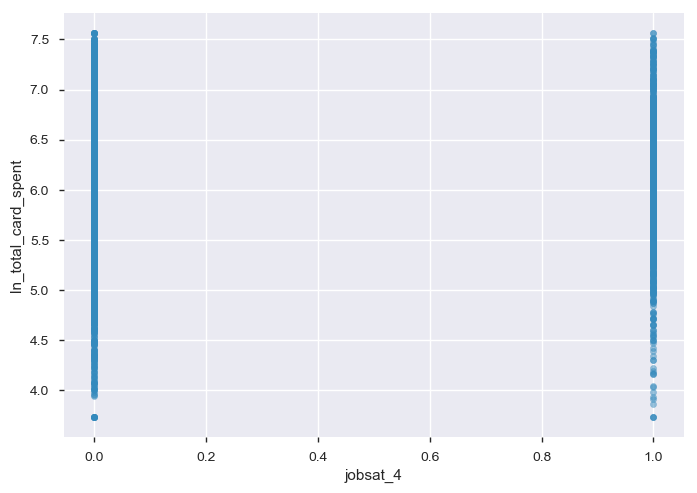

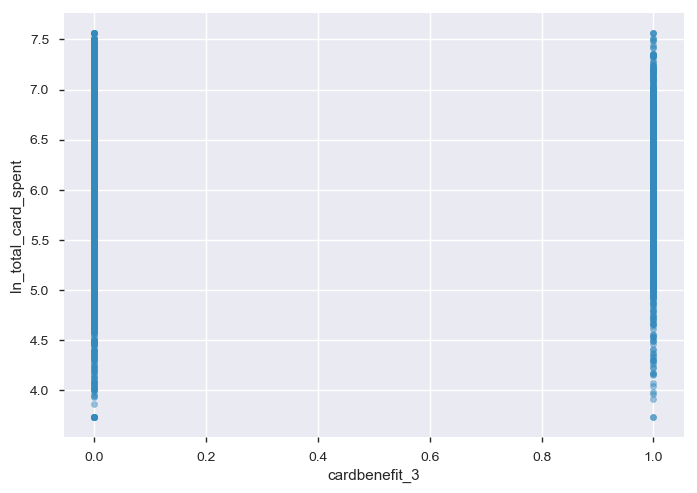

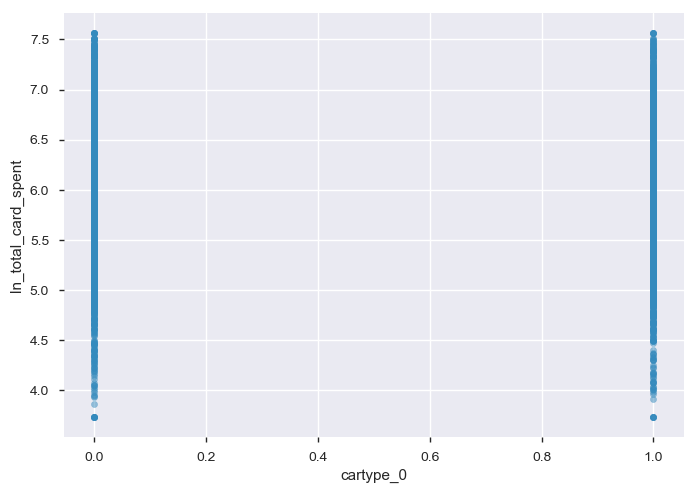

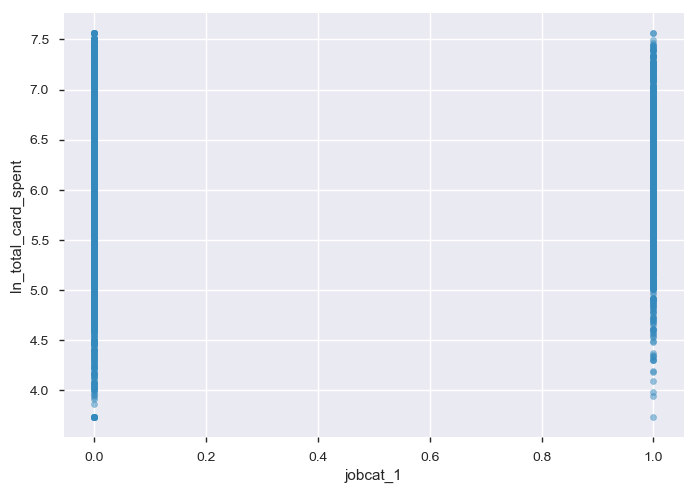

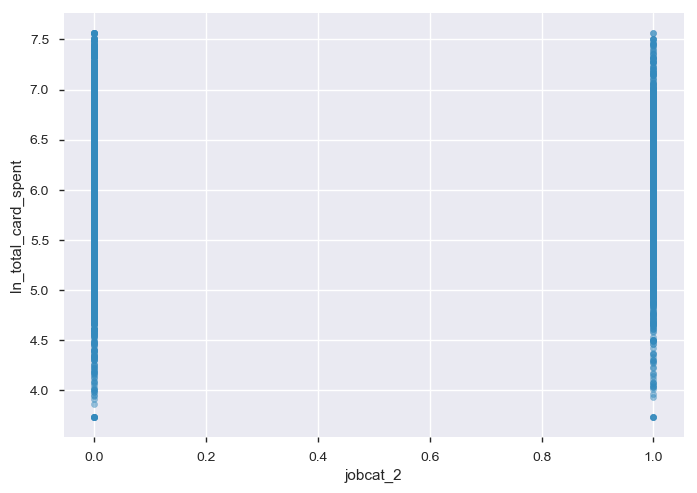

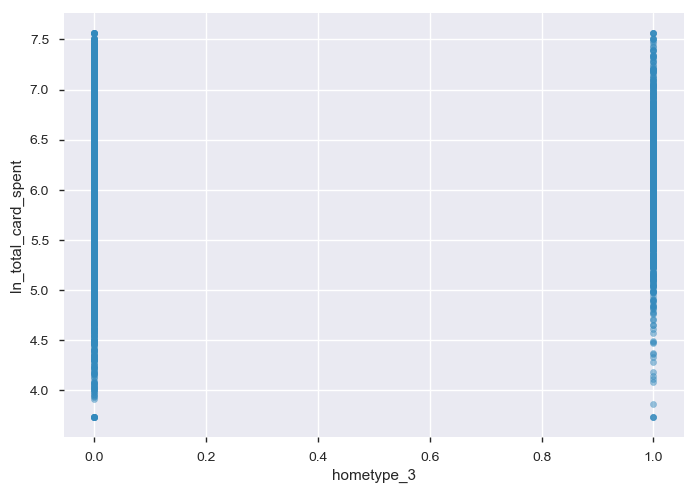

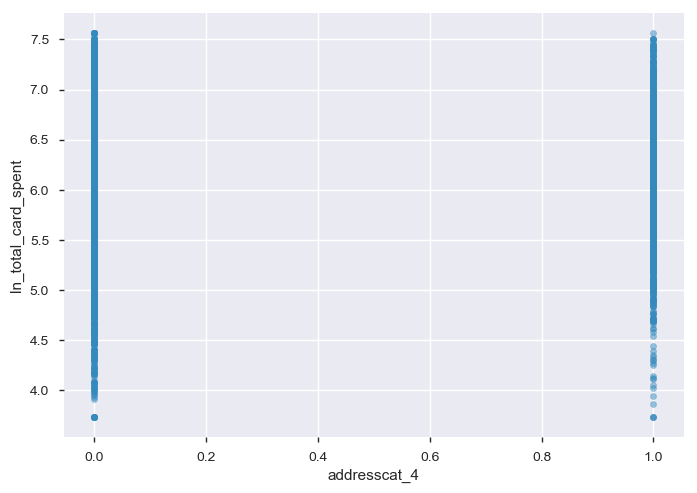

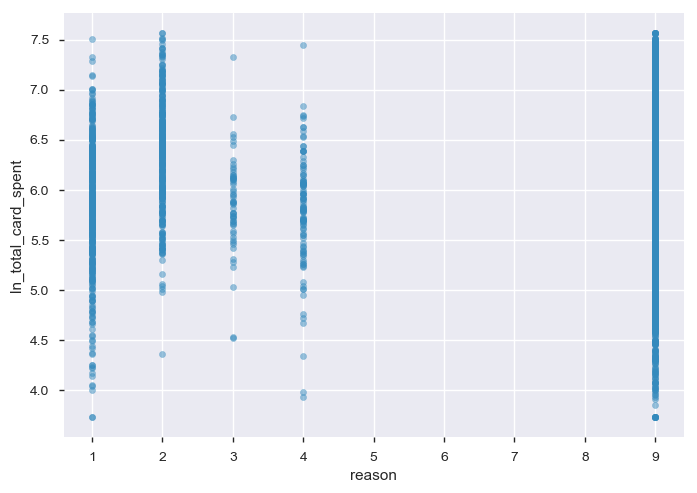

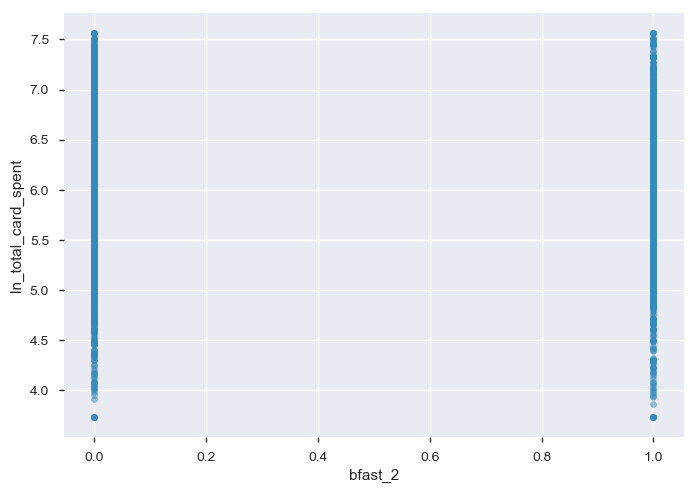

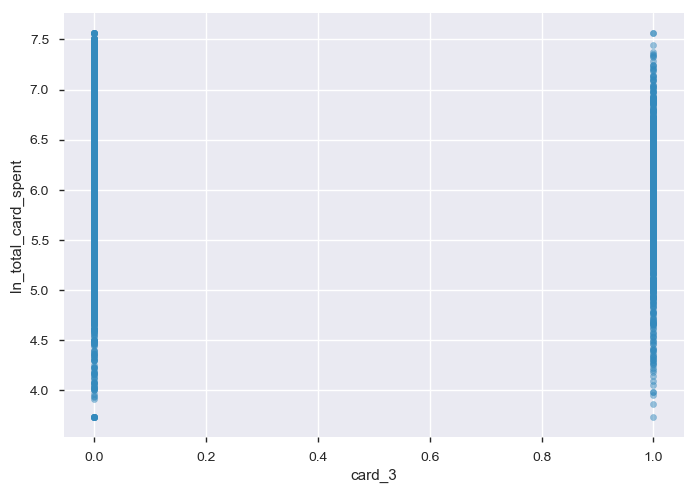

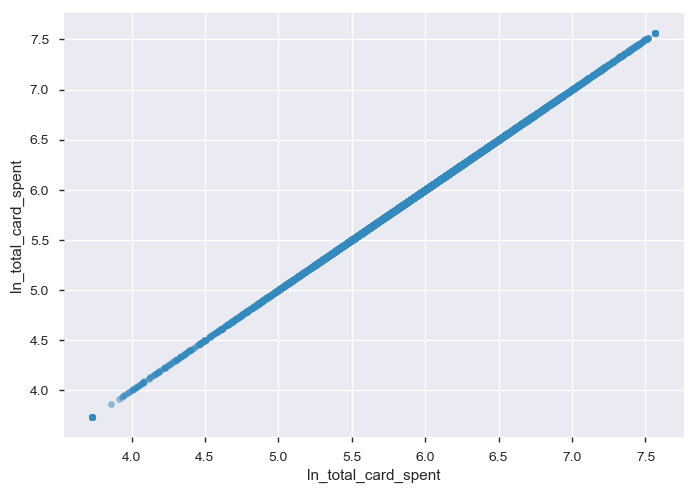

In [91]:
for i in list(credit_spend_new_1.columns):
    credit_spend_new_1.plot(kind = "scatter", x= i , y = "ln_total_card_spent",alpha= 0.5)

In [92]:
nonlinear_drop = ["creddebt","othdebt"]
credit_spend_new_1.drop(nonlinear_drop, axis = 1 , inplace = True)

In [93]:
#using seaborn for scatter plot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


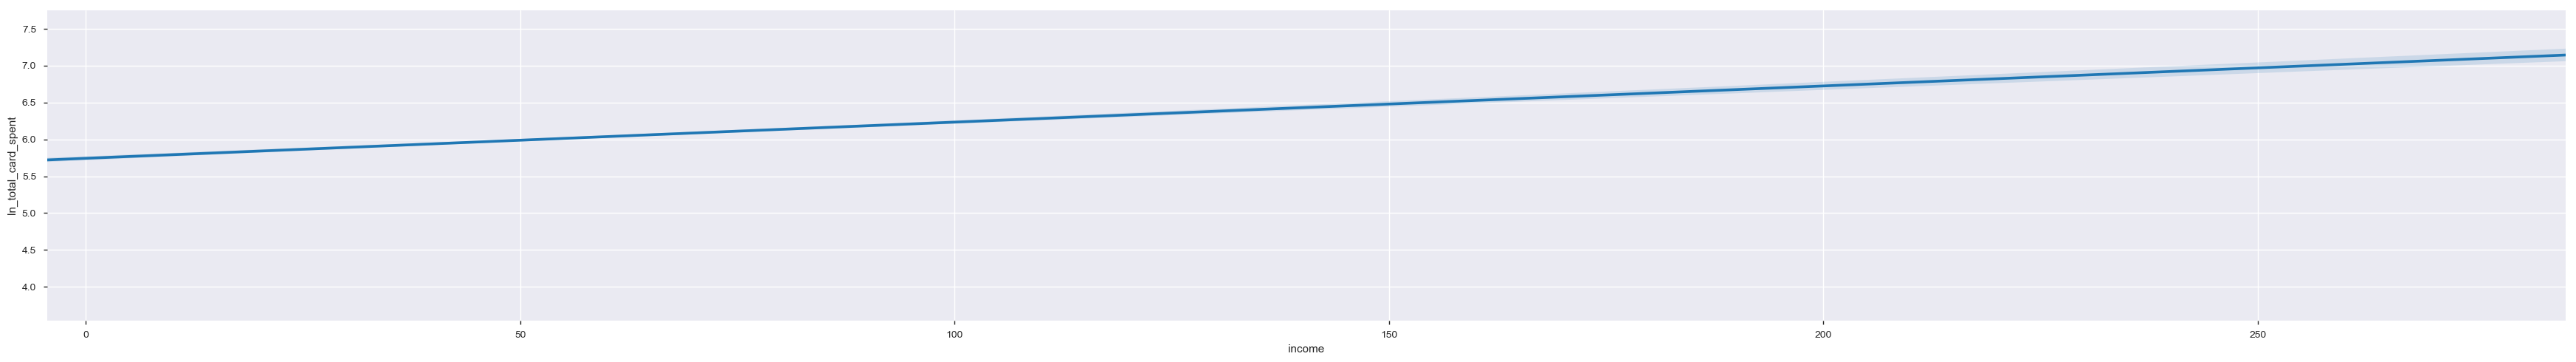

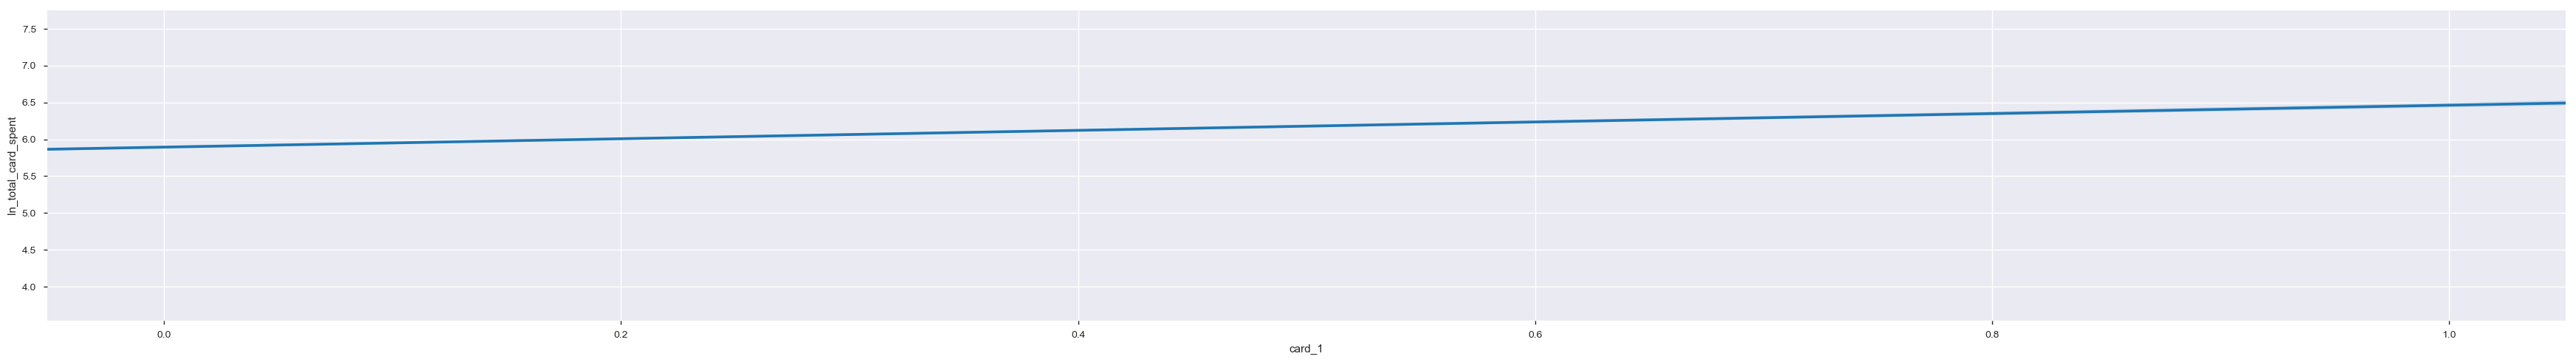

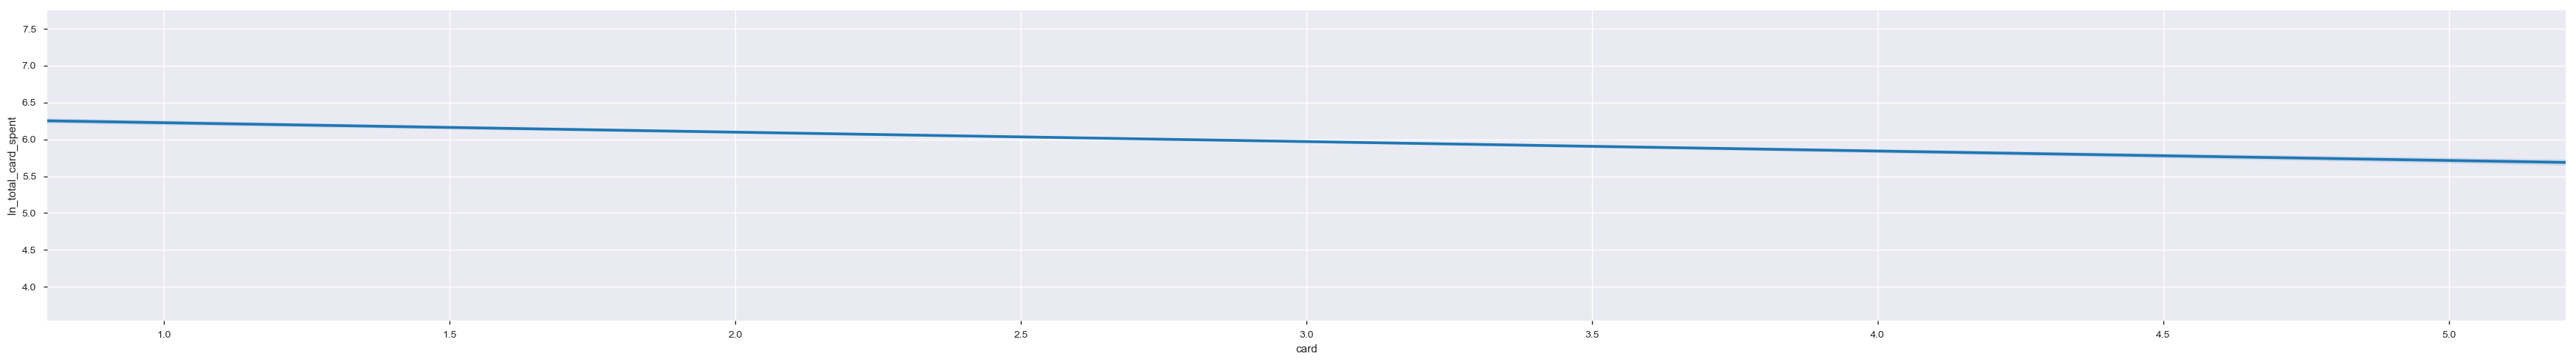

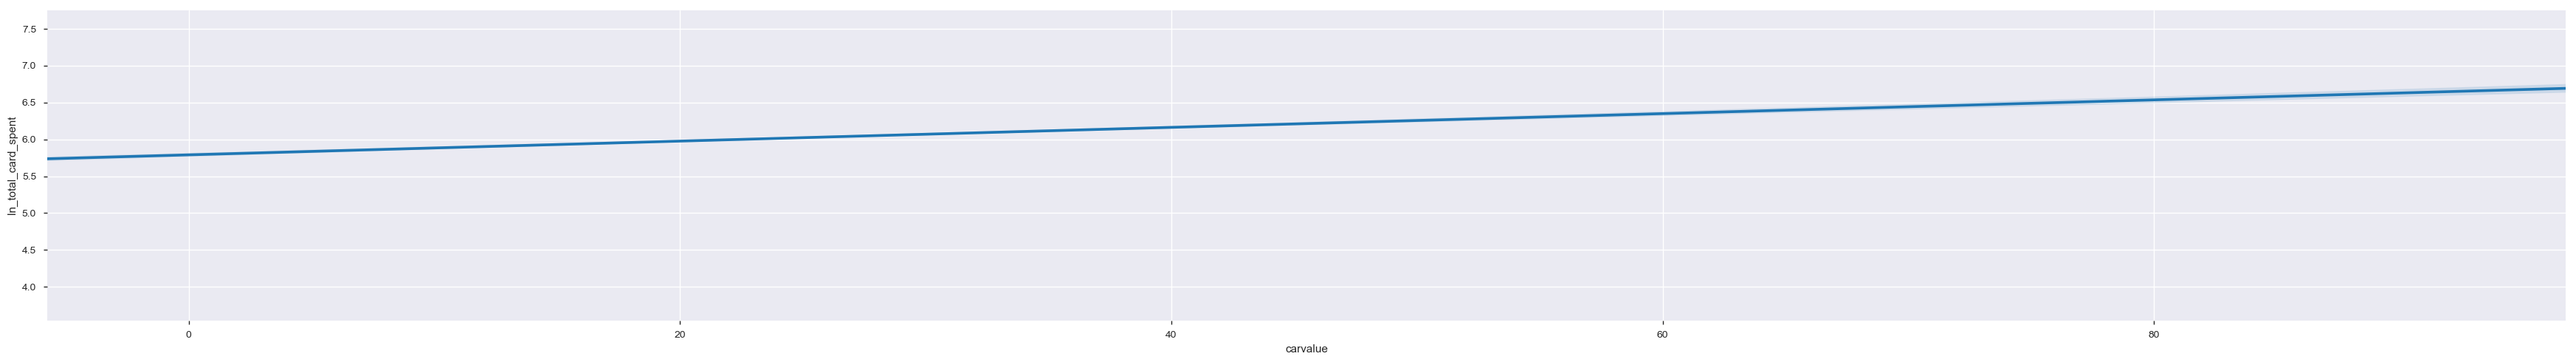

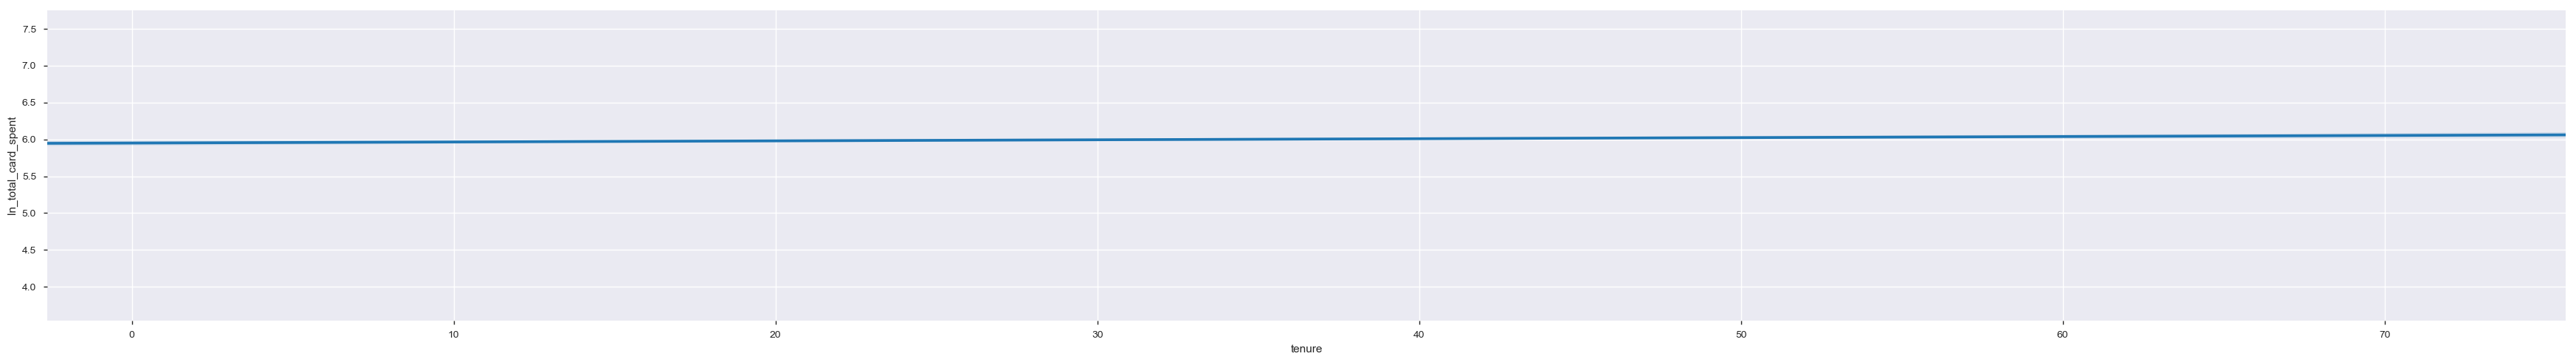

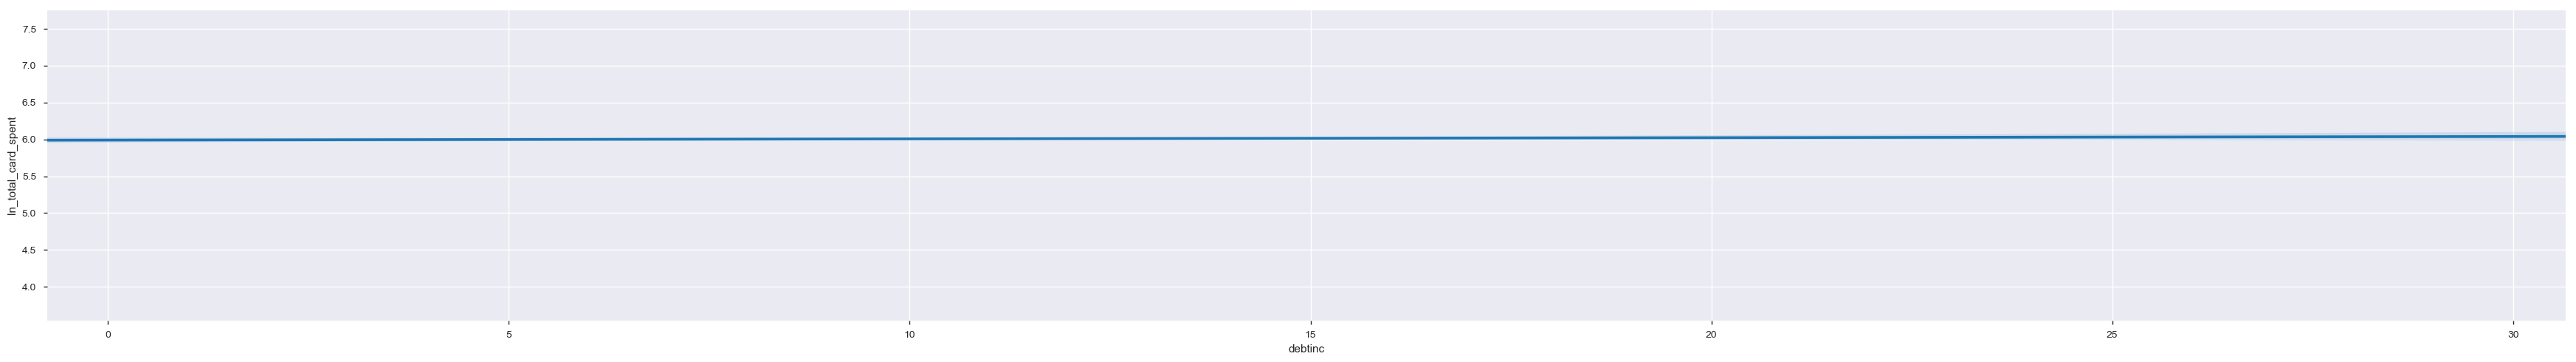

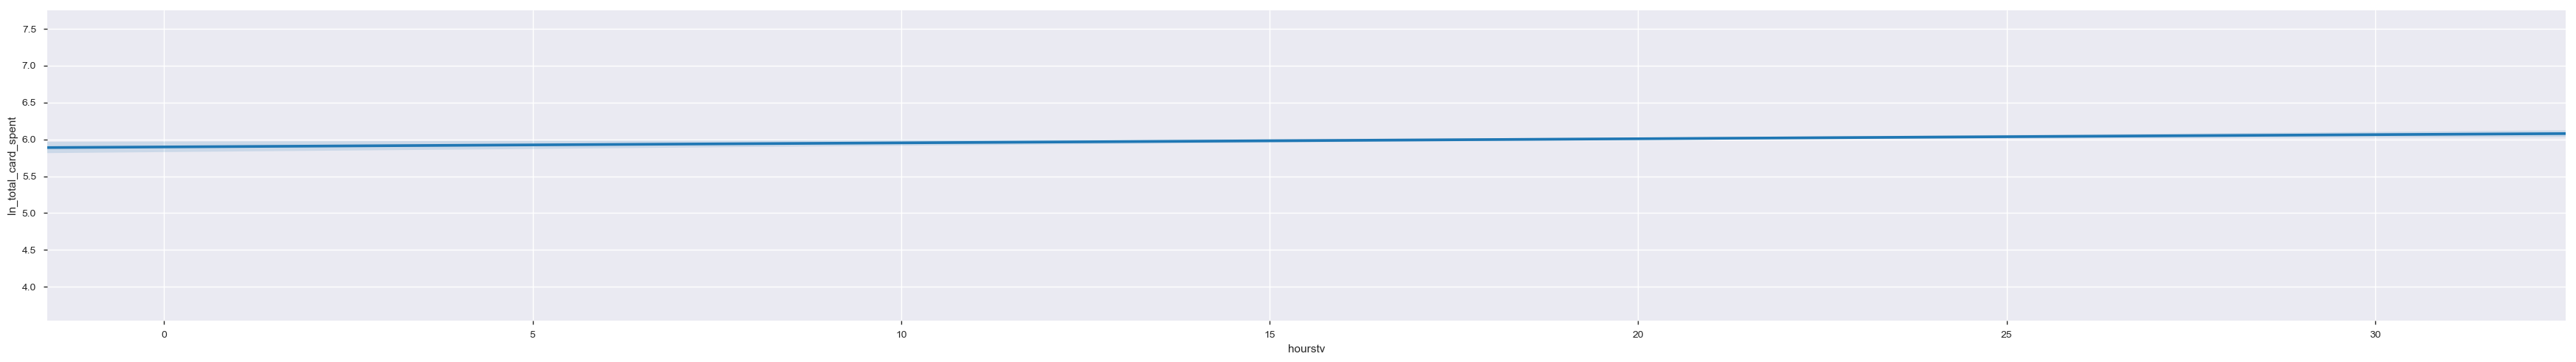

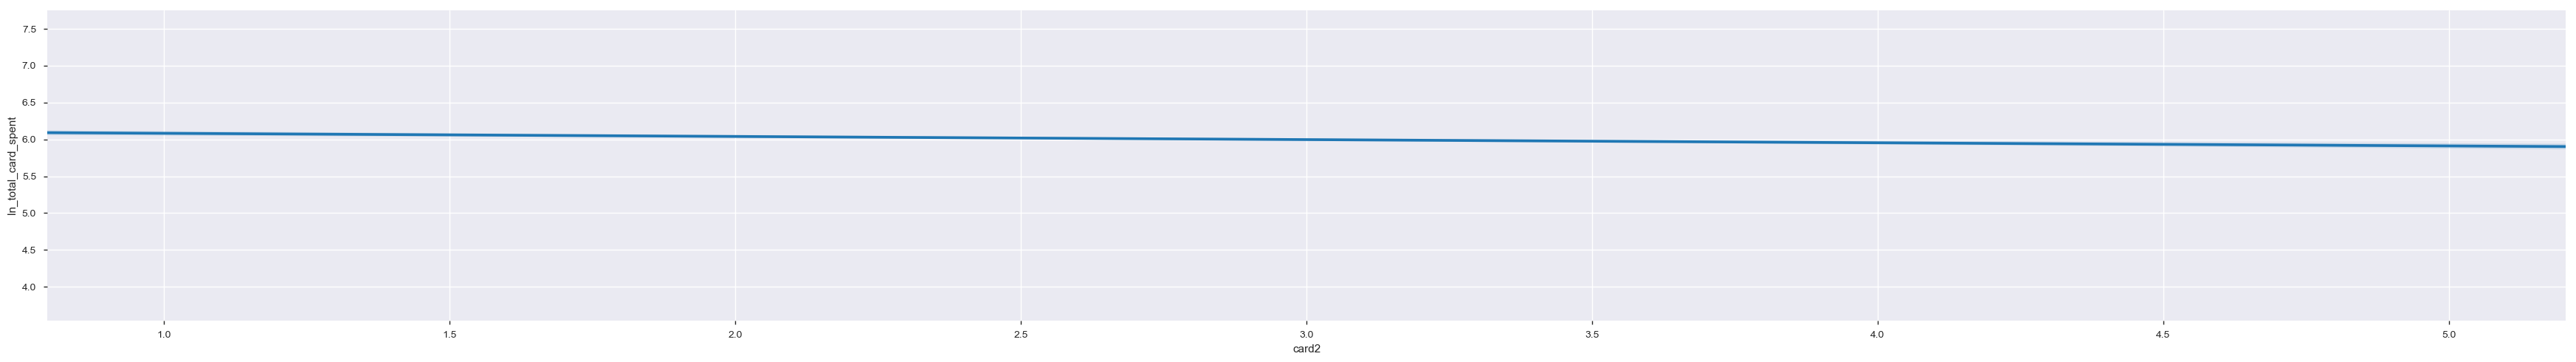

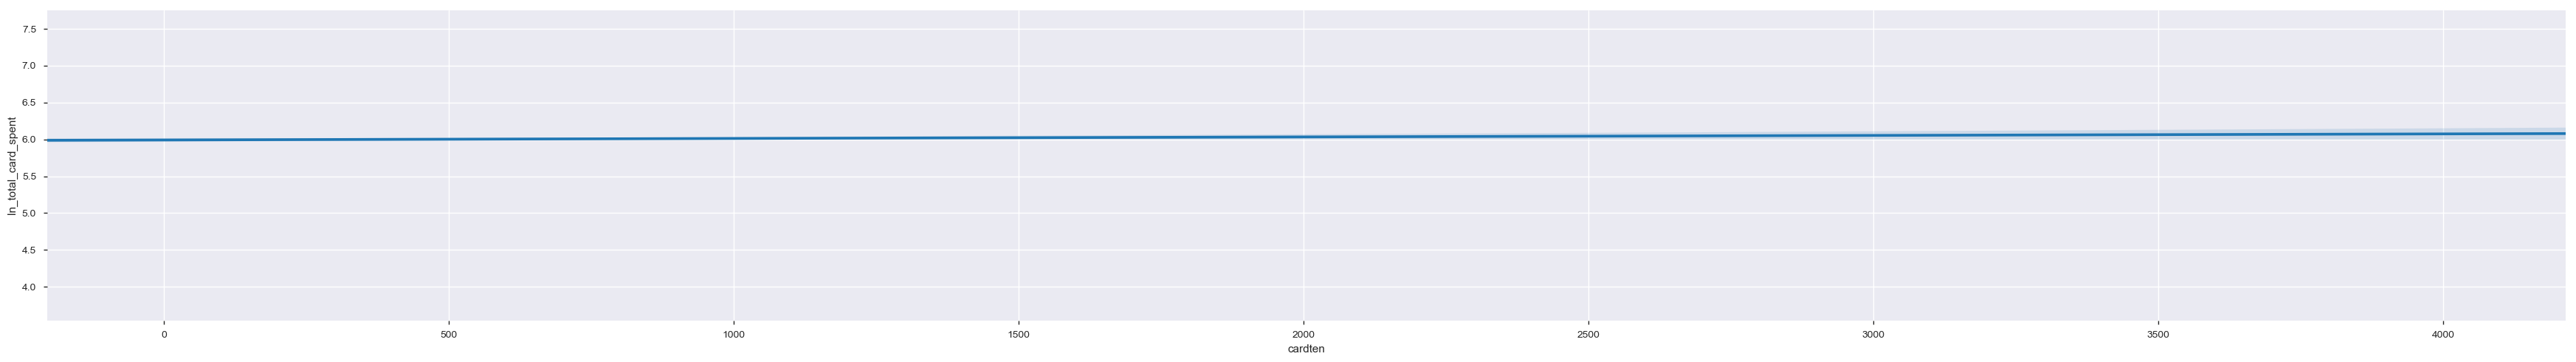

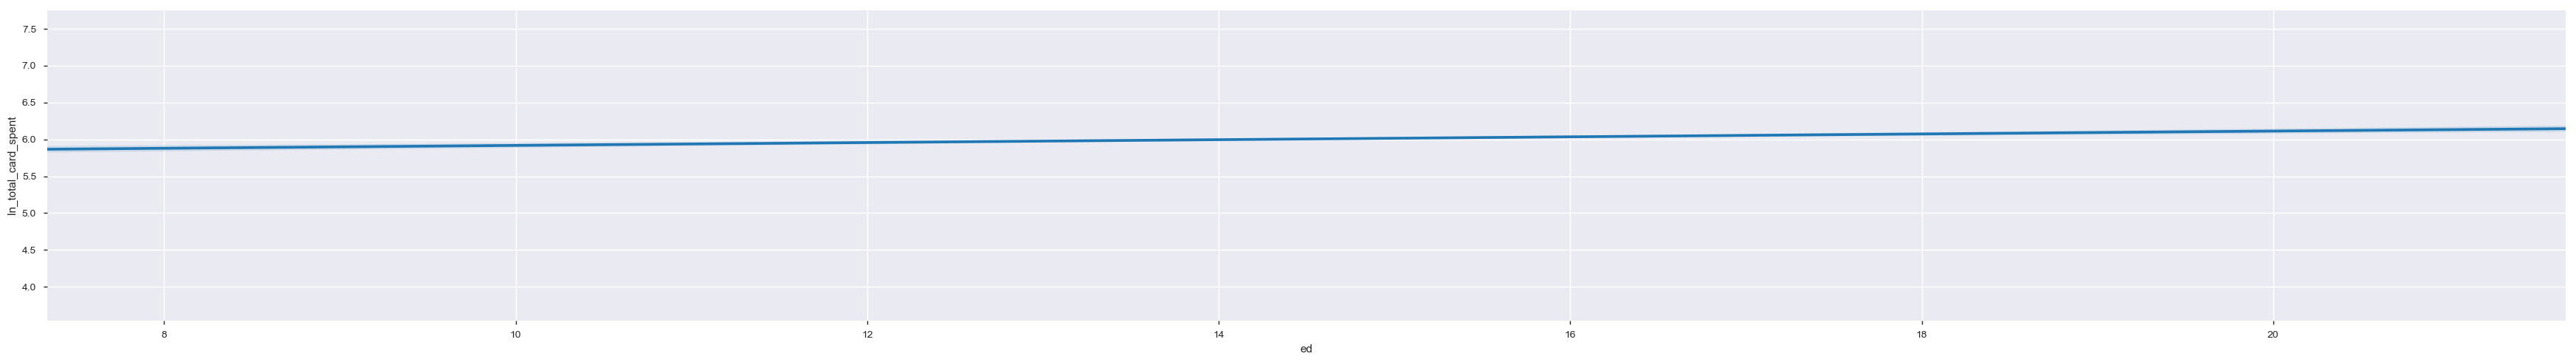

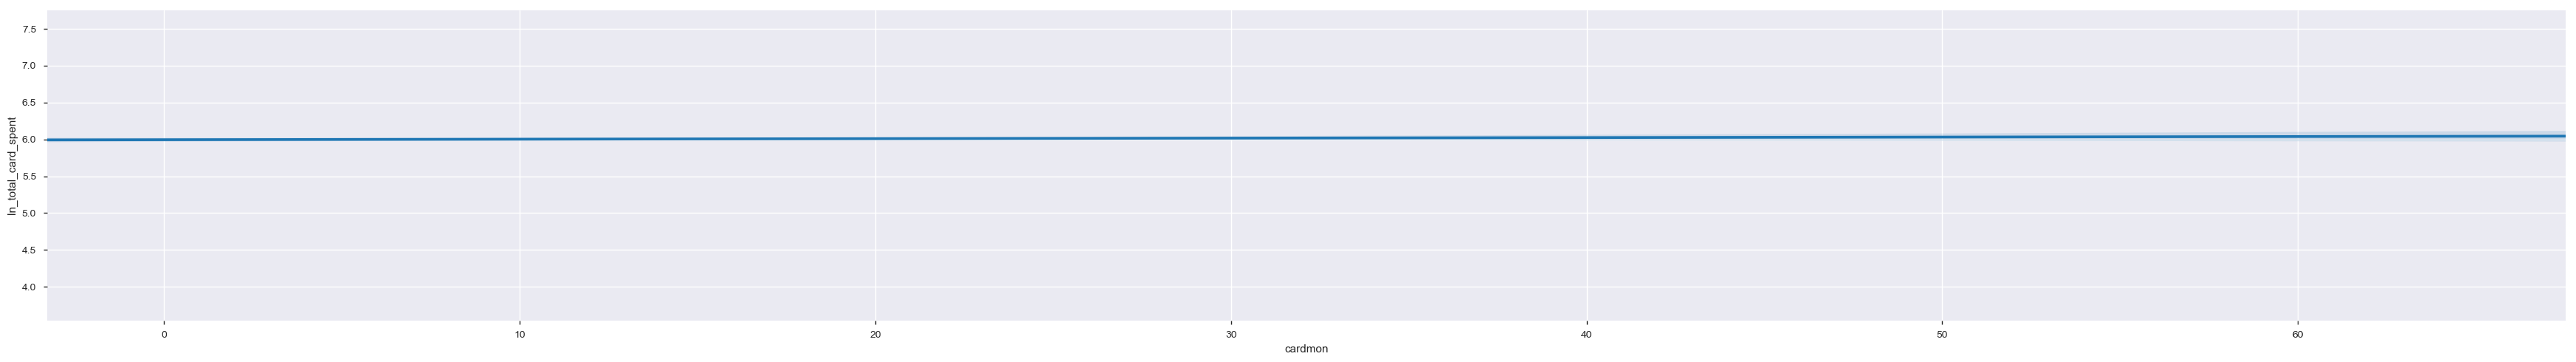

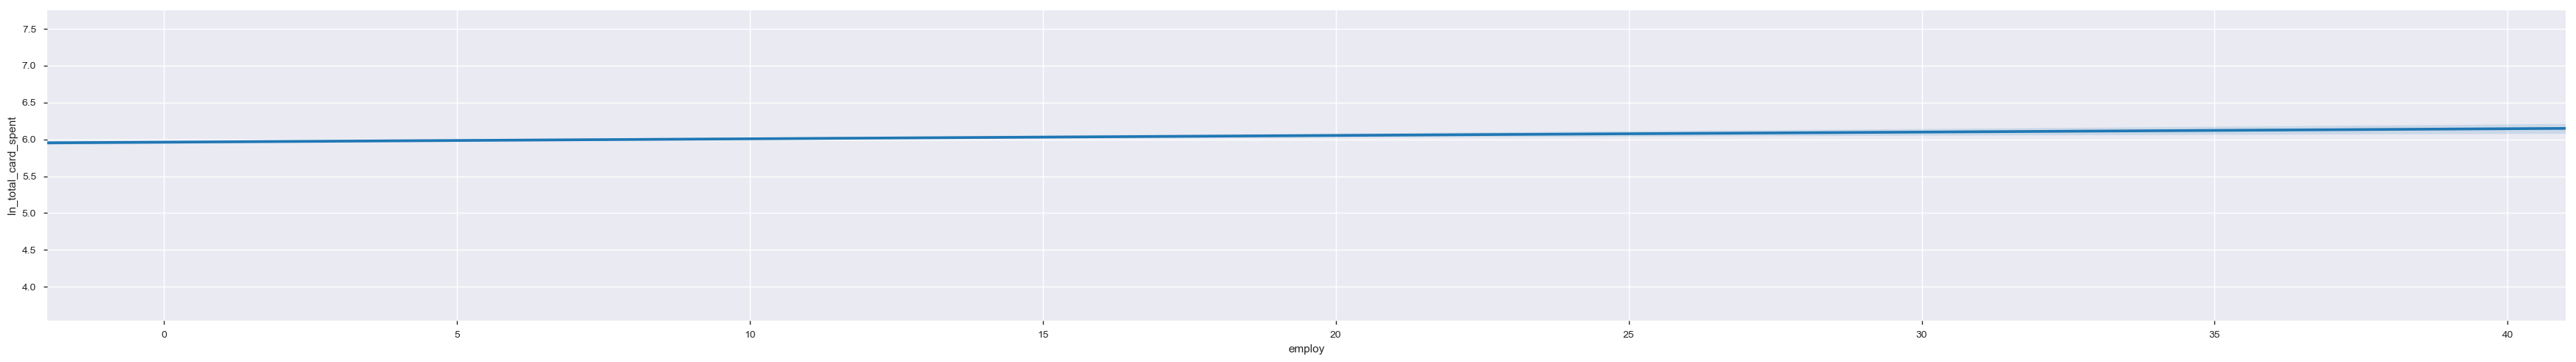

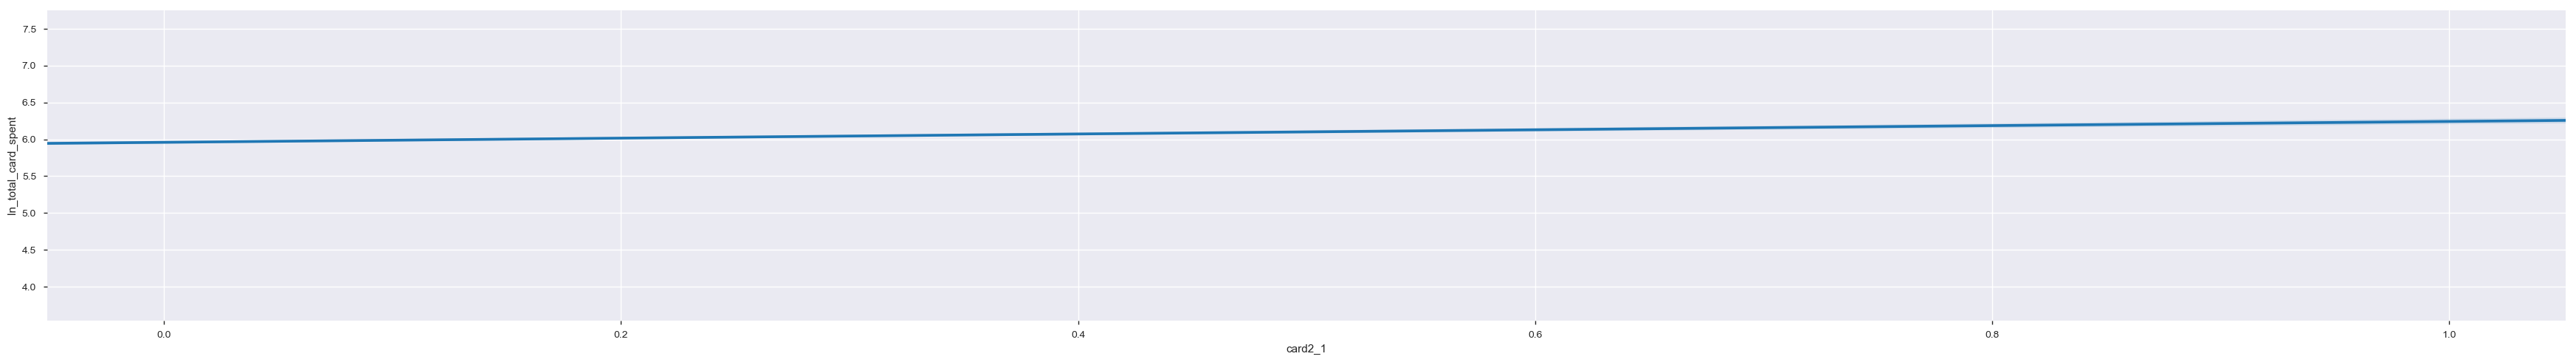

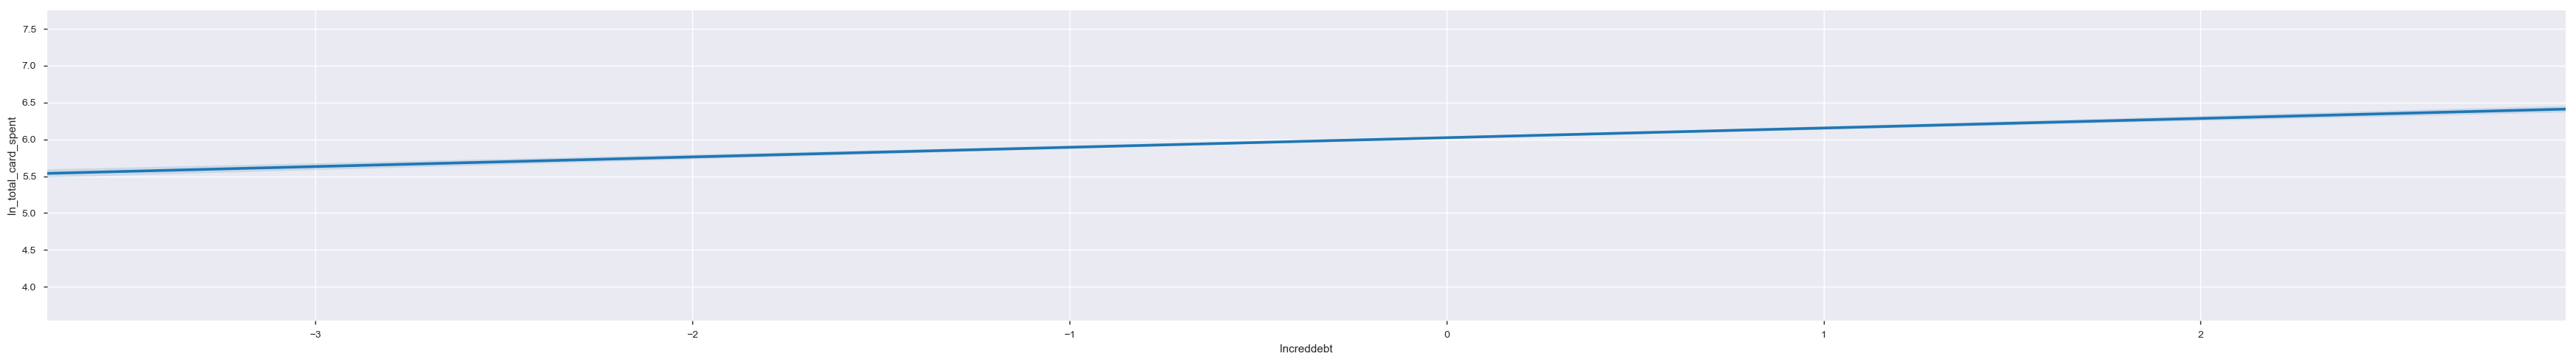

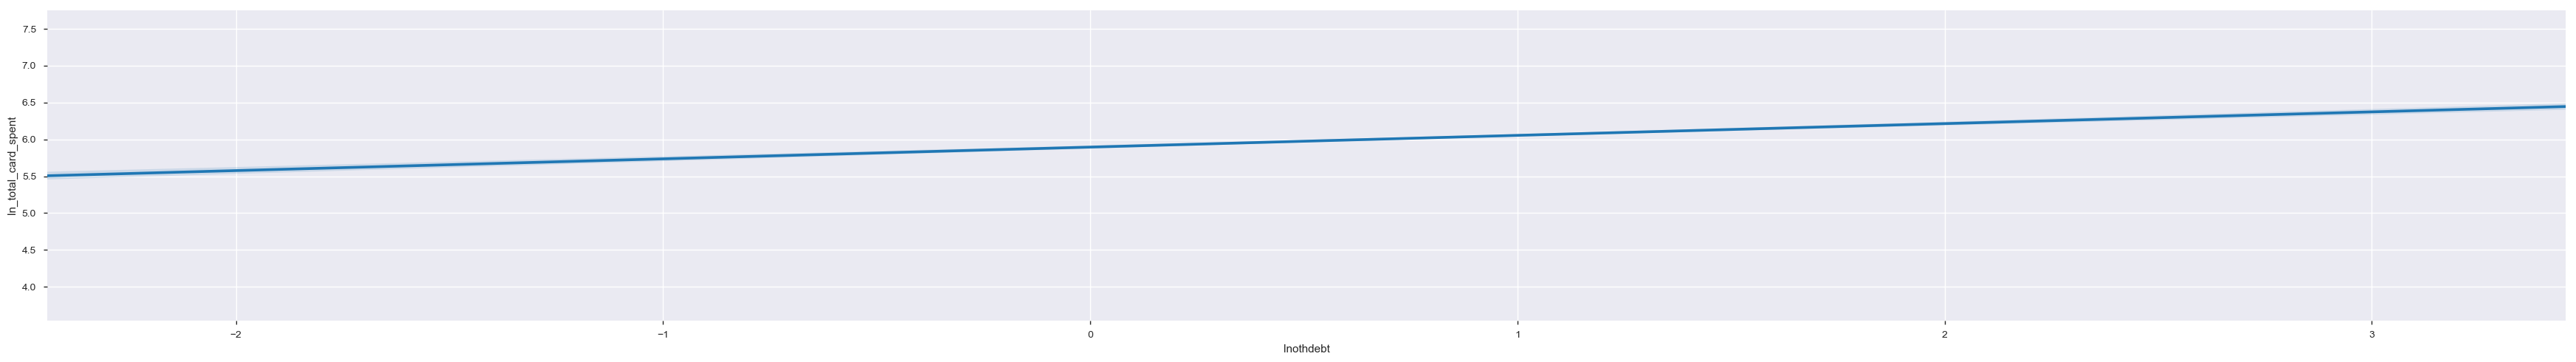

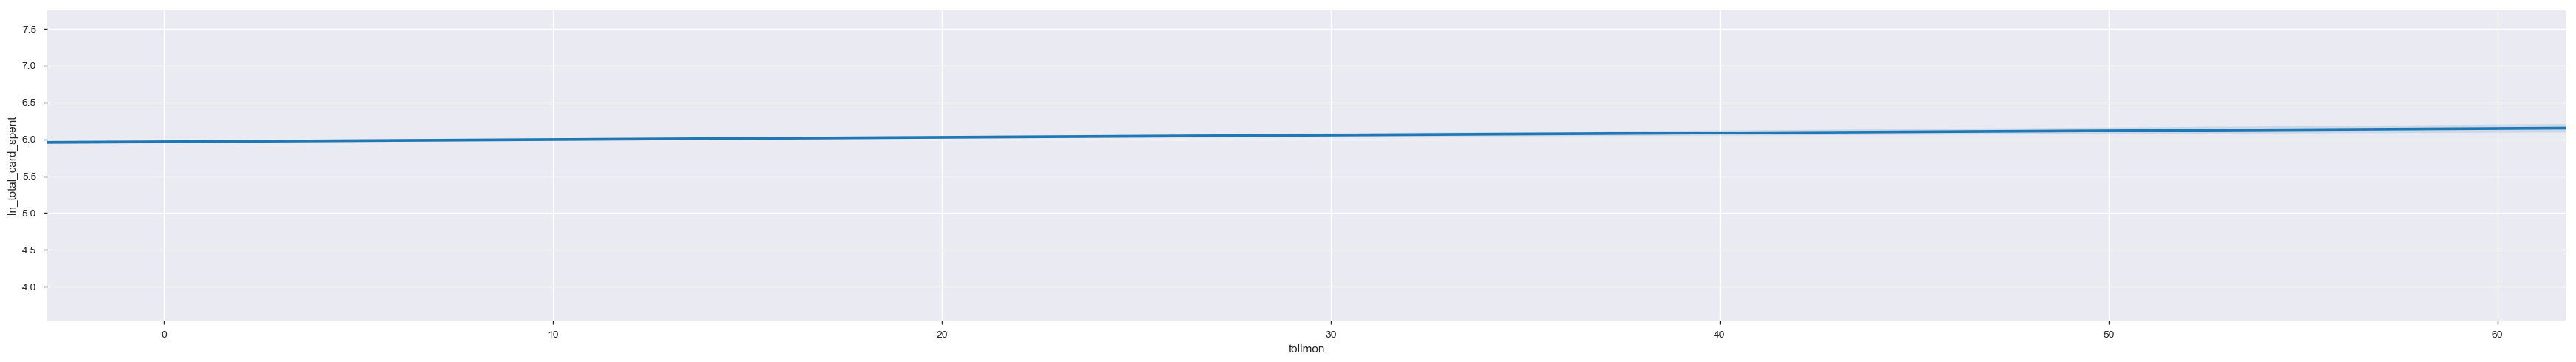

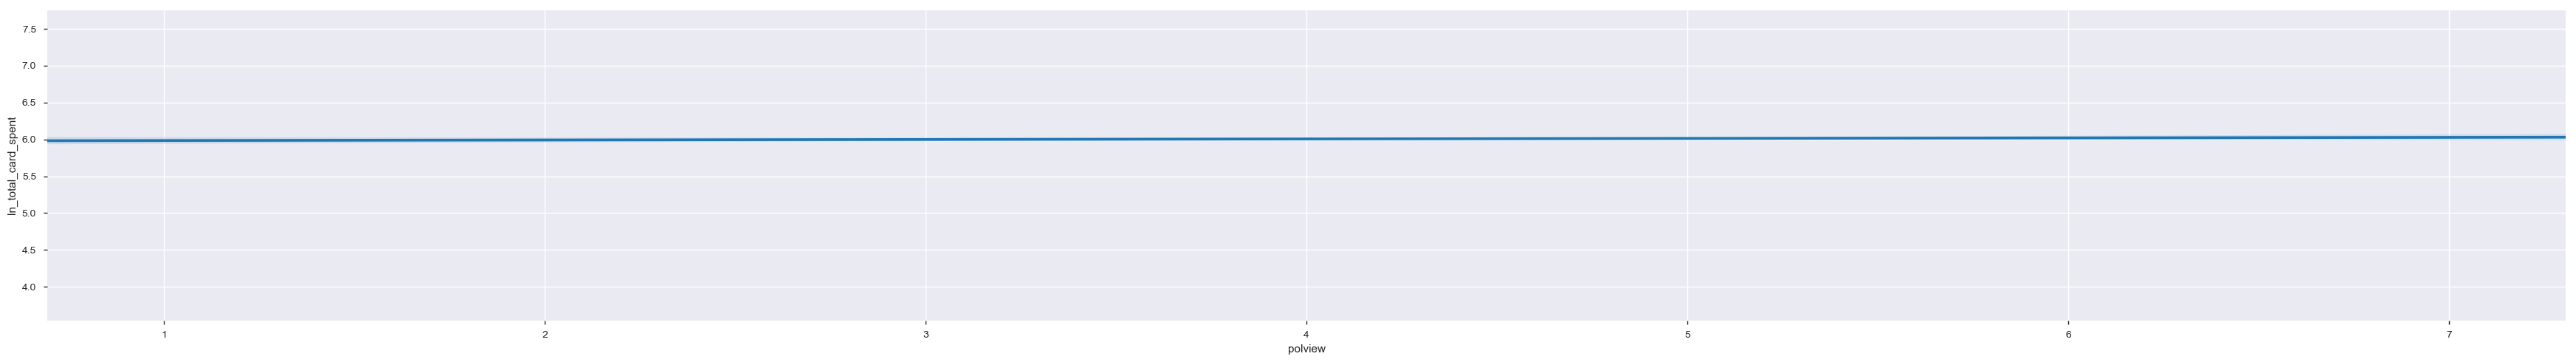

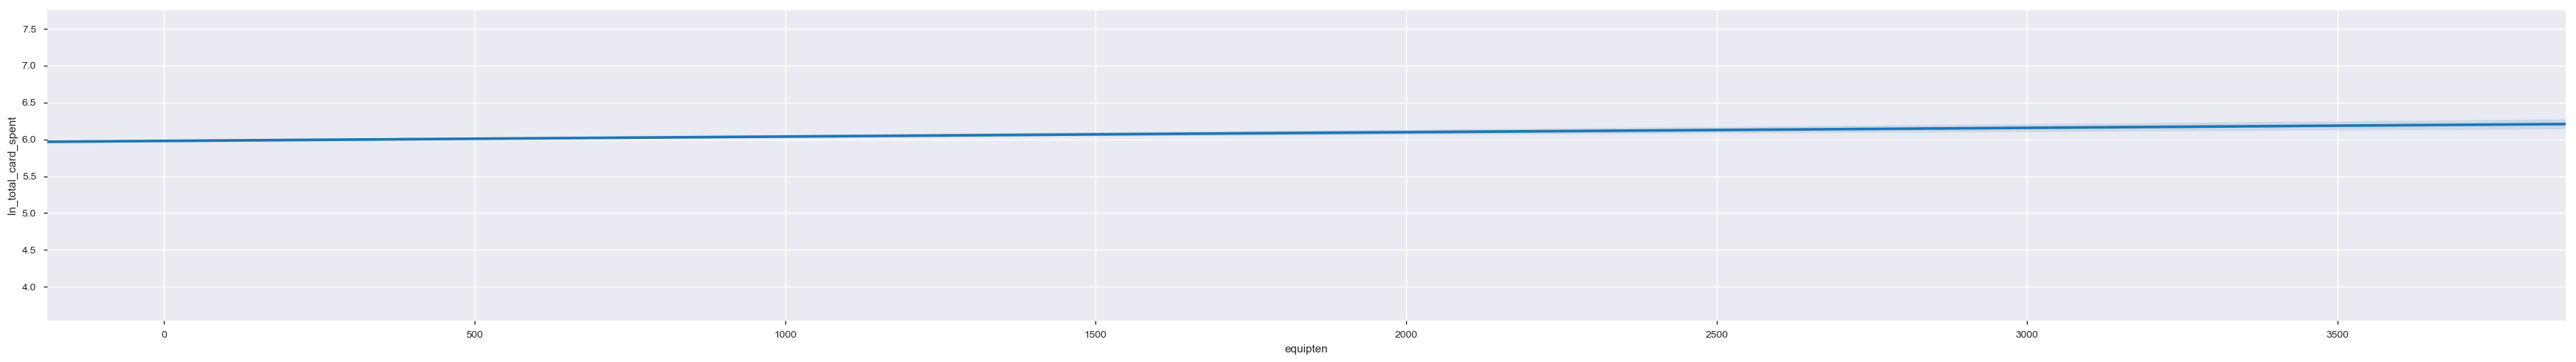

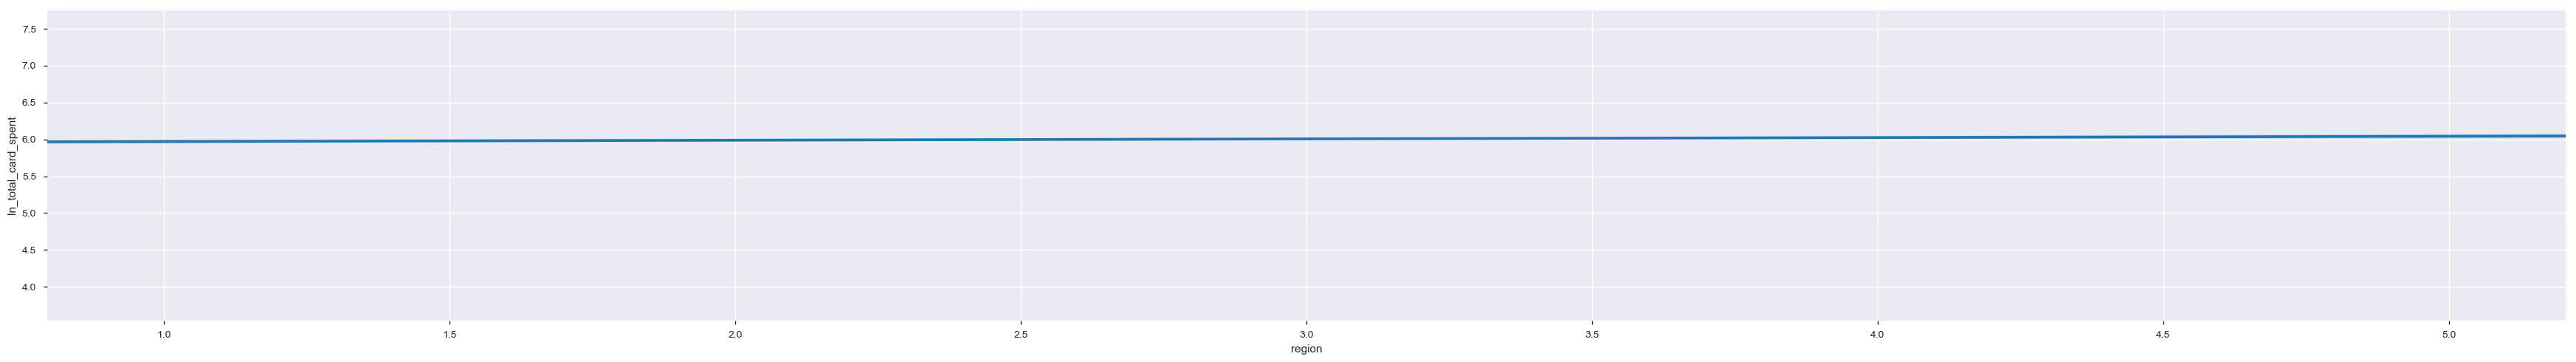

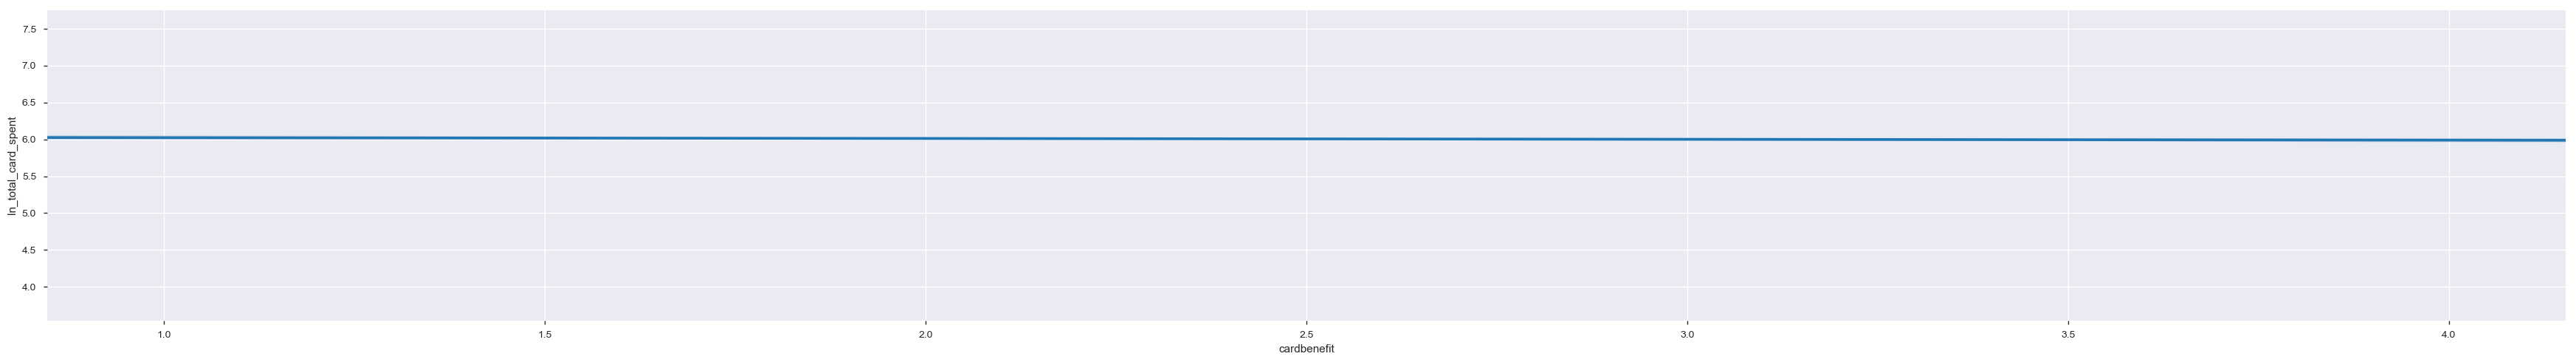

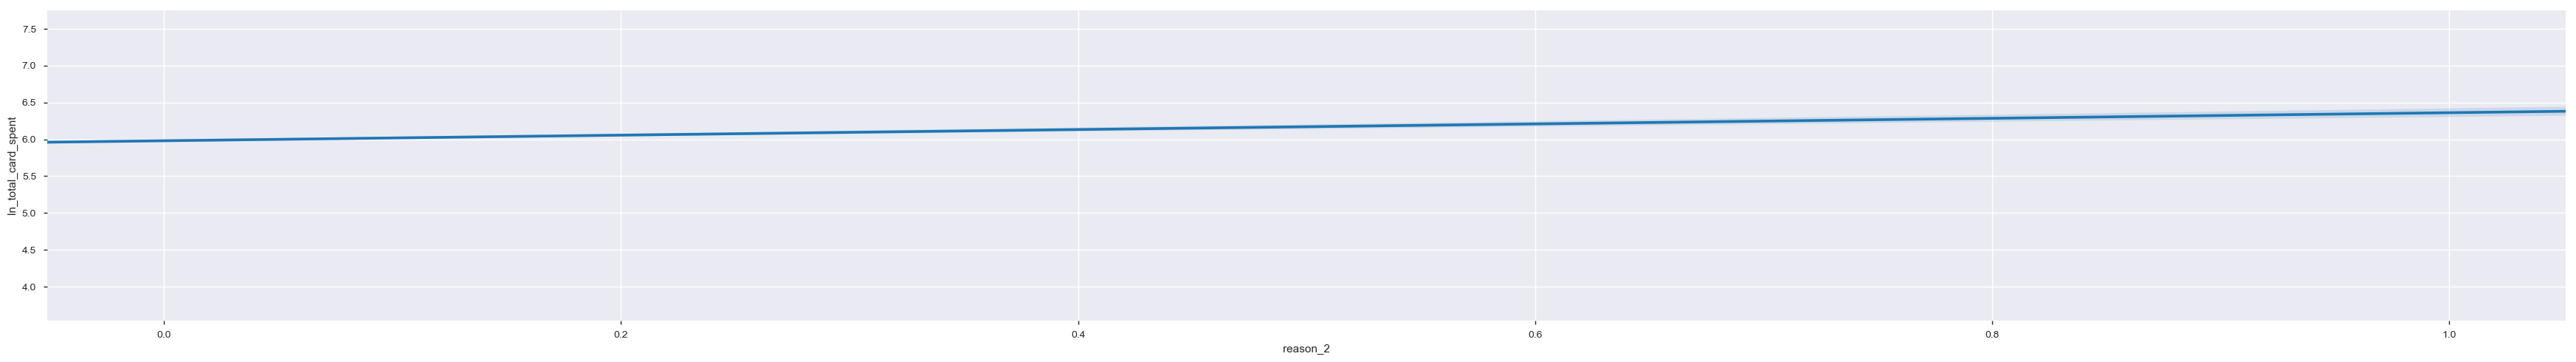

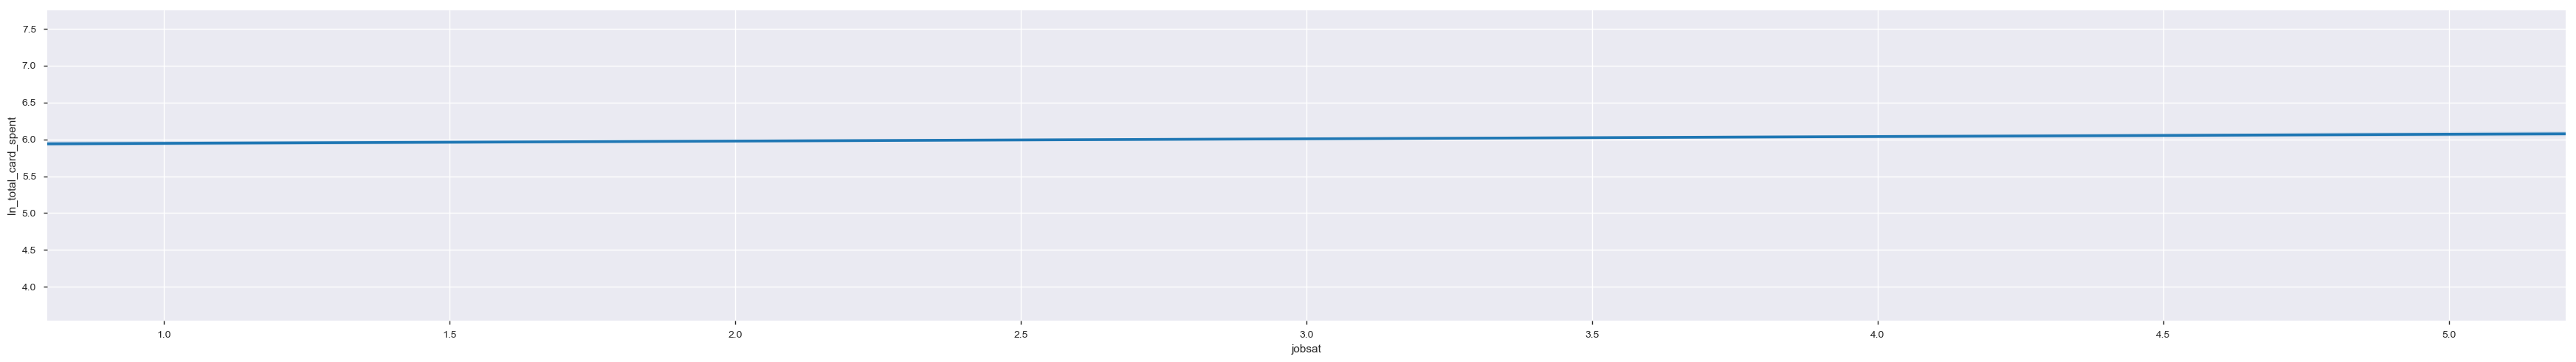

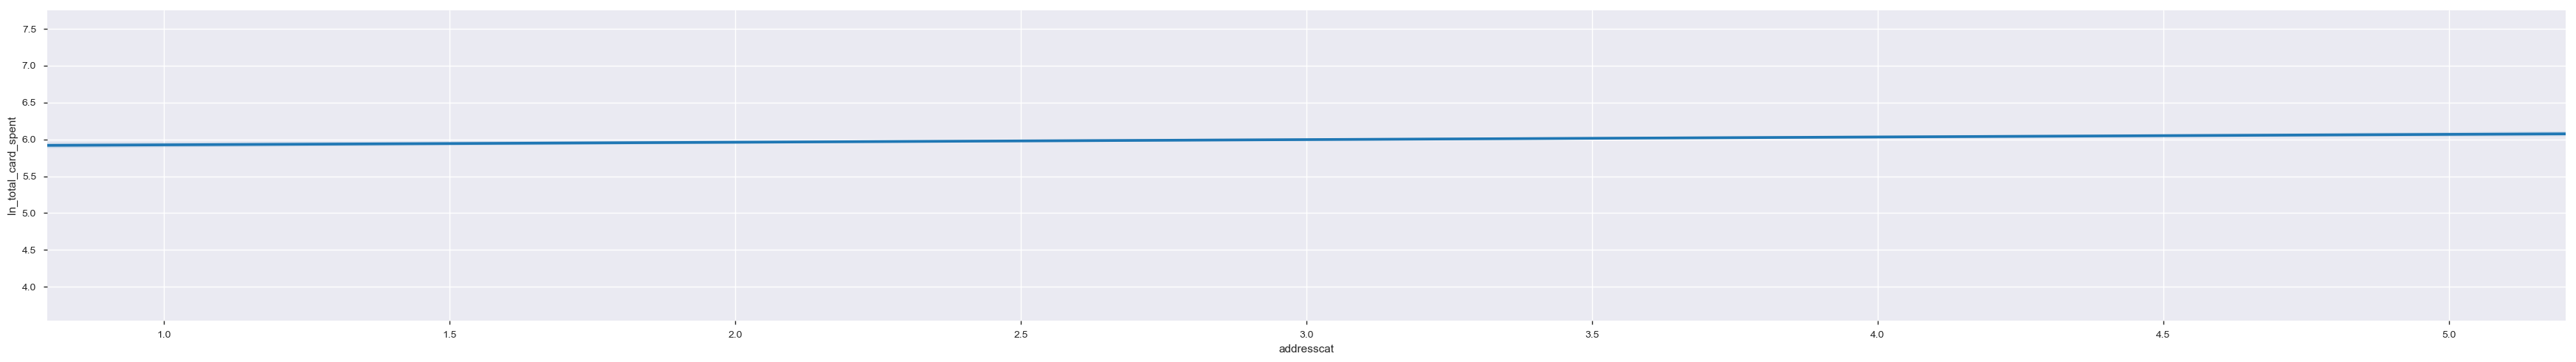

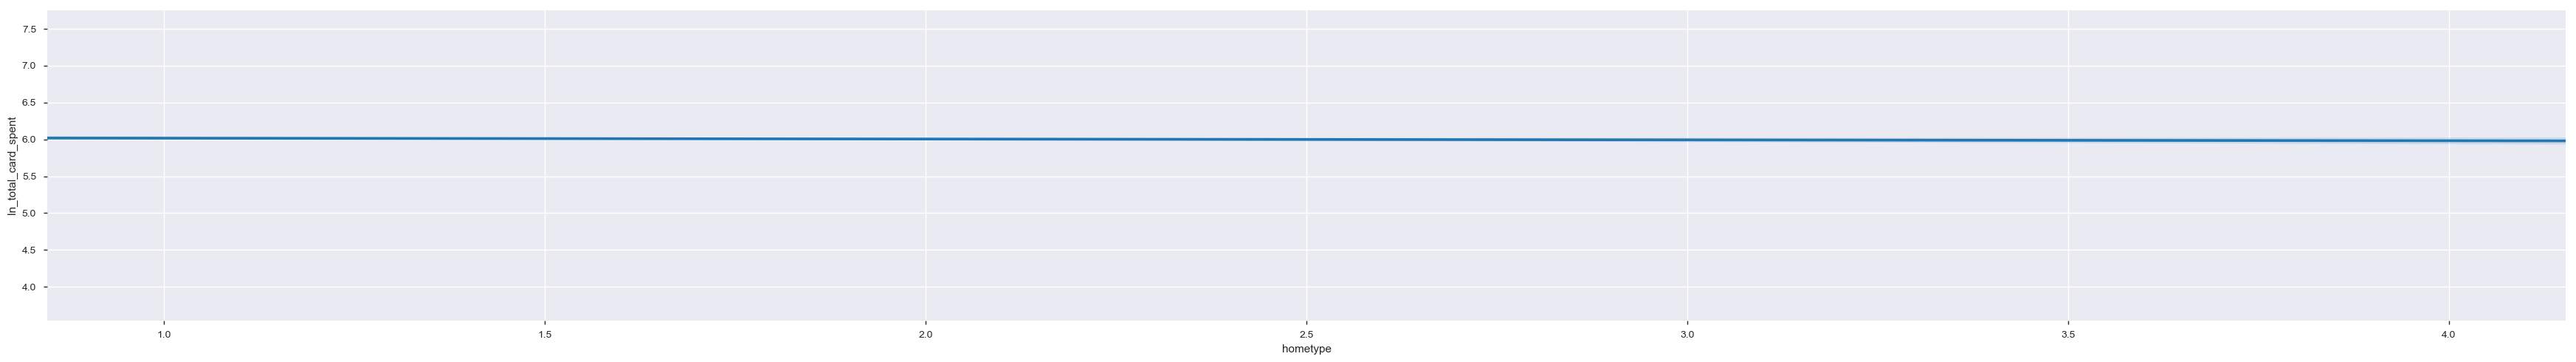

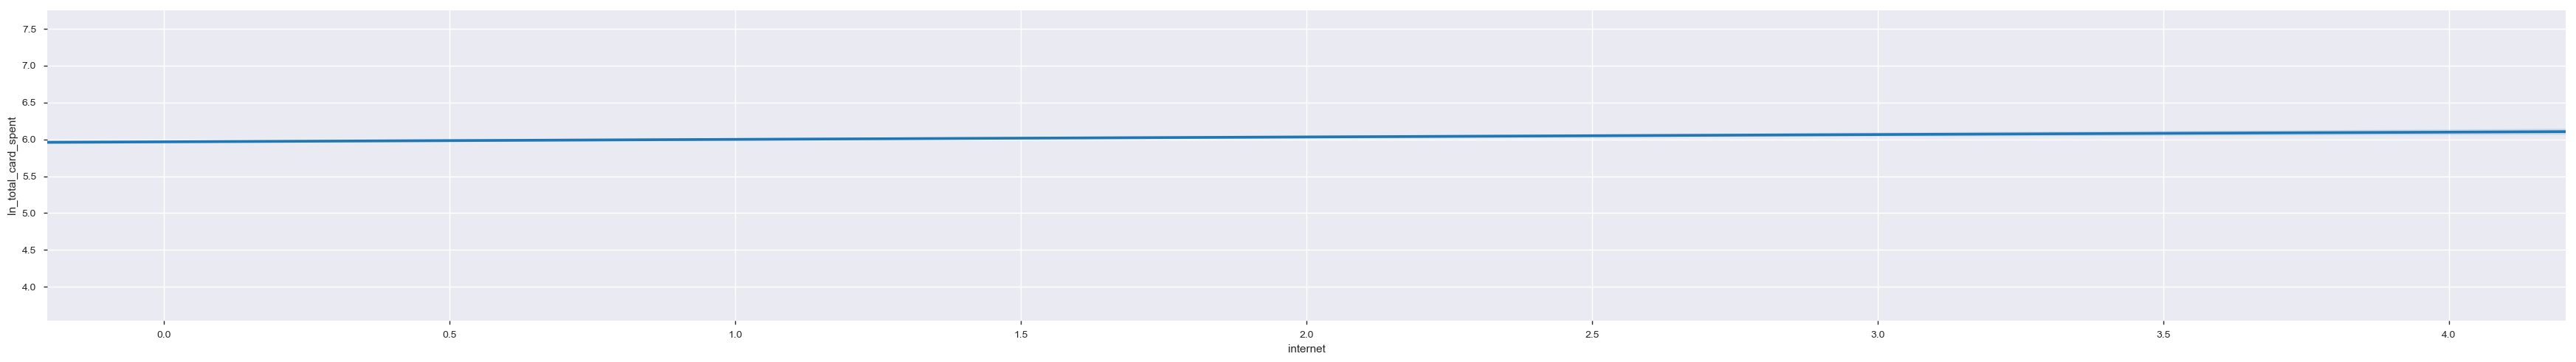

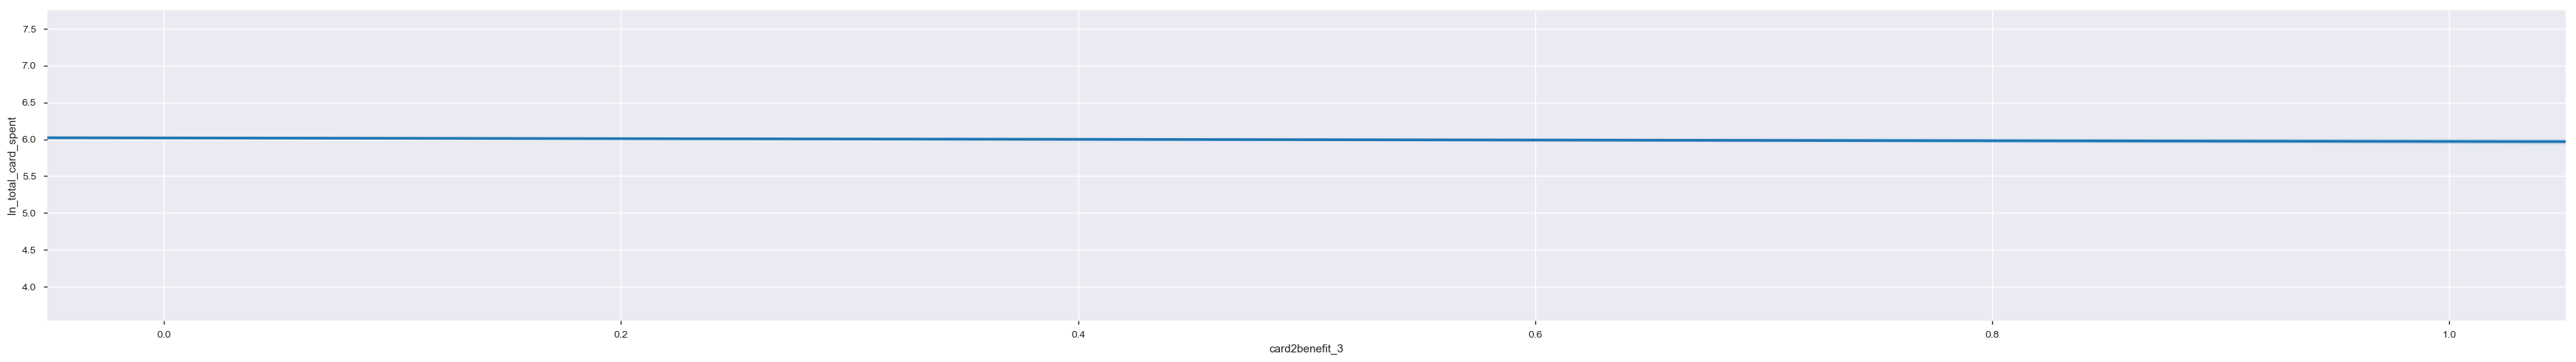

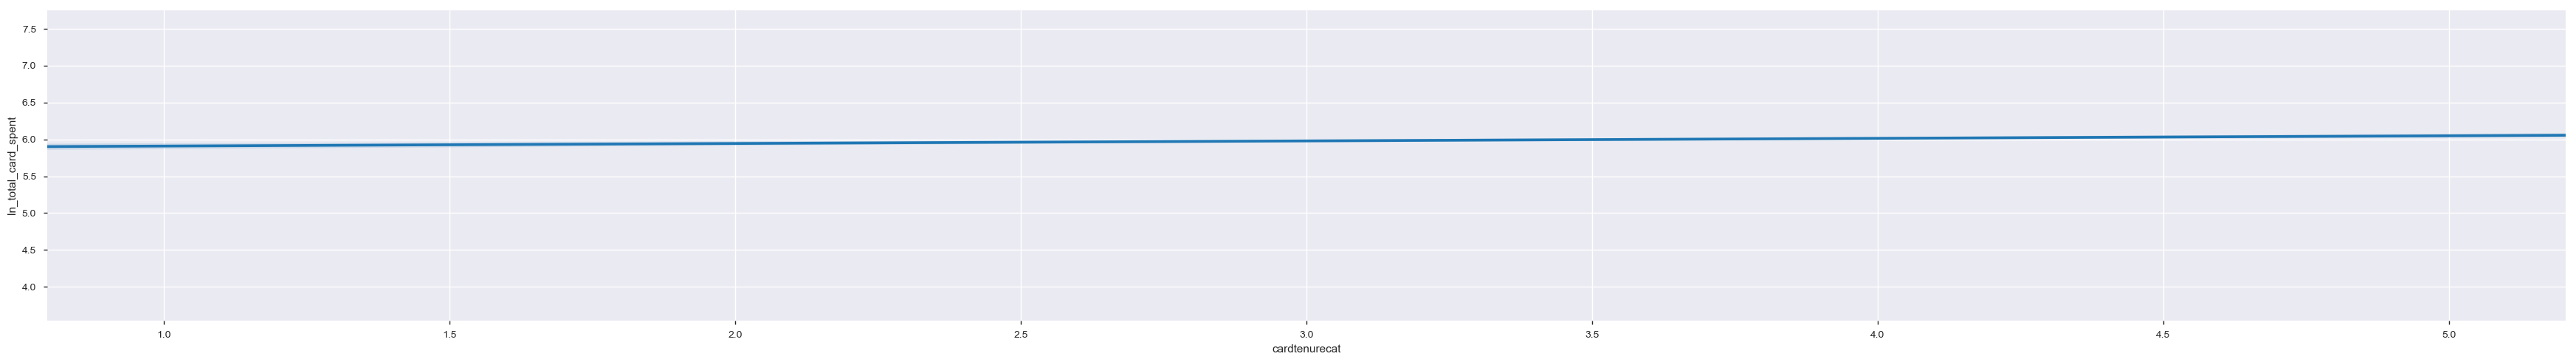

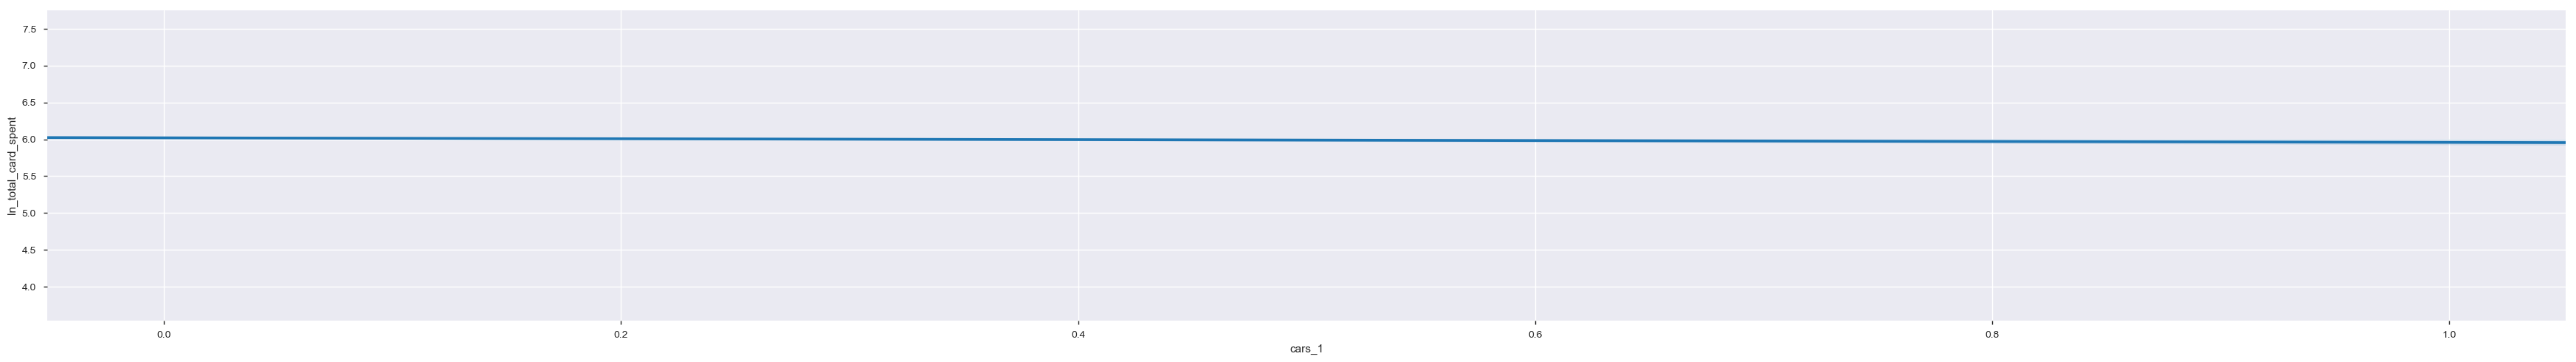

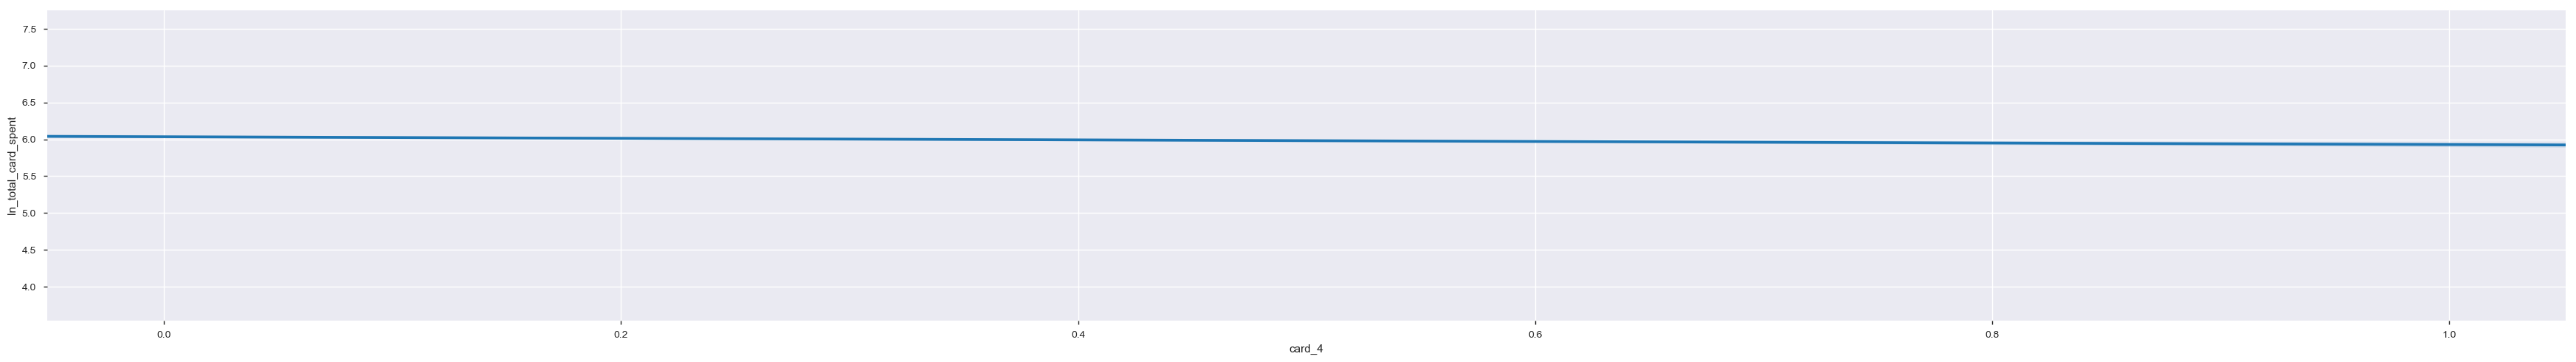

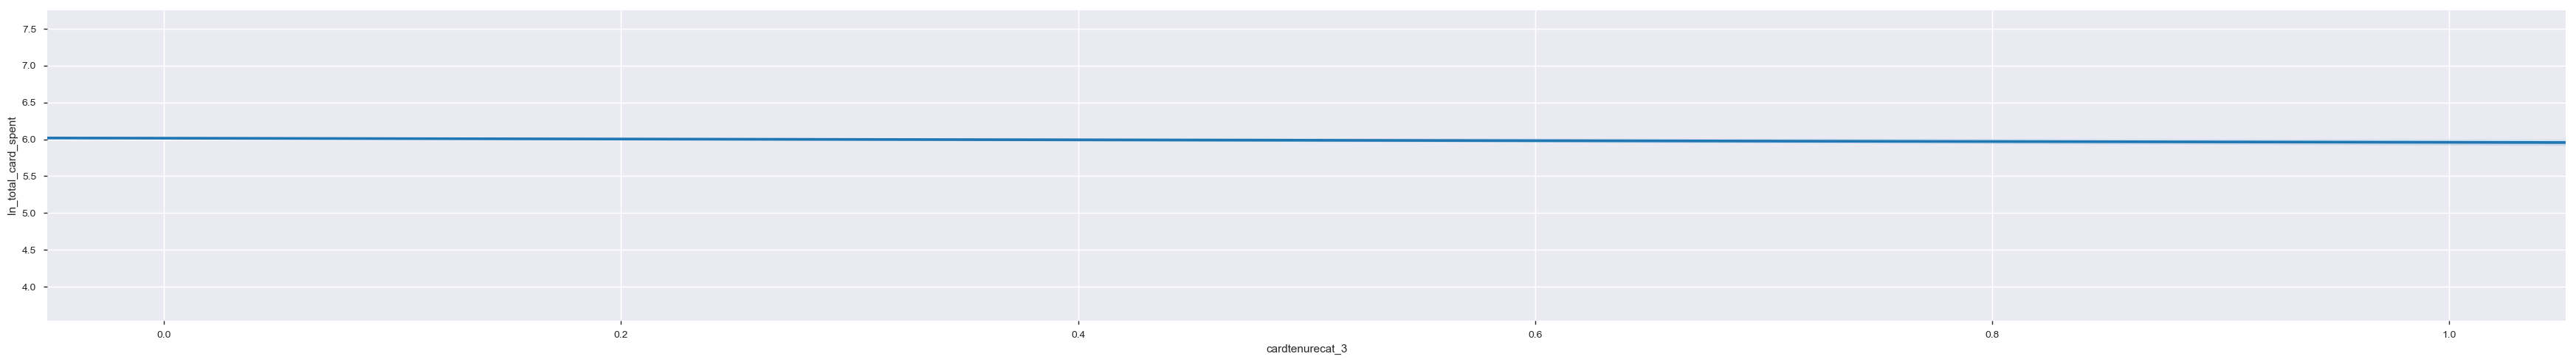

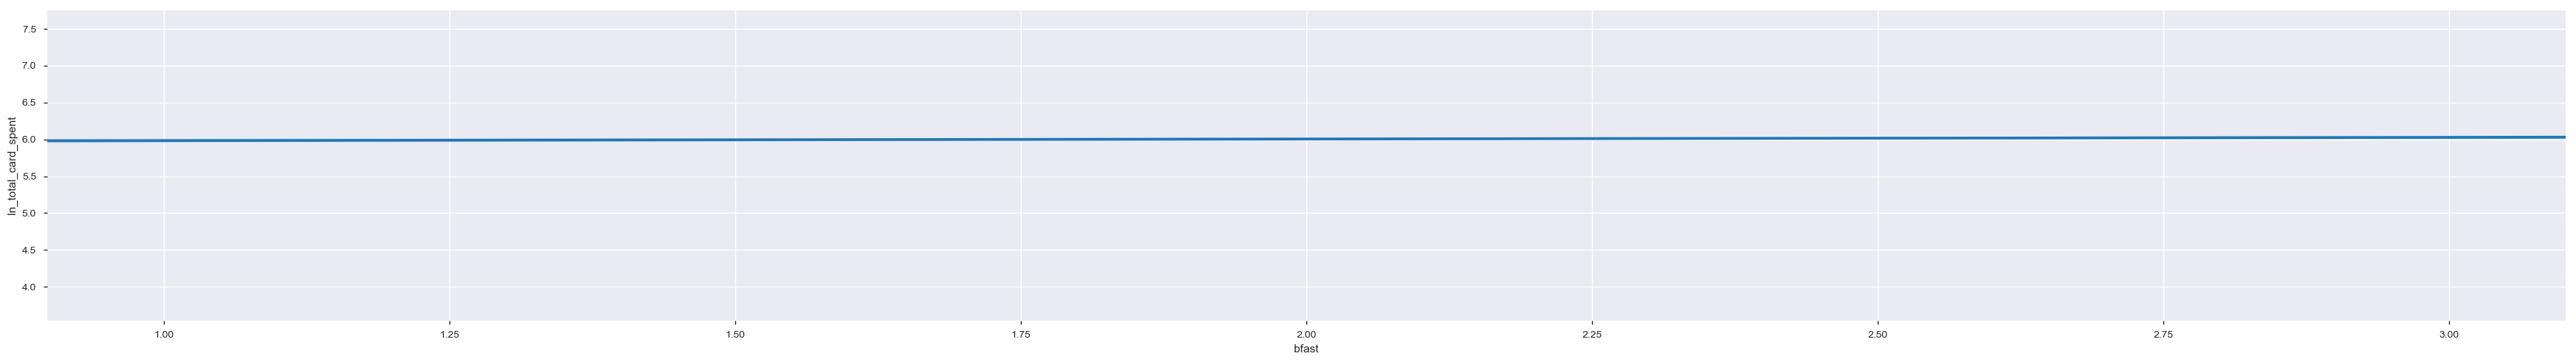

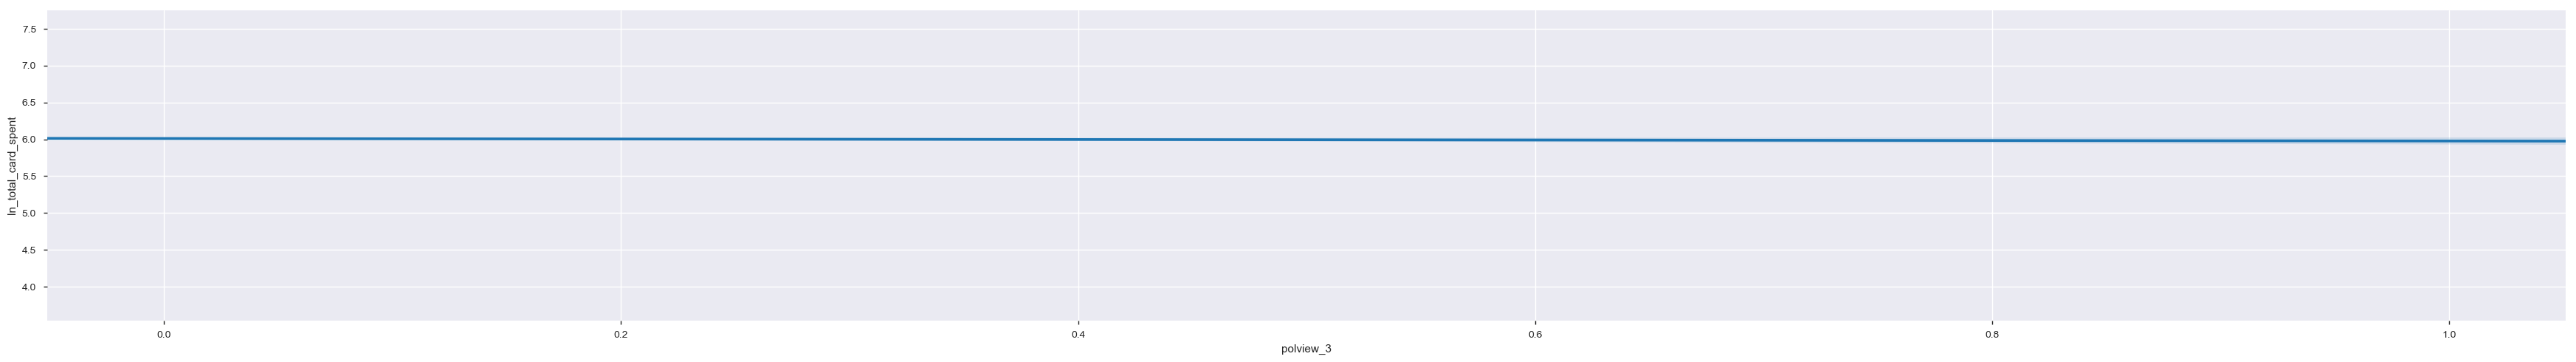

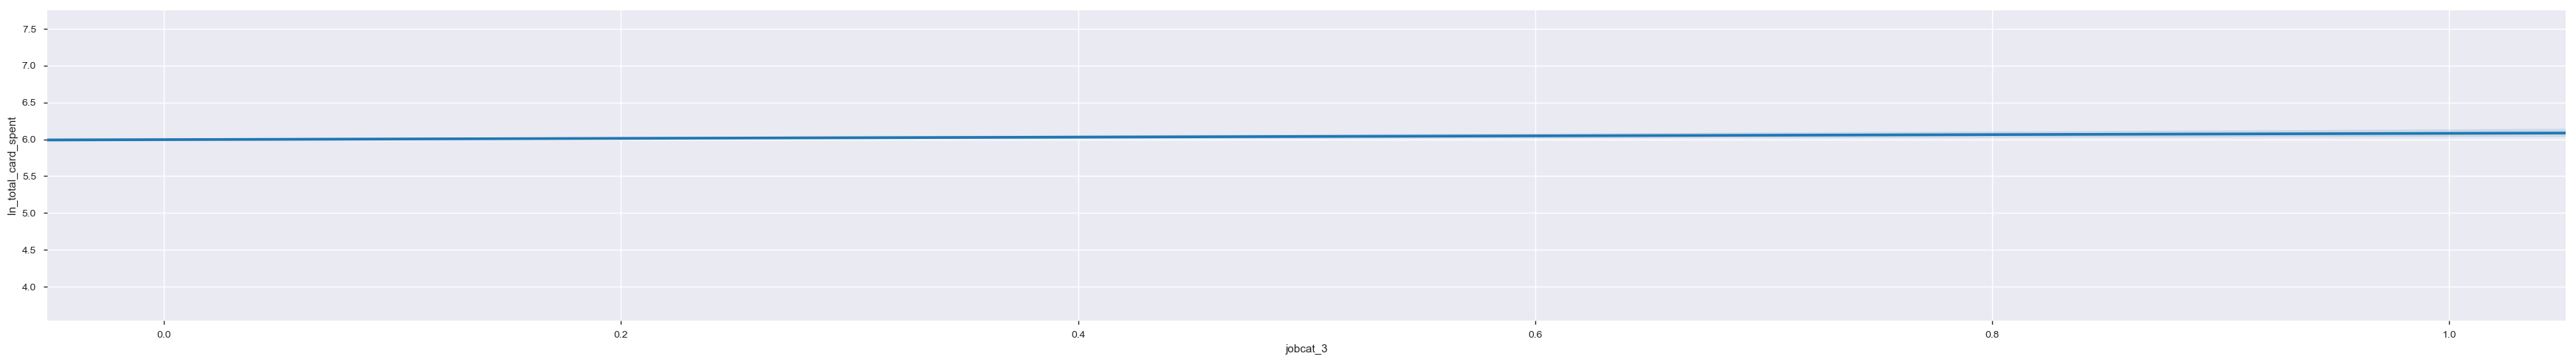

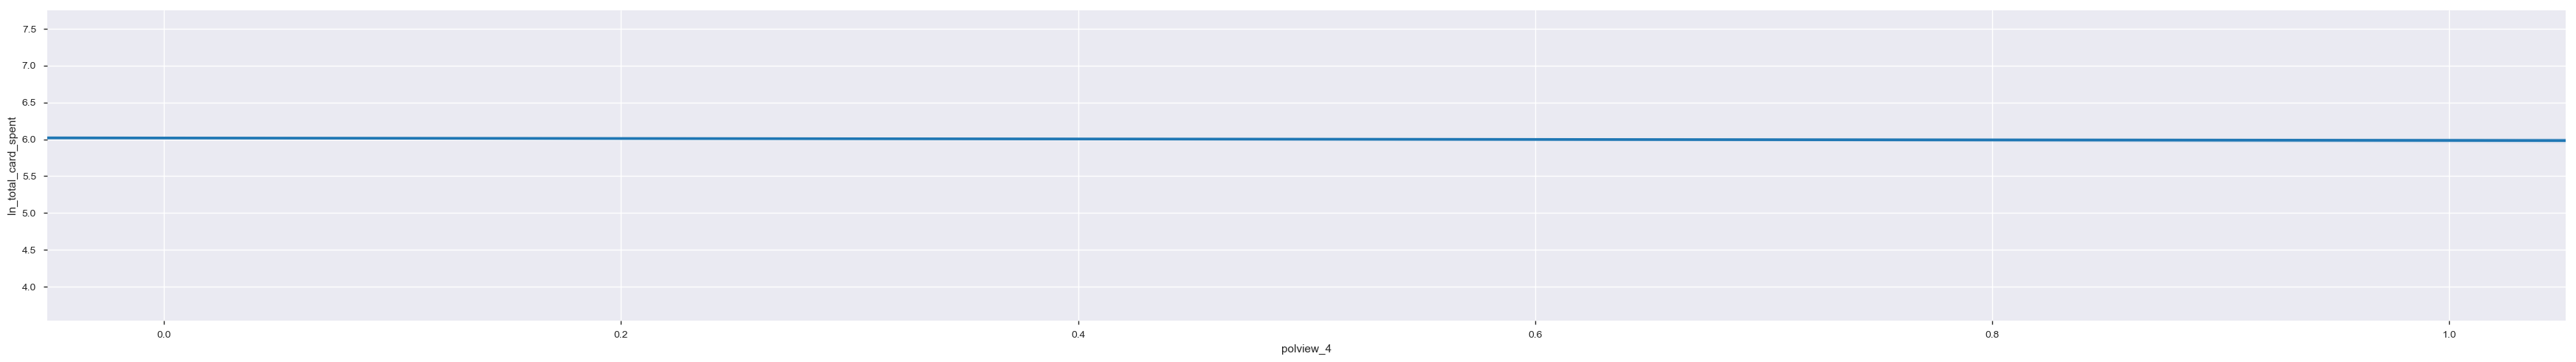

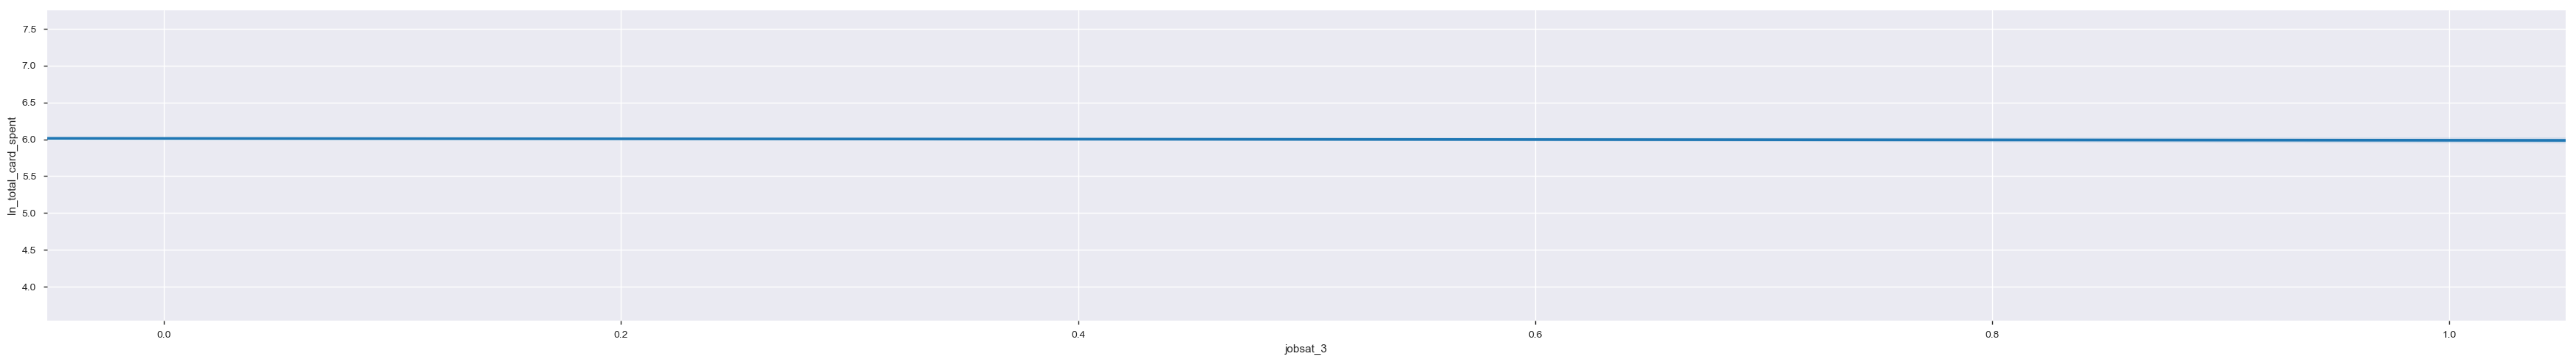

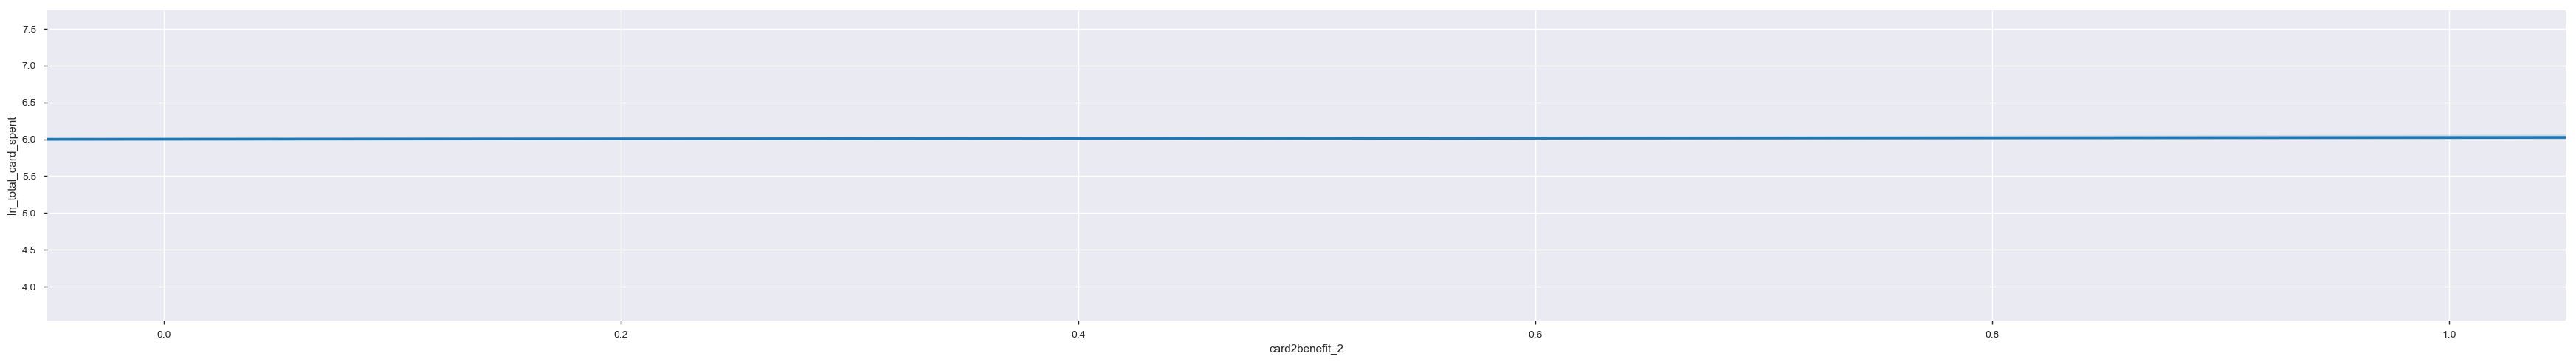

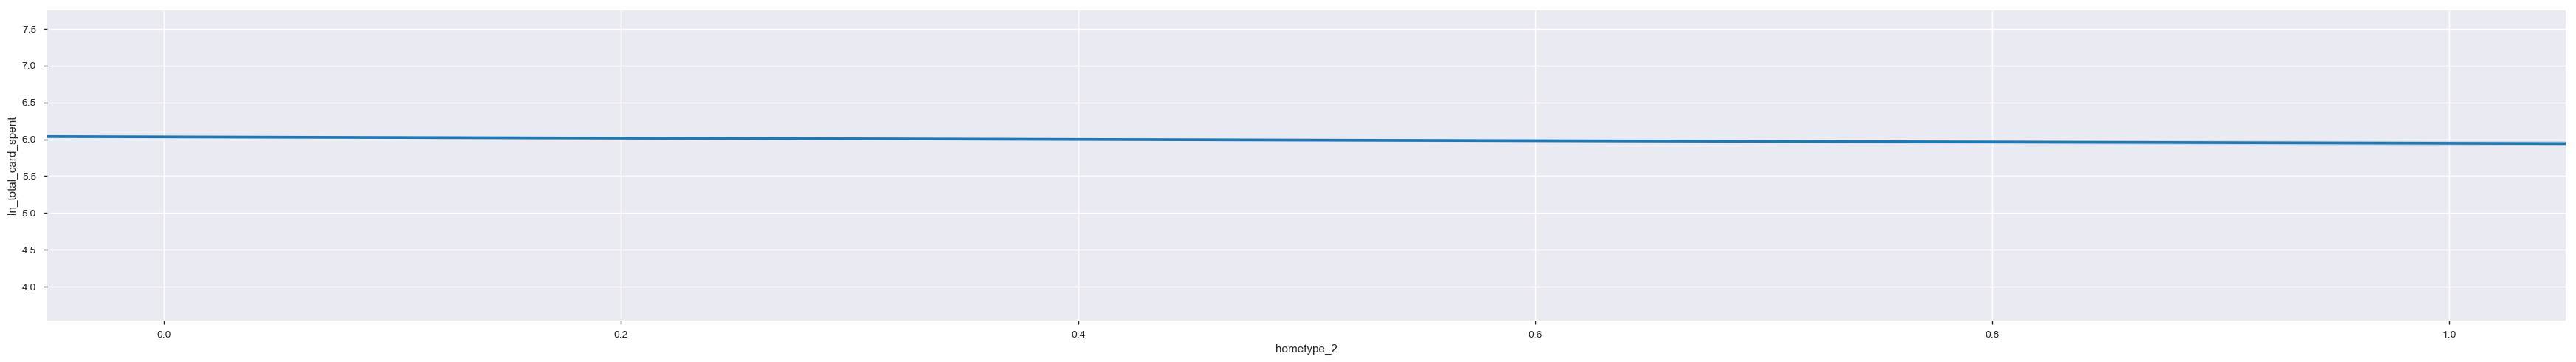

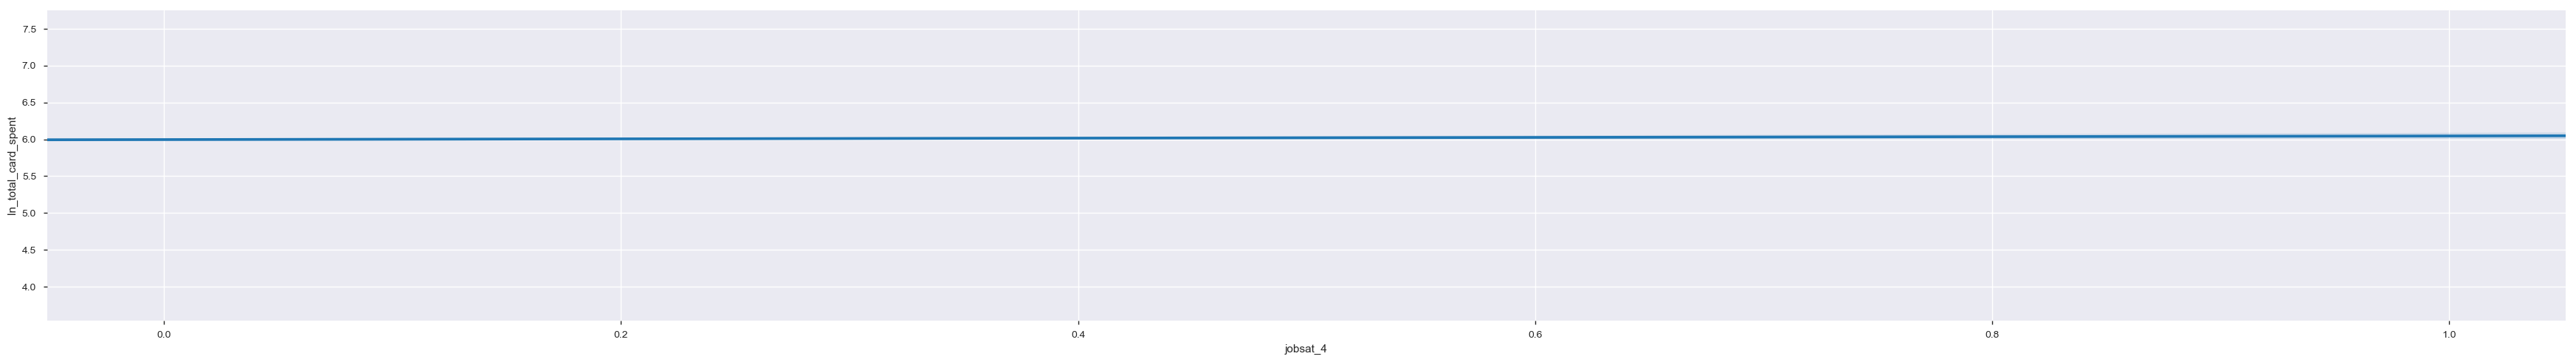

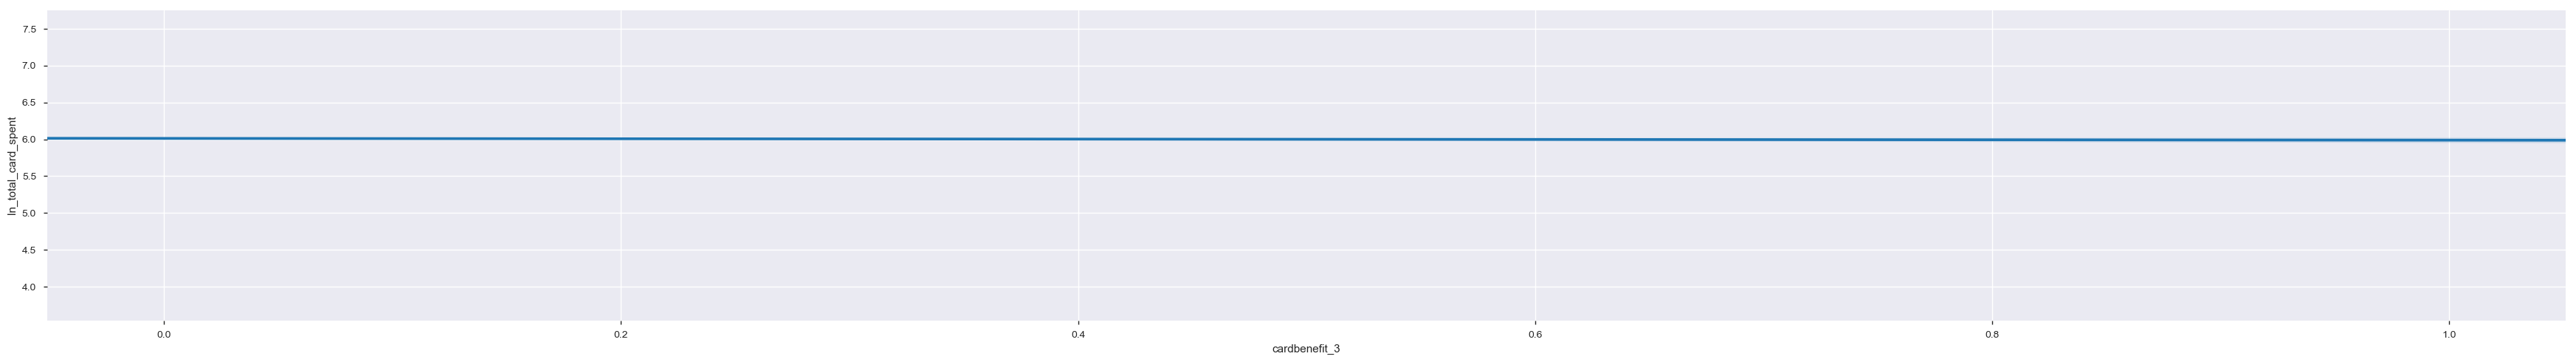

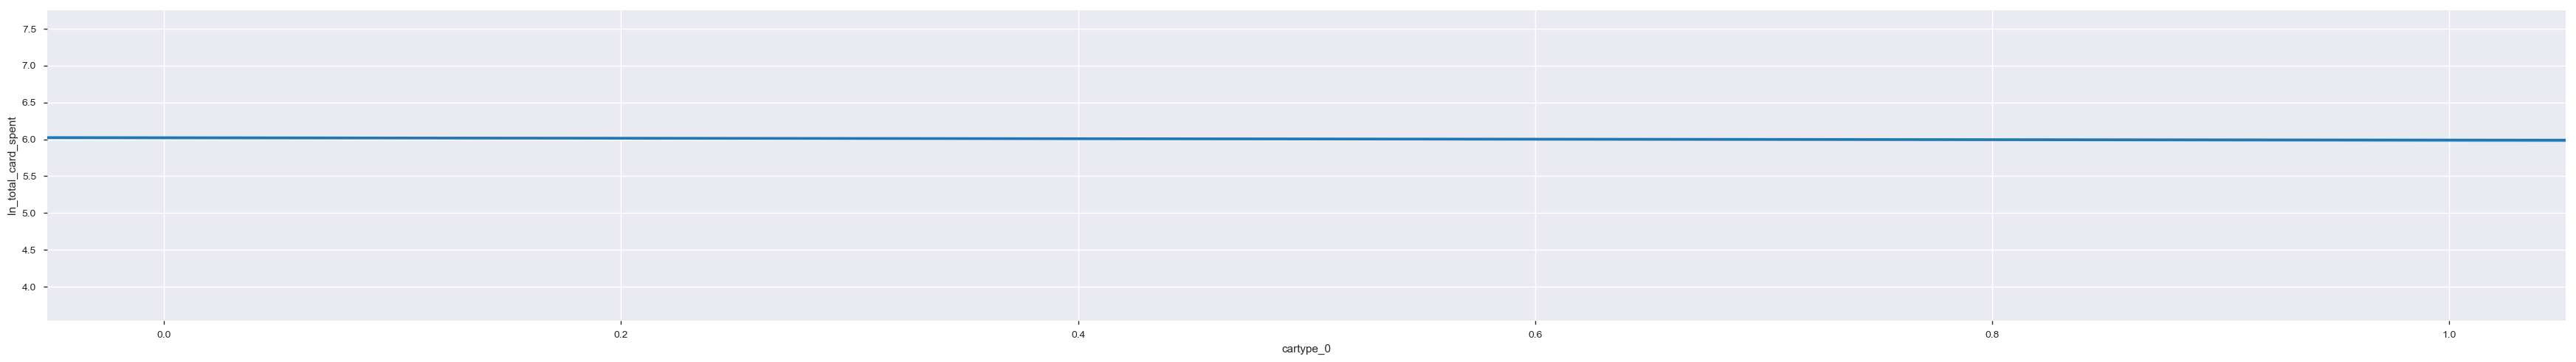

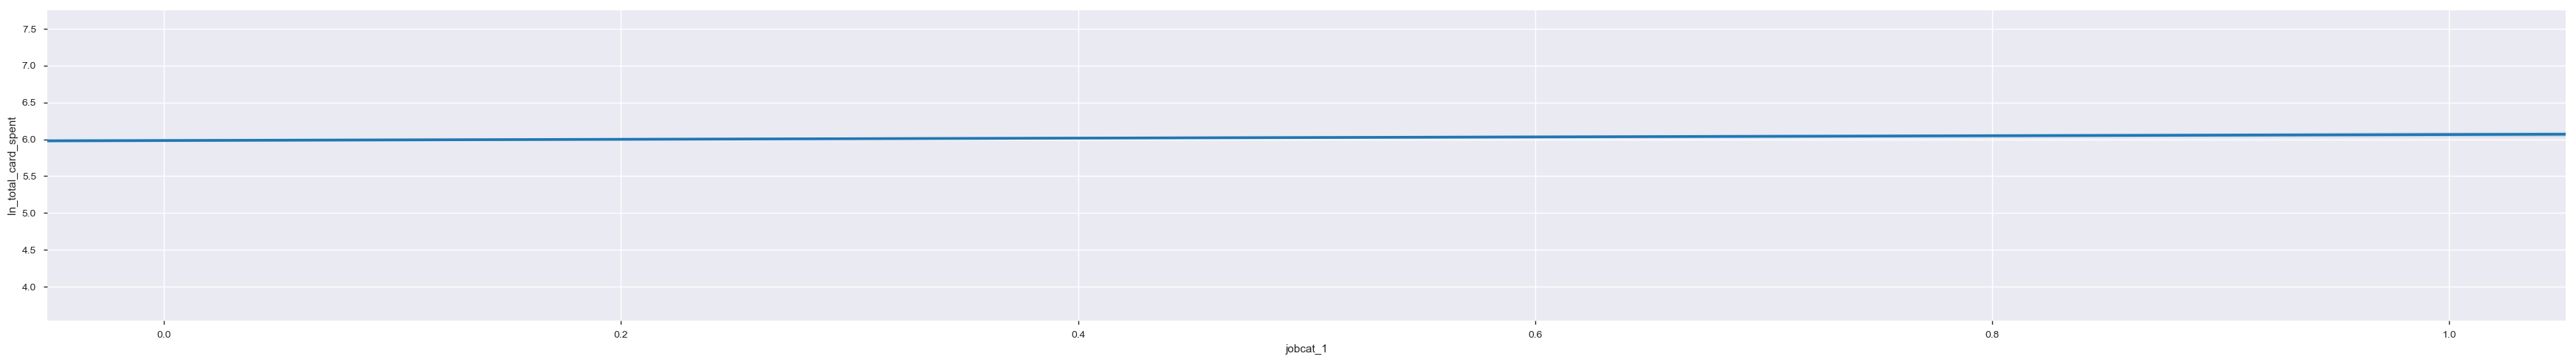

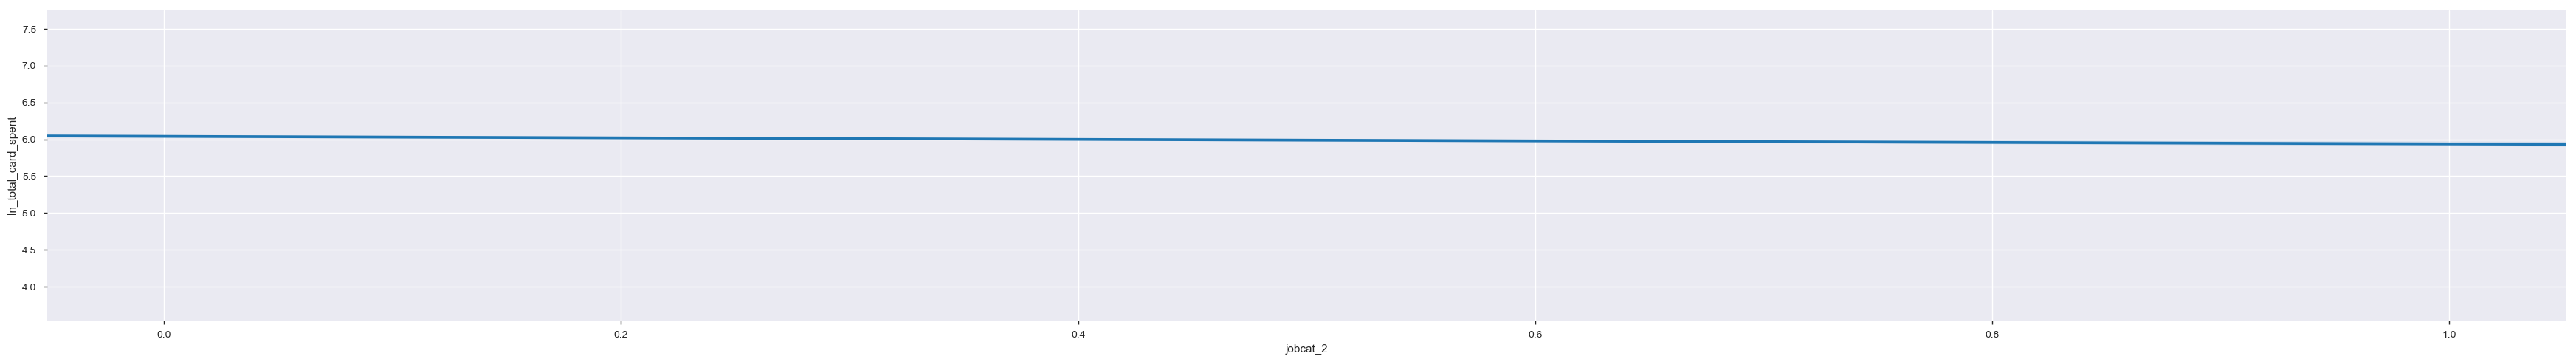

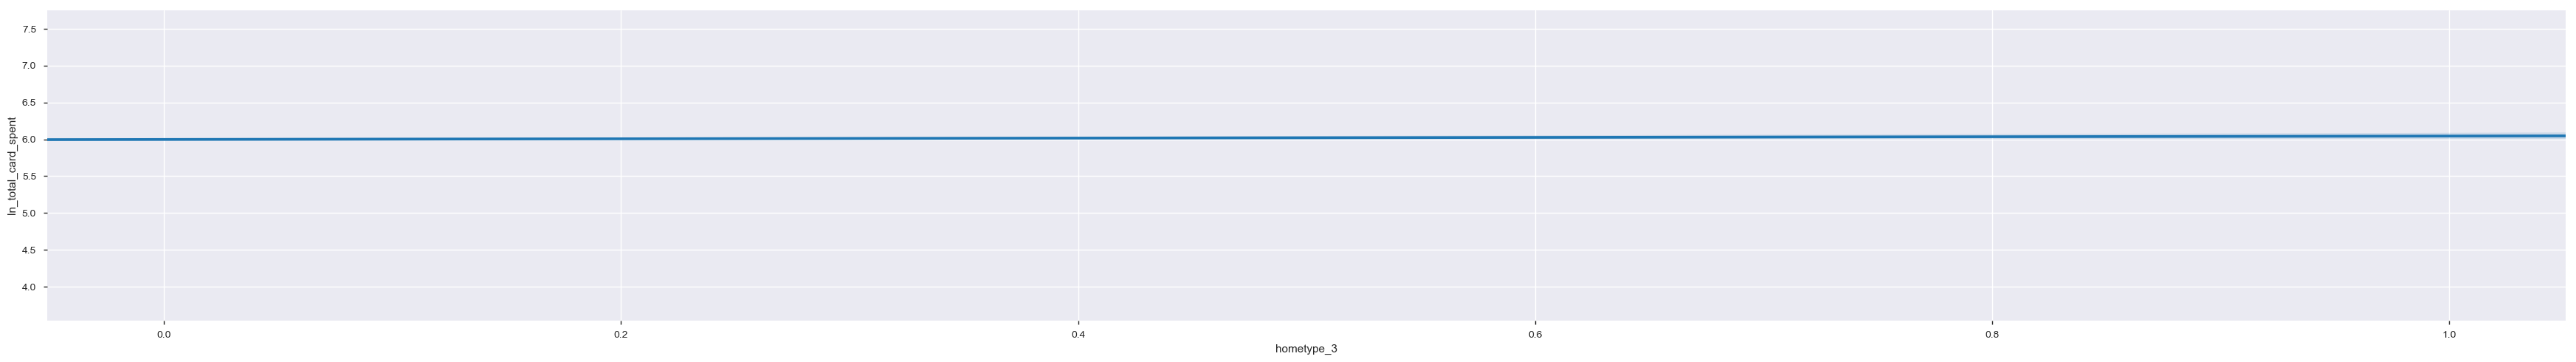

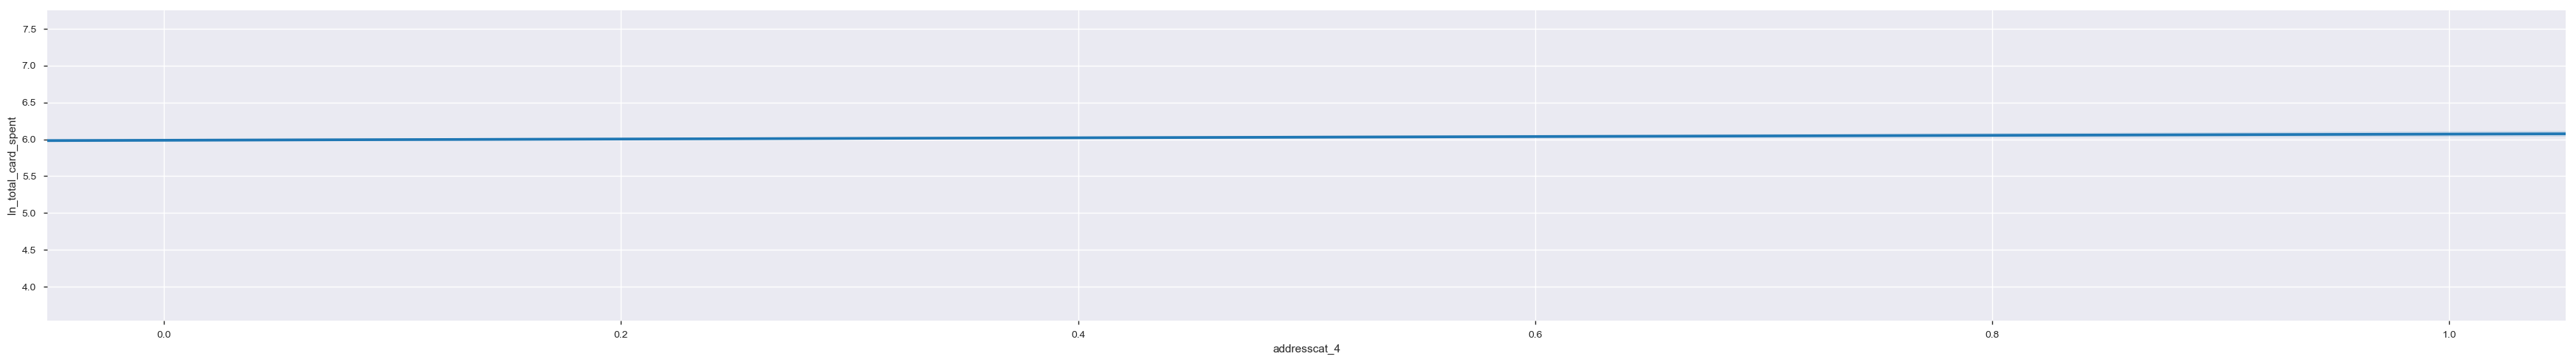

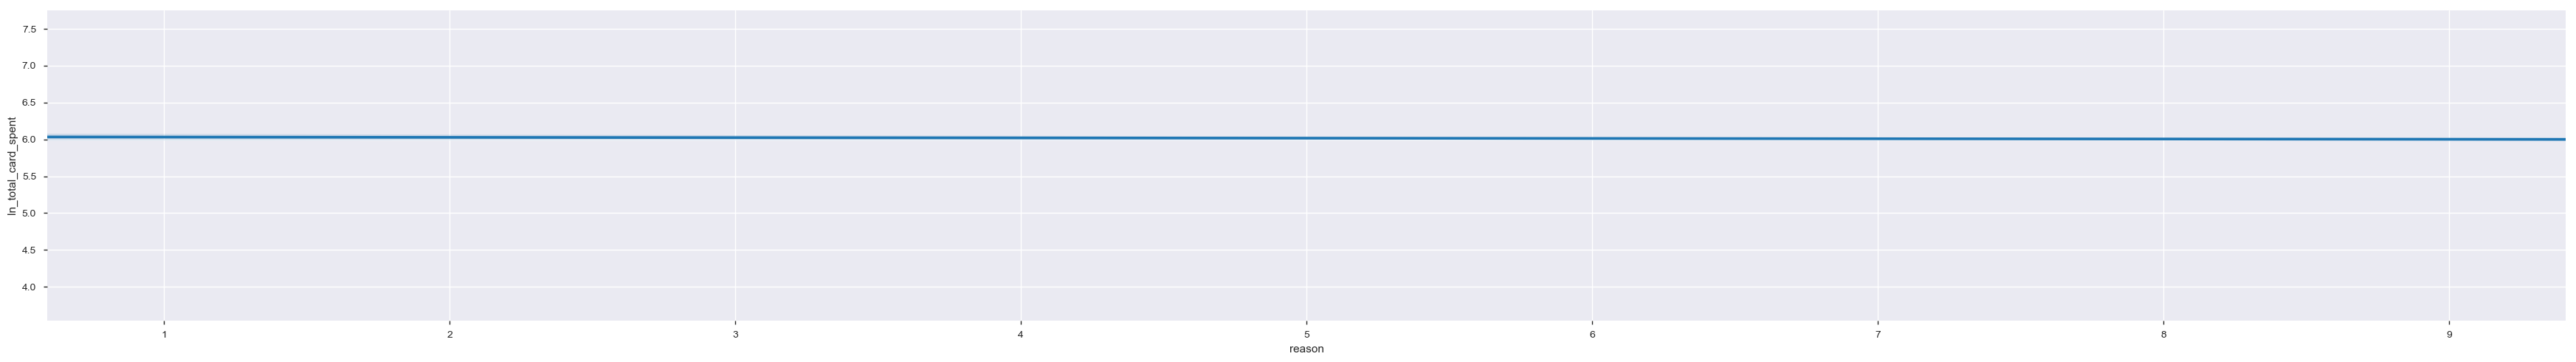

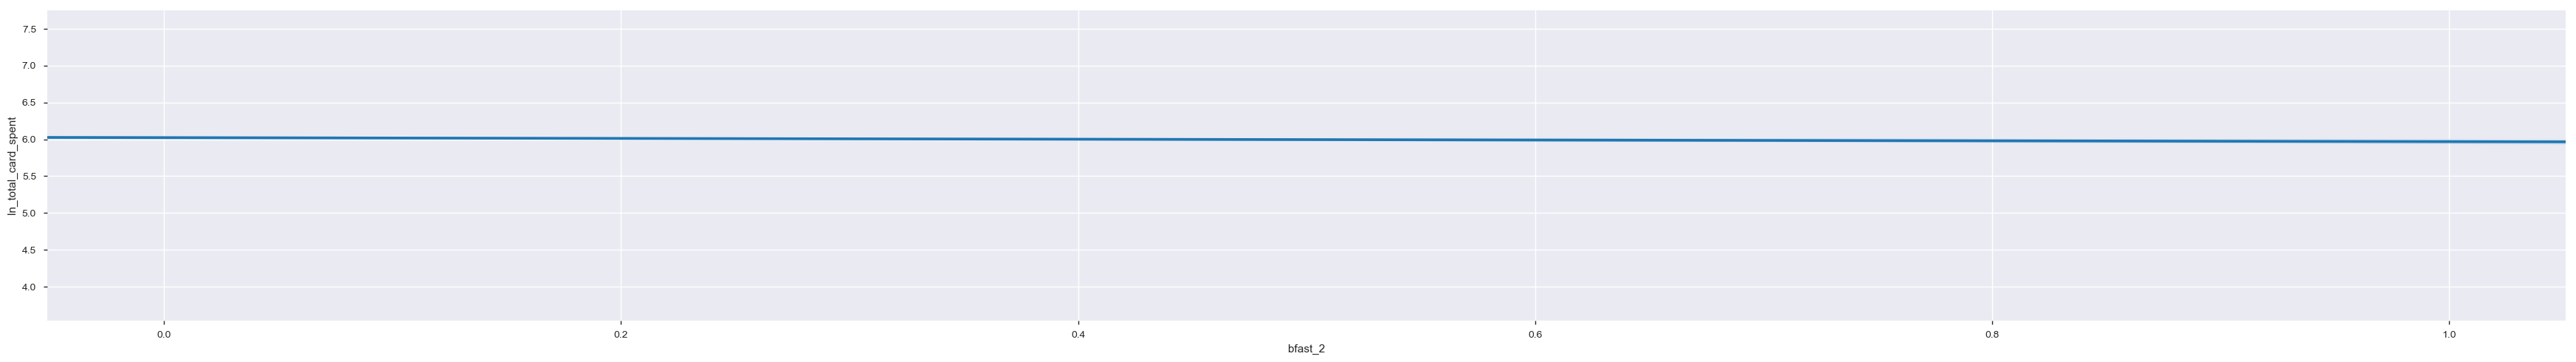

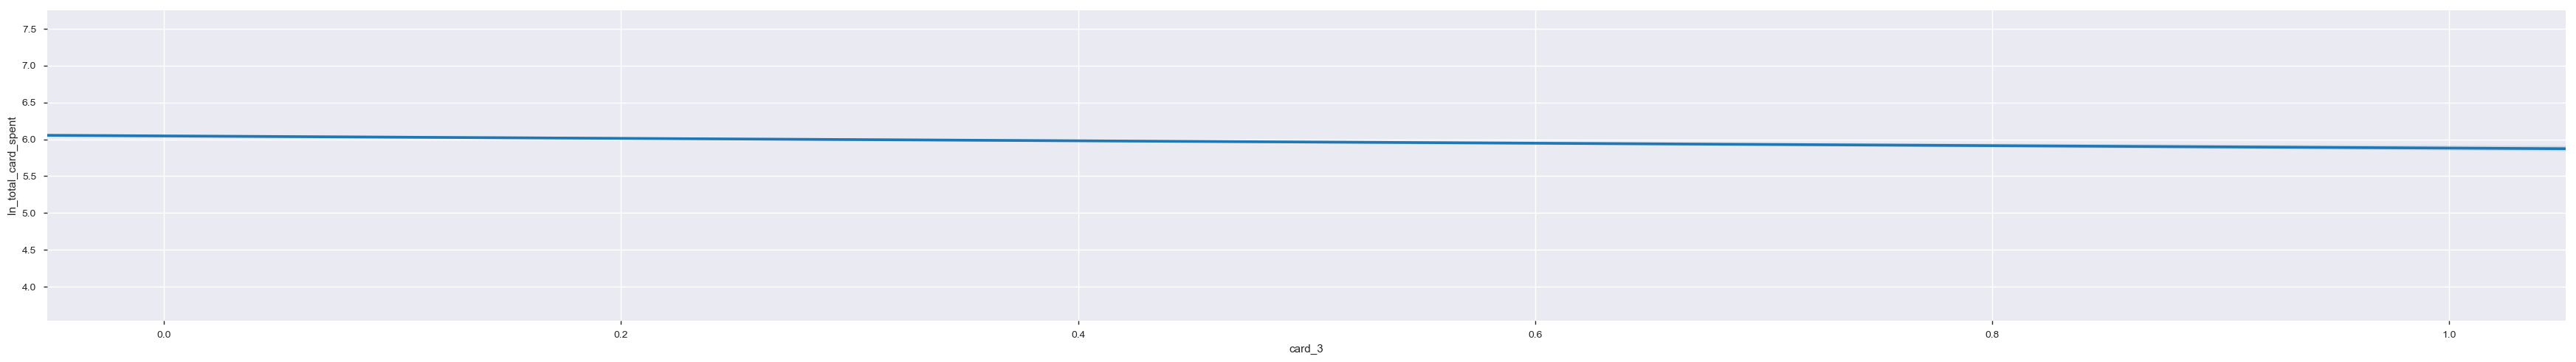

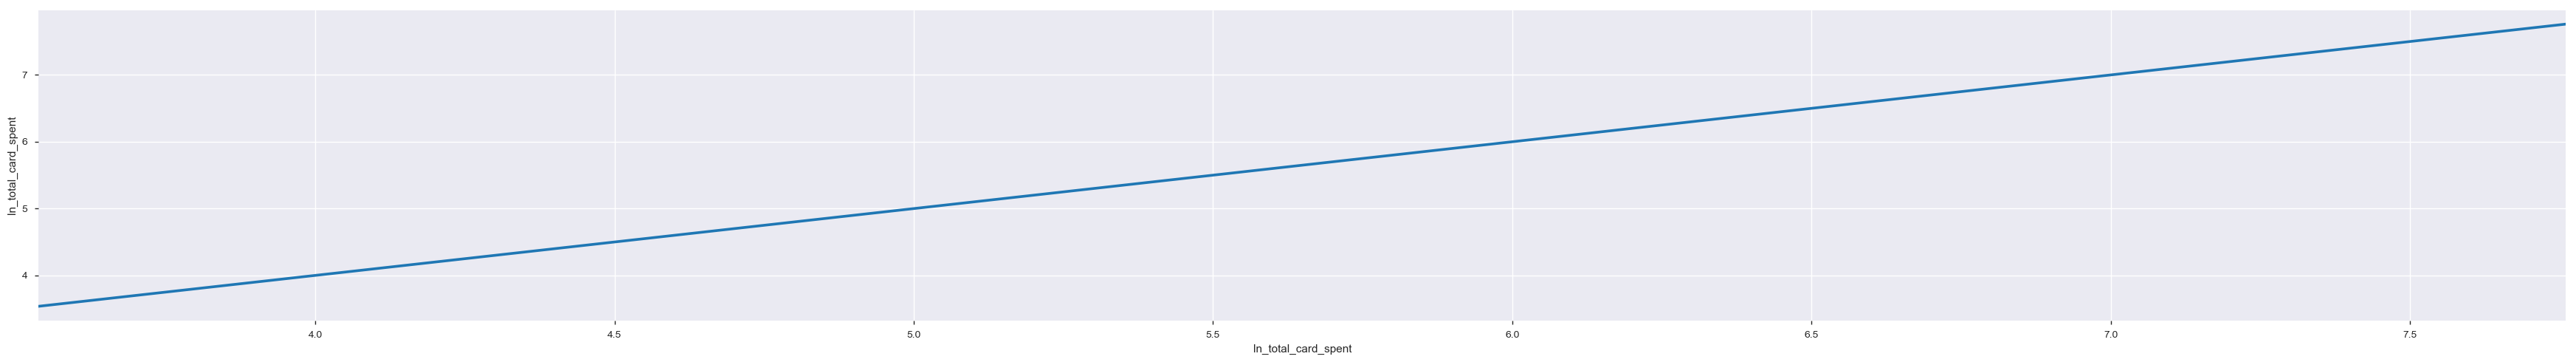

In [94]:
for i in list(credit_spend_new_1.columns):
    sns.lmplot(x=i, y = "ln_total_card_spent", data = credit_spend_new_1,aspect = 7, scatter_kws={"alpha":0})

In [95]:
#making the linear regression model using two different modules( statsmodel.formula.api & sklearn)

In [96]:
#using statsmodels.formula.api
#this understand a formula like this : y = x + x1 + x2 + x3 +...
#we dont split out the y and the x vars in the initial phase of statsmodel.formula.api module

In [97]:
#spliting data for training and testing

In [98]:
from sklearn.model_selection import train_test_split
train, test = train_test_split (credit_spend_new_1, test_size= 0.3, random_state = 23)

In [99]:
print(train.shape,test.shape)

(3500, 48) (1500, 48)


In [100]:
train.columns

Index(['income', 'card_1', 'card', 'carvalue', 'tenure', 'debtinc', 'hourstv',
       'card2', 'cardten', 'ed', 'cardmon', 'employ', 'card2_1', 'lncreddebt',
       'lnothdebt', 'tollmon', 'polview', 'equipten', 'region', 'cardbenefit',
       'reason_2', 'jobsat', 'addresscat', 'hometype', 'internet',
       'card2benefit_3', 'cardtenurecat', 'cars_1', 'card_4',
       'cardtenurecat_3', 'bfast', 'polview_3', 'jobcat_3', 'polview_4',
       'jobsat_3', 'card2benefit_2', 'hometype_2', 'jobsat_4', 'cardbenefit_3',
       'cartype_0', 'jobcat_1', 'jobcat_2', 'hometype_3', 'addresscat_4',
       'reason', 'bfast_2', 'card_3', 'ln_total_card_spent'],
      dtype='object')

In [101]:
#join all x variables with + sign 

In [102]:
all_columns_1 = "+".join(train.columns.difference( ["ln_total_card_spent"] ))
my_formula_1 = "ln_total_card_spent~" + all_columns_1

In [103]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = my_formula_1, data = train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ln_total_card_spent   R-squared:                       0.328
Model:                             OLS   Adj. R-squared:                  0.318
Method:                  Least Squares   F-statistic:                     35.77
Date:                 Mon, 17 Feb 2020   Prob (F-statistic):          7.37e-258
Time:                         16:13:28   Log-Likelihood:                -2725.4
No. Observations:                 3500   AIC:                             5547.
Df Residuals:                     3452   BIC:                             5843.
Df Model:                           47                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.8328      0.121     48.210      0.000       5.596       6.070
addresscat         -0.0057      0.011     -0.501      0.617      -0.028       0.017
addresscat_4       -0.0126      0.023     -0.552      0.581      -0.057       0.032
bfast               0.0036      0.011      0.325      0.745      -0.018       0.025
bfast_2            -0.0403      0.023     -1.775      0.076      -0.085       0.004
card                0.0286      0.016      1.826      0.068      -0.002       0.059
card2               0.0049      0.011      0.442      0.659      -0.017       0.027
card2_1             0.3892      0.034     11.504      0.000       0.323       0.456
card2benefit_2     -0.0060      0.022     -0.267      0.790      -0.050       0.038
card2benefit_3     -0.0452      0.022     -2.071      0.038      -0.088      -0.002
card_1              0.5924      0.036     16.568      0.000       0.522       0.662
card_3             -0.0219      0.026     -0.837      0.403      -0.073       0.029
card_4             -0.1614      0.035     -4.586      0.000      -0.230      -0.092
cardbenefit        -0.0020      0.008     -0.243      0.808      -0.018       0.014
cardbenefit_3      -0.0115      0.022     -0.532      0.595      -0.054       0.031
cardmon            -0.0023      0.001     -1.595      0.111      -0.005       0.001
cardten          4.216e-05   3.07e-05      1.373      0.170    -1.8e-05       0.000
cardtenurecat      -0.0039      0.014     -0.272      0.785      -0.032       0.024
cardtenurecat_3    -0.0303      0.026     -1.183      0.237      -0.081       0.020
cars_1             -0.0271      0.022     -1.243      0.214      -0.070       0.016
cartype_0          -0.0099      0.018     -0.534      0.593      -0.046       0.026
carvalue            0.0001      0.001      0.137      0.891      -0.001       0.002
debtinc            -0.0156      0.003     -5.892      0.000      -0.021      -0.010
ed                 -0.0111      0.004     -3.158      0.002      -0.018      -0.004
employ             -0.0007      0.002     -0.415      0.678      -0.004       0.003
equipten         1.026e-05   1.29e-05      0.796      0.426    -1.5e-05    3.55e-05
hometype           -0.0029      0.013     -0.214      0.830      -0.029       0.023
hometype_2         -0.0105      0.023     -0.464      0.642      -0.055       0.034
hometype_3          0.0211      0.033      0.634      0.526      -0.044       0.086
hourstv             0.0038      0.002      2.134      0.033       0.000       0.007
income              0.0027      0.000      6.091      0.000       0.002       0.004
internet            0.0149      0.008      1.927      0.054      -0.000       0.030
jobcat_1            0.0514      0.027      1.894      0.058      -0.002       0.105
jobcat_2            0.0175      0.030      0.592

In [104]:
from sklearn import metrics
pred_y = lm1.predict(test)
rmse = np.sqrt( metrics.mean_squared_error( test["ln_total_card_spent"], pred_y ) )
print (rmse)
print (metrics.r2_score( test["ln_total_card_spent"], pred_y ))

0.5244405826423659
0.3315103505502598


In [105]:
#selecting columns with p_val > 5 

In [106]:
# dropping variable with max p_value

In [107]:
drop_var_pval = [1,2]
while len(drop_var_pval) > 1:
    all_columns = "+".join(train.columns.difference( ["ln_total_card_spent"] ))
    my_formula = "ln_total_card_spent~" + all_columns
    lm1 = smf.ols(formula = my_formula, data = train).fit()
    p_values = pd.DataFrame(lm1.pvalues)
    p_values.reset_index(inplace = True)
    p_values.rename(columns= {"index":"var"}, inplace = True)
    p_values.rename(columns= {0:"p_val"}, inplace = True)
    drop_var_pval = []
    for i in p_values.p_val:
        if i > 0.05:
            drop_var_pval.append(i)
    for i in p_values.index:
        if list(p_values.loc[i,["p_val"]])[0] == max(drop_var_pval):
            train.drop(list(p_values.loc[i,["var"]])[0], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [108]:
drop_var_pval

[0.05109196697298151]

In [109]:
train.shape

(3500, 18)

In [110]:
#again making the model with dropped variables (pval>5%) 

In [111]:
all_columns_2 = "+".join(train.columns.difference( ["ln_total_card_spent"] ))
my_formula_2 = "ln_total_card_spent~" + all_columns_2
lm2 = smf.ols(formula = my_formula_2, data = train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ln_total_card_spent   R-squared:                       0.322
Model:                             OLS   Adj. R-squared:                  0.318
Method:                  Least Squares   F-statistic:                     97.19
Date:                 Mon, 17 Feb 2020   Prob (F-statistic):          7.44e-278
Time:                         16:13:33   Log-Likelihood:                -2740.2
No. Observations:                 3500   AIC:                             5516.
Df Residuals:                     3482   BIC:                             5627.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7978      0.080     72.308      0.000       5.641       5.955
bfast_2           -0.0589      0.020     -2.945      0.003      -0.098      -0.020
card2_1            0.3791      0.026     14.742      0.000       0.329       0.429
card2benefit_3    -0.0447      0.021     -2.178      0.029      -0.085      -0.004
card_1             0.5539      0.025     22.232      0.000       0.505       0.603
card_4            -0.1178      0.023     -5.224      0.000      -0.162      -0.074
debtinc           -0.0159      0.003     -6.129      0.000      -0.021      -0.011
ed                -0.0102      0.003     -3.066      0.002      -0.017      -0.004
hourstv            0.0038      0.002      2.167      0.030       0.000       0.007
income             0.0026      0.000      7.706      0.000       0.002       0.003
internet           0.0178      0.007      2.515      0.012       0.004       0.032
jobsat            -0.0188      0.007     -2.541      0.011      -0.033      -0.004
jobsat_4           0.0571      0.024      2.362      0.018       0.010       0.104
lncreddebt         0.0614      0.011      5.515      0.000       0.040       0.083
lnothdebt          0.0899      0.016      5.491      0.000       0.058       0.122
reason             0.0127      0.004      3.421      0.001       0.005       0.020
reason_2           0.3530      0.043      8.155      0.000       0.268       0.438
region             0.0123      0.006      1.948      0.052   -8.25e-05       0.025
==============================================================================
Omnibus:                      106.374   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.729
Skew:                          -0.408   Prob(JB):                     1.65e-26
Kurtosis:                       3.384   Cond. No.                         677.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
pred_y = lm2.predict(test)
rmse = '%.3f' % np.sqrt( metrics.mean_squared_error( test["ln_total_card_spent"], pred_y ) )
rsquared = '%.3f' % metrics.r2_score( test["ln_total_card_spent"], pred_y )
MAPE= '%.3f' % np.mean(np.abs(test["ln_total_card_spent"]-pred_y)/(test["ln_total_card_spent"]))
print ("RMSE"+ " : " + rmse)
print ("rsquared"+" : "+ rsquared)
print("MAPE"+" : " + MAPE)

RMSE : 0.525
rsquared : 0.329
MAPE : 0.071


In [113]:
#finding out the beta values for each variable

In [114]:
lm2.params

Intercept         5.797771
bfast_2          -0.058883
card2_1           0.379073
card2benefit_3   -0.044661
card_1            0.553925
card_4           -0.117803
debtinc          -0.015895
ed               -0.010157
hourstv           0.003825
income            0.002615
internet          0.017820
jobsat           -0.018821
jobsat_4          0.057082
lncreddebt        0.061428
lnothdebt         0.089920
reason            0.012718
reason_2          0.353042
region            0.012337
dtype: float64

In [115]:
#using sklearn to build the model

In [116]:
train_X = train[train.columns.difference( ["ln_total_card_spent"])]
train_Y = train["ln_total_card_spent"]

In [117]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
linreg.coef_

array([-0.05888341,  0.37907264, -0.04466079,  0.55392513, -0.11780276,
       -0.01589488, -0.01015733,  0.00382524,  0.00261491,  0.01781969,
       -0.01882144,  0.05708223,  0.06142781,  0.08991976,  0.01271754,
        0.35304174,  0.01233743])

In [119]:
y_pred_train = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_Y, y_pred_train) )
print (rmse_t)
print (metrics.r2_score( train_Y, y_pred_train ))

0.5293903962884096
0.3218001526005918


In [120]:
test_X = test[train.columns.difference( ["ln_total_card_spent"])]
test_Y = test["ln_total_card_spent"]

In [121]:
y_pred_test = linreg.predict(test_X)
rmse_t = np.sqrt( metrics.mean_squared_error( test_Y, y_pred_test) )
print (rmse_t)
print (metrics.r2_score( test_Y, y_pred_test ))

0.5253423307082722
0.3292095084038822


In [122]:
#new assumption: checking heteroscadicity
residuals = train_Y - y_pred_train

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


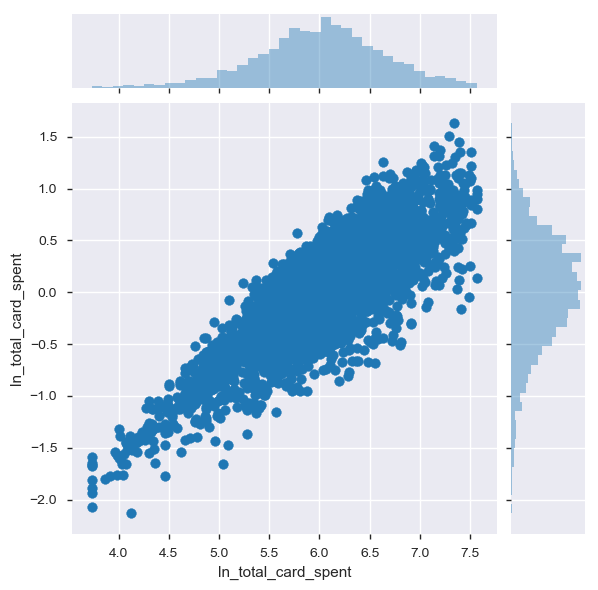

In [123]:
sns.jointplot(train_Y,residuals)

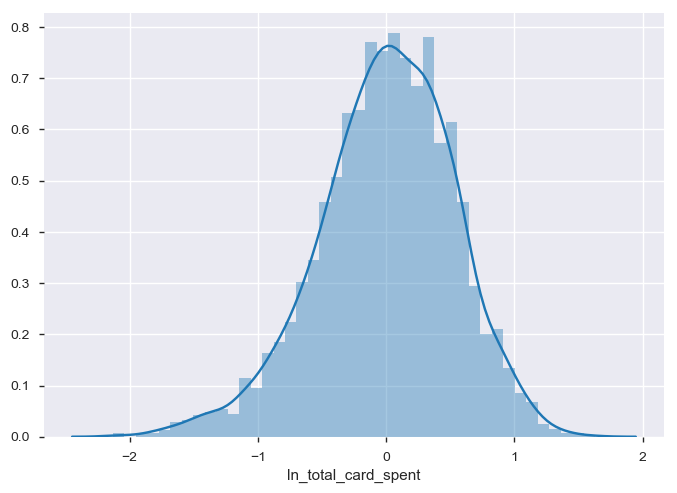

In [124]:
#last assumption: residual follows the normality
sns.distplot(residuals)

In [125]:
#using Q Q plot to check the normality of residuals

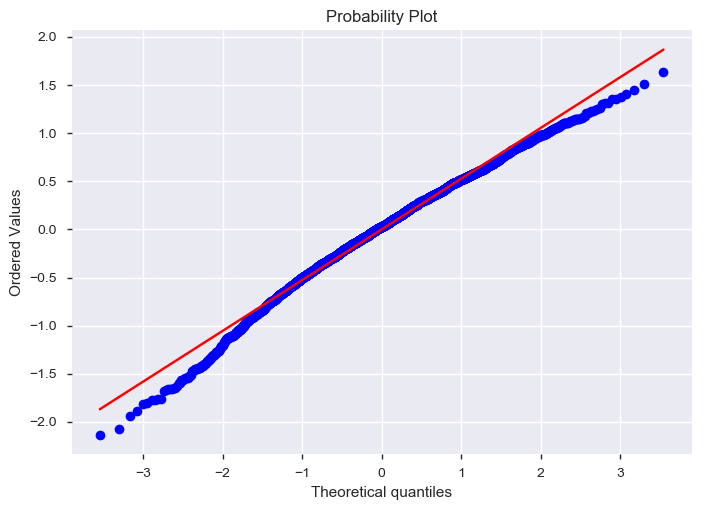

In [126]:
from scipy import stats
import pylab
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()